#### Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("data\\data.xlsx")
print("Number of instance in the dataset is :{}".format(len(df)))

Number of instance in the dataset is :9720


In [3]:
df = df[df["LMTD"] > 0]
print("Number of instance in the dataset is :{}".format(len(df)))

Number of instance in the dataset is :8480


In [4]:
# Drop the data points with non positive chilling Duty
df = df[df["LA Chilling Duty"] >= 0]
print("Number of instance in the dataset is :{}".format(len(df)))

Number of instance in the dataset is :5704


In [5]:
df["SCD (MJ/kg)"] = (0.001 * df["LA Chilling Duty"]) / df["Captured CO2 (kg/h)"]

## Exploring the data

In [6]:
df.columns

Index(['State', 'FG Massflow (kg/h)', 'Flue gas CO2 cons', 'FG Temperature',
       'Lean Amine Mass flow (kg/h)', 'Lean Amine Temperature',
       'WWT Flow rate', 'WWB Flow rate', 'RA2Reg-Temperature',
       'Reboiler Duty (kJ/h)', 'LA Chilling Duty', 'WWT Cooling Duty',
       'WWT Cooling Duty2', 'MEA Emission PPM', 'CO2 Mass Flow @ Off Gas',
       'MEA Emission', 'FG Flue Rate (Sm3/h)', 'L/G (kg/kg)', 'L/G (kg/Sm3)',
       'Lean Loading', 'Captured CO2 (kg/h)', 'CO2 Capture Efficiency',
       'Rich Loading', 'RA Flow Rate', 'RA Temp after Abs', 'Reboiler Duty',
       'Condensor Duty (kJ/h)', 'SRD (MJ/kg CO2)', 'Condensor Specific Duty',
       'CO2 Product purity', 'CO2 Production Mass Flow', 'Reg Bttm Temp',
       'Reg Bttm Flow Rate', 'LA after HE', 'Left Min Apprch',
       'Right Min Appr', 'LMTD', 'MEA Makeup', 'Abs Height', 'SCD (MJ/kg)'],
      dtype='object')

In [7]:
df.describe().transpose()

count          mean           std           min  \
FG Massflow (kg/h)           5704.0  7.207411e+04  1.031939e+01  7.207000e+04   
Flue gas CO2 cons            5704.0  8.359599e-02  3.298276e-02  3.600000e-02   
FG Temperature               5704.0  3.695126e+01  1.178362e+01  2.000000e+01   
Lean Amine Mass flow (kg/h)  5704.0  1.351625e+05  8.233373e+04  4.160000e+04   
Lean Amine Temperature       5704.0  3.728787e+01  7.417124e+00  3.000000e+01   
WWT Flow rate                5704.0  5.500000e+04  0.000000e+00  5.500000e+04   
WWB Flow rate                5704.0  5.500863e+04  3.439796e+00  5.500000e+04   
RA2Reg-Temperature           5704.0  1.043051e+02  1.206691e+00  1.030000e+02   
Reboiler Duty (kJ/h)         5704.0  3.078945e+07  1.236984e+07  1.000000e+07   
LA Chilling Duty             5704.0  6.601097e+06  6.968066e+06  1.936000e+03   
WWT Cooling Duty             5704.0  3.128264e+06  1.346168e+06  3.070000e+05   
WWT Cooling Duty2            5704.0  4.359905e+06  1.451078e+06  6.506000e+05   
MEA Emission PPM             5704.0  1.613702e-01  3.216315e-01  1.726000e-04   
CO2 Mass Flow @ Off Gas      5704.0  2.207056e+03  1.994389e+03  1.221000e+01   
MEA Emission                 5704.0  1.613925e-07  3.217061e-07  1.726000e-10   
FG Flue Rate (Sm3/h)         5704.0  5.789569e+04  1.036741e+03  5.638000e+04   
L/G (kg/kg)                  5704.0  1.875638e+00  1.142761e+00  5.772000e-01   
L/G (kg/Sm3)                 5704.0  2.352114e+00  1.458413e+00  7.002000e-01   
Lean Loading                 5704.0  2.049223e-01  7.820774e-02  7.095000e-02   
Captured CO2 (kg/h)          5704.0  6.737296e+03  2.938513e+03  2.502000e+03   
CO2 Capture Efficiency       5704.0  7.700561e+01  1.879548e+01  2.872000e+01   
Rich Loading                 5704.0  4.699677e-01  3.968865e-02  3.232000e-01   
RA Flow Rate                 5704.0  1.404476e+05  8.445365e+04  4.316000e+04   
RA Temp after Abs            5704.0  3.836125e+01  7.370878e+00  2.088000e+01   
Reboiler Duty                5704.0  3.078945e+07  1.236984e+07  1.000000e+07   
Condensor Duty (kJ/h)        5704.0  1.284328e+07  6.109412e+06  2.917000e+06   
SRD (MJ/kg CO2)              5704.0  4.765017e+00  1.247572e+00  2.941000e+00   
Condensor Specific Duty      5704.0  2.081913e+00  1.090142e+00  1.120000e+00   
CO2 Product purity           5704.0  9.856748e-01  5.815067e-04  9.828000e-01   
CO2 Production Mass Flow     5704.0  6.781539e+03  2.959779e+03  2.515000e+03   
Reg Bttm Temp                5704.0  1.205428e+02  2.568666e+00  1.108000e+02   
Reg Bttm Flow Rate           5704.0  1.336667e+05  8.205559e+04  4.020000e+04   
LA after HE                  5704.0  5.040206e+01  9.103813e+00  2.997000e+01   
Left Min Apprch              5704.0  1.204087e+01  5.714874e+00  4.490000e-02   
Right Min Appr               5704.0  1.623721e+01  2.661992e+00  7.289000e+00   
LMTD                         5704.0  1.382633e+01  4.264904e+00  1.663000e+00   
MEA Makeup                   5704.0  1.354874e+00  3.618611e+00  0.000000e+00   
Abs Height                   5704.0  1.749404e+01  4.864350e+00  1.200000e+01   
SCD (MJ/kg)                  5704.0  8.970348e-01  7.206116e-01  2.281942e-04   

                                      25%           50%           75%  \
FG Massflow (kg/h)           7.207000e+04  7.207000e+04  7.207000e+04   
Flue gas CO2 cons            5.950000e-02  9.050000e-02  1.088000e-01   
FG Temperature               2.000000e+01  3.500000e+01  5.000000e+01   
Lean Amine Mass flow (kg/h)  8.120000e+04  1.010000e+05  1.670000e+05   
Lean Amine Temperature       3.000000e+01  4.000000e+01  4.000000e+01   
WWT Flow rate                5.500000e+04  5.500000e+04  5.500000e+04   
WWB Flow rate                5.501000e+04  5.501000e+04  5.501000e+04   
RA2Reg-Temperature           1.030000e+02  1.045000e+02  1.060000e+02   
Reboiler Duty (kJ/h)         2.000000e+07  3.000000e+07  4.400000e+07   
LA Chilling Duty             1.786000e+06  3.944500e+06  8.

In [8]:
df.groupby(["Flue gas CO2 cons"]).mean()["SRD (MJ/kg CO2)"]

Flue gas CO2 cons
0.0360    5.918239
0.0595    4.781794
0.0838    4.705801
0.0905    4.611641
0.1088    4.251134
0.1324    4.023896
Name: SRD (MJ/kg CO2), dtype: float64

In [9]:
df.groupby(["Flue gas CO2 cons", "Abs Height"]).std()["SRD (MJ/kg CO2)"]

Flue gas CO2 cons  Abs Height
0.0360             12            1.489780
                   18            1.405795
                   24            1.392912
0.0595             12            1.141965
                   18            1.198181
                   24            1.203629
0.0838             12            1.220313
                   18            1.225402
                   24            1.252473
0.0905             12            0.846821
                   18            0.793717
                   24            0.803286
0.1088             12            0.740948
                   18            0.698323
                   24            0.721084
0.1324             12            0.721200
                   18            0.697385
                   24            0.704601
Name: SRD (MJ/kg CO2), dtype: float64

In [10]:
df.groupby(["Flue gas CO2 cons"]).describe()[["CO2 Capture Efficiency","SRD (MJ/kg CO2)"]]

CO2 Capture Efficiency                               \
                                   count       mean        std    min   
Flue gas CO2 cons                                                       
0.0360                            1209.0  91.599926   9.425238  62.86   
0.0595                             867.0  71.267578  18.092525  39.40   
0.0838                             755.0  51.638927  14.298897  28.72   
0.0905                             916.0  85.807533  11.907557  53.81   
0.1088                             998.0  80.107766  14.740328  45.65   
0.1324                             959.0  72.129353  16.093976  38.30   

                                                   SRD (MJ/kg CO2)            \
                       25%     50%      75%    max           count      mean   
Flue gas CO2 cons                                                              
0.0360             88.6800  94.410  98.6500  99.69          1209.0  5.918239   
0.0595             56.1950  74.190  89.1450  99.40           867.0  4.781794   
0.0838             40.7100  50.450  62.5050  81.08           755.0  4.705801   
0.0905             79.0200  88.470  95.1900  99.47           916.0  4.611641   
0.1088             68.7825  83.555  93.1225  99.20           998.0  4.251134   
0.1324             59.2500  74.370  86.6600  97.79           959.0  4.023896   

                                                                     
                        std    min      25%     50%      75%    max  
Flue gas CO2 cons                                                    
0.0360             1.433304  3.262  4.77500  5.9180  7.13400  8.376  
0.0595             1.178407  3.135  3.86650  4.4600  5.14250  8.017  
0.0838             1.230397  3.124  3.79700  4.2760  5.10900  7.942  
0.0905             0.820614  3.088  3.90700  4.6205  5.41225  6.443  
0.1088             0.726061  2.946  3.69025  4.0680  4.63475  6.361  
0.1324             0.712473  2.941  3.56400  3.8750  4.22550  6.312

### Visualization

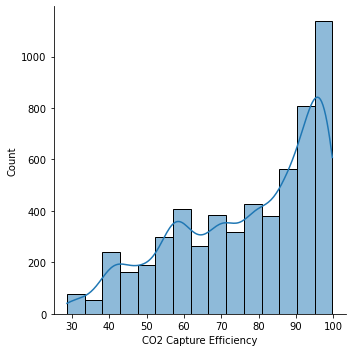

In [11]:
sns.displot(df["CO2 Capture Efficiency"], bins=15, kde=True)

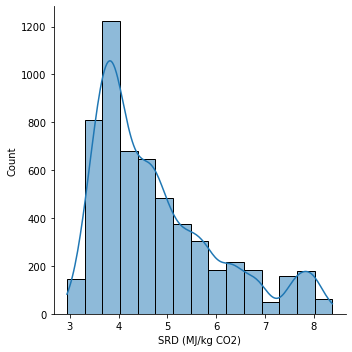

In [12]:
sns.displot(df["SRD (MJ/kg CO2)"], bins=15, kde=True)

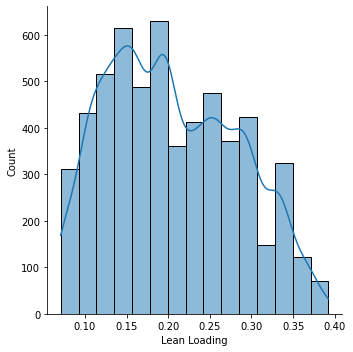

In [13]:
sns.displot(df["Lean Loading"], bins=15, kde=True)

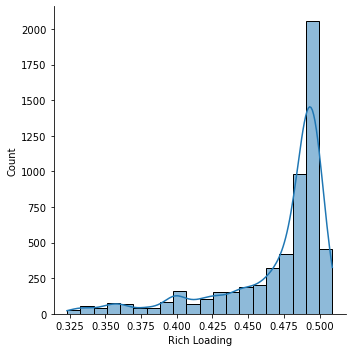

In [14]:
sns.displot(df["Rich Loading"], bins=20, kde=True)

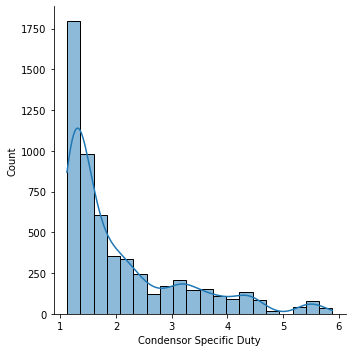

In [15]:
sns.displot(df["Condensor Specific Duty"], bins=20, kde=True)

In [16]:
sns.displot(df["CO2 Product purity"], bins=20, kde=True)

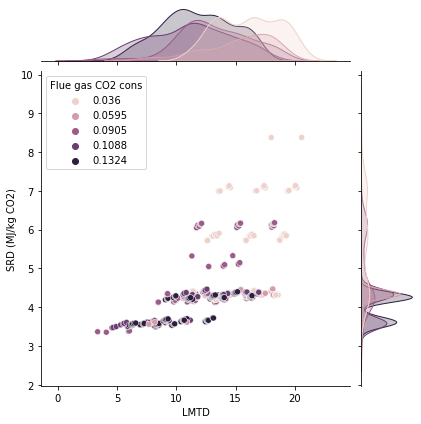

In [17]:
sns.jointplot(data= df[ (df["CO2 Capture Efficiency"] >= 85) & (df["CO2 Capture Efficiency"] <= 90)] , 
              x= "LMTD", 
              y="SRD (MJ/kg CO2)",
              hue="Flue gas CO2 cons",
              cmap="Blues"
             )

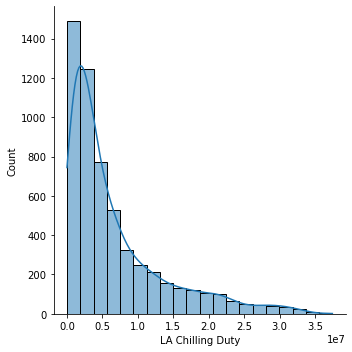

In [18]:
sns.displot(df["LA Chilling Duty"], bins=20, kde=True)

In [19]:
sns.displot(df["SCD (MJ/kg)"], bins=15, kde=True)

# Machine Learning

#### Import common Machine Learning Packages

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from joblib import dump, load

#### Define the inputs & outputs 

In [21]:
# XA Represents the data for Advanced Design
XA = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency','LMTD','Abs Height']]

In [22]:
# X2 Represents the data for Naive Design
XN = df[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency']]

In [23]:
y = df[["SRD (MJ/kg CO2)", "Condensor Specific Duty", "SCD (MJ/kg)"]]

In [24]:
XA_train, XA_test, y_train, y_test = train_test_split(XA, y, test_size=0.30, random_state=211)
XN_train, XN_test, y_train, y_test = train_test_split(XN, y, test_size=0.30, random_state=211)

#### Define the dataframe function for performance evaluation

In [25]:
performance_SRD = pd.DataFrame(columns=["name","R^2_A", "MAE_A", "MAPE_A", "RMSE_A", "R^2_N", "MAE_N", "MAPE_N", "RMSE_N"])
performance_ConSD = pd.DataFrame(columns=["name","R^2_A", "MAE_A", "MAPE_A", "RMSE_A", "R^2_N", "MAE_N", "MAPE_N", "RMSE_N"])
performance_SCD = pd.DataFrame(columns=["name","R^2_A", "MAE_A", "MAPE_A", "RMSE_A", "R^2_N", "MAE_N", "MAPE_N", "RMSE_N"])

In [26]:
def evaldf_SRD(A_pred, N_pred, model_name):
    
    row = pd.DataFrame(
                        {
                         "name": str(str(model_name) + '_SRD'),
                         "R^2_A": r2_score(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0]),
                         "MAE_A": mean_absolute_error(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0]),
                         "MAPE_A": mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0]),
                         "RMSE_A": np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0])),
                         "R^2_N": r2_score(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0]),
                         "MAE_N": mean_absolute_error(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0]),
                         "MAPE_N": mean_absolute_percentage_error(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0]),
                         "RMSE_N": np.sqrt(mean_squared_error(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0]))
                        }
            , index=[0])
    
    global performance_SRD
    
    performance_SRD = pd.concat([performance_SRD, row], ignore_index=True)    

In [27]:
def evaldf_ConSD(A_pred, N_pred, model_name):
    
    row = pd.DataFrame(
                        {
                         "name": str(str(model_name) + '_ConsSD'),
                         "R^2_A": r2_score(y_test["Condensor Specific Duty"], A_pred[: , 1]),
                         "MAE_A": mean_absolute_error(y_test["Condensor Specific Duty"], A_pred[: , 1]),
                         "MAPE_A": mean_absolute_percentage_error(y_test["Condensor Specific Duty"], A_pred[: , 1]),
                         "RMSE_A": np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], A_pred[: , 1])),
                         "R^2_N": r2_score(y_test["Condensor Specific Duty"], N_pred[: , 1]),
                         "MAE_N": mean_absolute_error(y_test["Condensor Specific Duty"], N_pred[: , 1]),
                         "MAPE_N": mean_absolute_percentage_error(y_test["Condensor Specific Duty"], N_pred[: , 1]),
                         "RMSE_N": np.sqrt(mean_squared_error(y_test["Condensor Specific Duty"], N_pred[: , 1]))
                        }
            , index=[0])
        
    global performance_ConSD
    
    performance_ConSD = pd.concat([performance_ConSD, row], ignore_index=True)    

In [28]:
def evaldf_SCD(A_pred, N_pred, model_name):
    
    row = pd.DataFrame(
                        {
                         "name": str(str(model_name) + '_SCD'),
                         "R^2_A": r2_score(y_test["SCD (MJ/kg)"], A_pred[: , 2]),
                         "MAE_A": mean_absolute_error(y_test["SCD (MJ/kg)"], A_pred[: , 2]),
                         "MAPE_A": mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], A_pred[: , 2]),
                         "RMSE_A": np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], A_pred[: , 2])),
                         "R^2_N": r2_score(y_test["SCD (MJ/kg)"], N_pred[: , 2]),
                         "MAE_N": mean_absolute_error(y_test["SCD (MJ/kg)"], N_pred[: , 2]),
                         "MAPE_N": mean_absolute_percentage_error(y_test["SCD (MJ/kg)"], N_pred[: , 2]),
                         "RMSE_N": np.sqrt(mean_squared_error(y_test["SCD (MJ/kg)"], N_pred[: , 2]))
                        }
            , index=[0])
    
    global performance_SCD
     
    performance_SCD = pd.concat([performance_SCD, row], ignore_index=True)    

#### Define the ploting function

In [29]:
def plot_result(A_pred, N_pred):
    fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15,15), dpi=300)
    fig = plt.figure()

    axes[0,0].plot(np.arange(2,10), np.arange(2,10), color = "red")
    axes[0,0].scatter(y_test["SRD (MJ/kg CO2)"], A_pred[: , 0])
    axes[0,1].plot(np.arange(2,10), np.arange(2,10), color = "red")
    axes[0,1].scatter(y_test["SRD (MJ/kg CO2)"], N_pred[: , 0])

    axes[1,0].plot(np.arange(0,7), np.arange(0,7), color = "red")
    axes[1,0].scatter(y_test['Condensor Specific Duty'], A_pred[: , 1])
    axes[1,1].plot(np.arange(0,7), np.arange(0,7), color = "red")
    axes[1,1].scatter(y_test['Condensor Specific Duty'], N_pred[: , 1])

    axes[2,0].plot(np.arange(0,5), np.arange(0,5), color = "red")
    axes[2,0].scatter(y_test['SCD (MJ/kg)'], A_pred[: , 2])
    axes[2,1].plot(np.arange(0,5), np.arange(0,5), color = "red")
    axes[2,1].scatter(y_test['SCD (MJ/kg)'], N_pred[: , 2])
    
    plt.show()

In [30]:
rs = 211

## Decision Tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

In [32]:
DTmodelA = MultiOutputRegressor(DecisionTreeRegressor(random_state=rs)).fit(XA_train, y_train)
DTmodelN = MultiOutputRegressor(DecisionTreeRegressor(random_state=rs)).fit(XN_train, y_train)

In [33]:
DTmodelA_pred = DTmodelA.predict(XA_test)
DTmodelN_pred = DTmodelN.predict(XN_test)

In [34]:
evaldf_SRD(DTmodelA_pred, DTmodelN_pred, 'DT')
evaldf_ConSD(DTmodelA_pred, DTmodelN_pred, 'DT')
evaldf_SCD(DTmodelA_pred, DTmodelN_pred, 'DT')

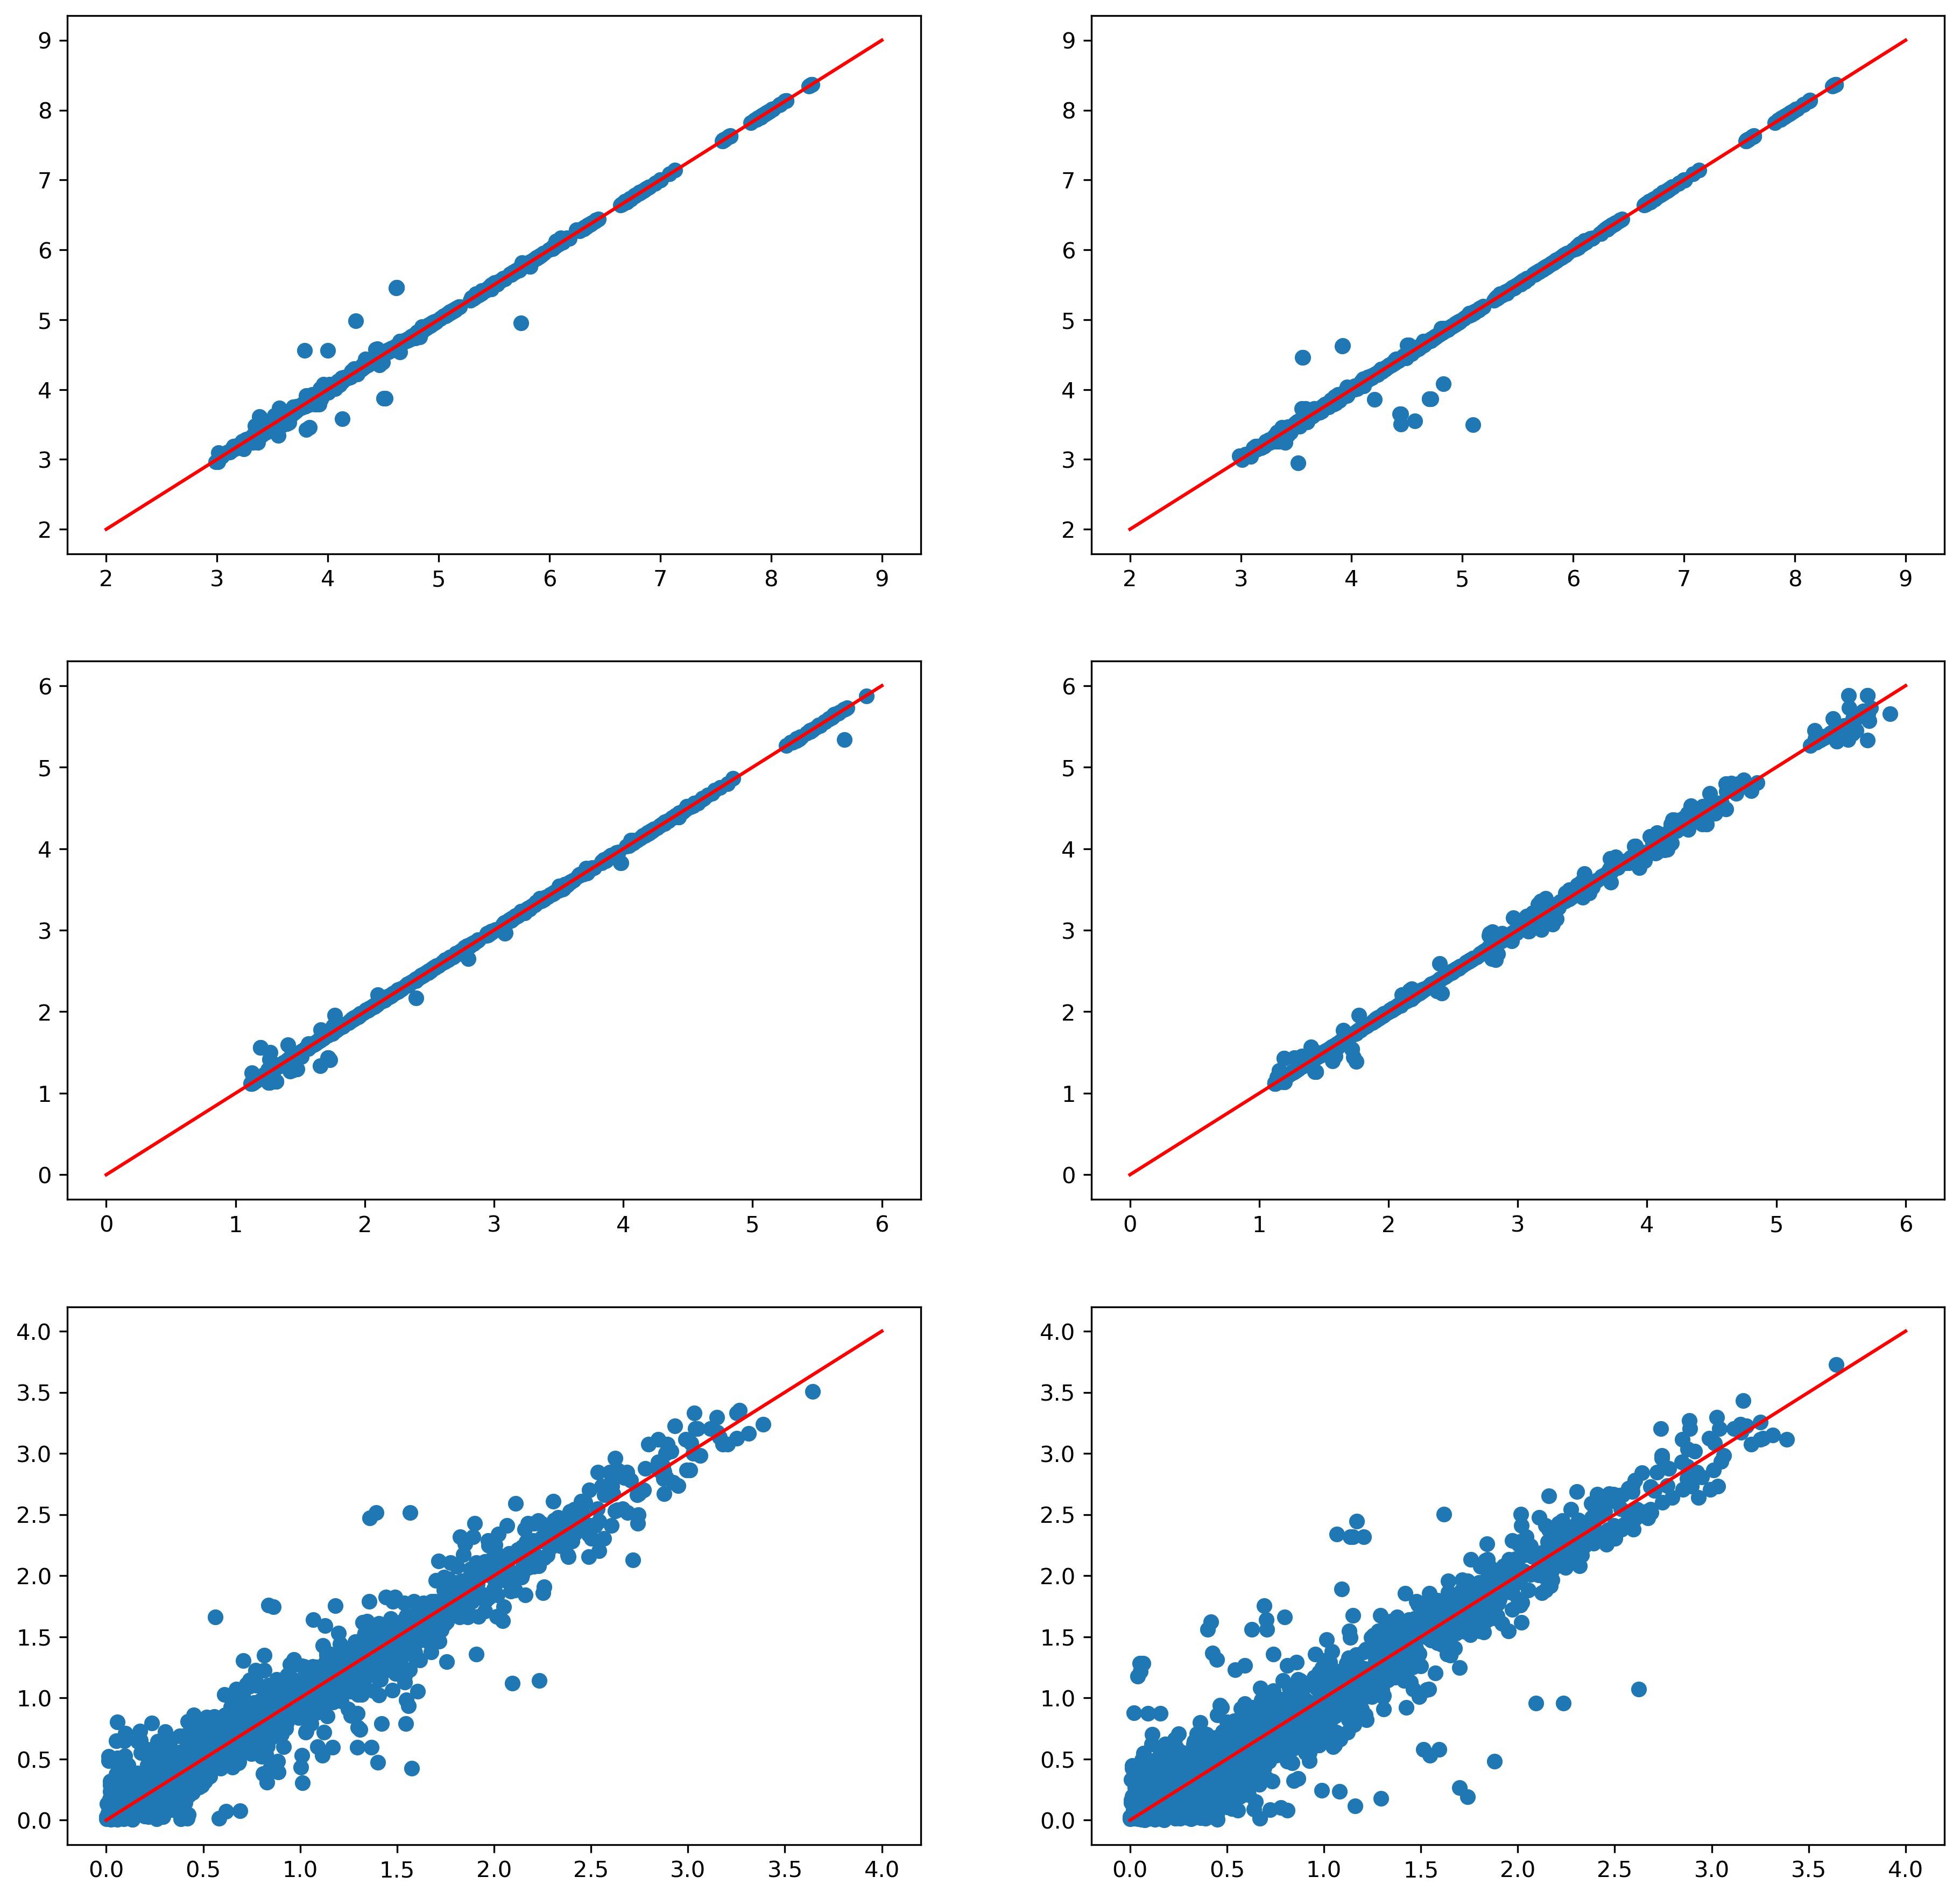

<Figure size 432x288 with 0 Axes>

In [35]:
plot_result(DTmodelA_pred, DTmodelN_pred)

## Random Forest

In [36]:
from sklearn.ensemble import RandomForestRegressor

In [37]:
RFmodelA = MultiOutputRegressor(RandomForestRegressor(max_depth=20,
                                                      max_features=6,
                                                      n_estimators=180,
                                                      n_jobs=-1,
                                                      random_state=rs)
                                ).fit(XA_train, y_train)

RFmodelN = MultiOutputRegressor(RandomForestRegressor(max_depth=20,
                                                      max_features=6,
                                                      n_estimators=180,
                                                      n_jobs=-1,
                                                      random_state=rs)
                               ).fit(XN_train, y_train)

In [38]:
RFmodelA_pred = RFmodelA.predict(XA_test)
RFmodelN_pred = RFmodelN.predict(XN_test)

In [39]:
evaldf_SRD(RFmodelA_pred, RFmodelN_pred, 'RF')
evaldf_ConSD(RFmodelA_pred, RFmodelN_pred, 'RF')
evaldf_SCD(RFmodelA_pred, RFmodelN_pred, 'RF')

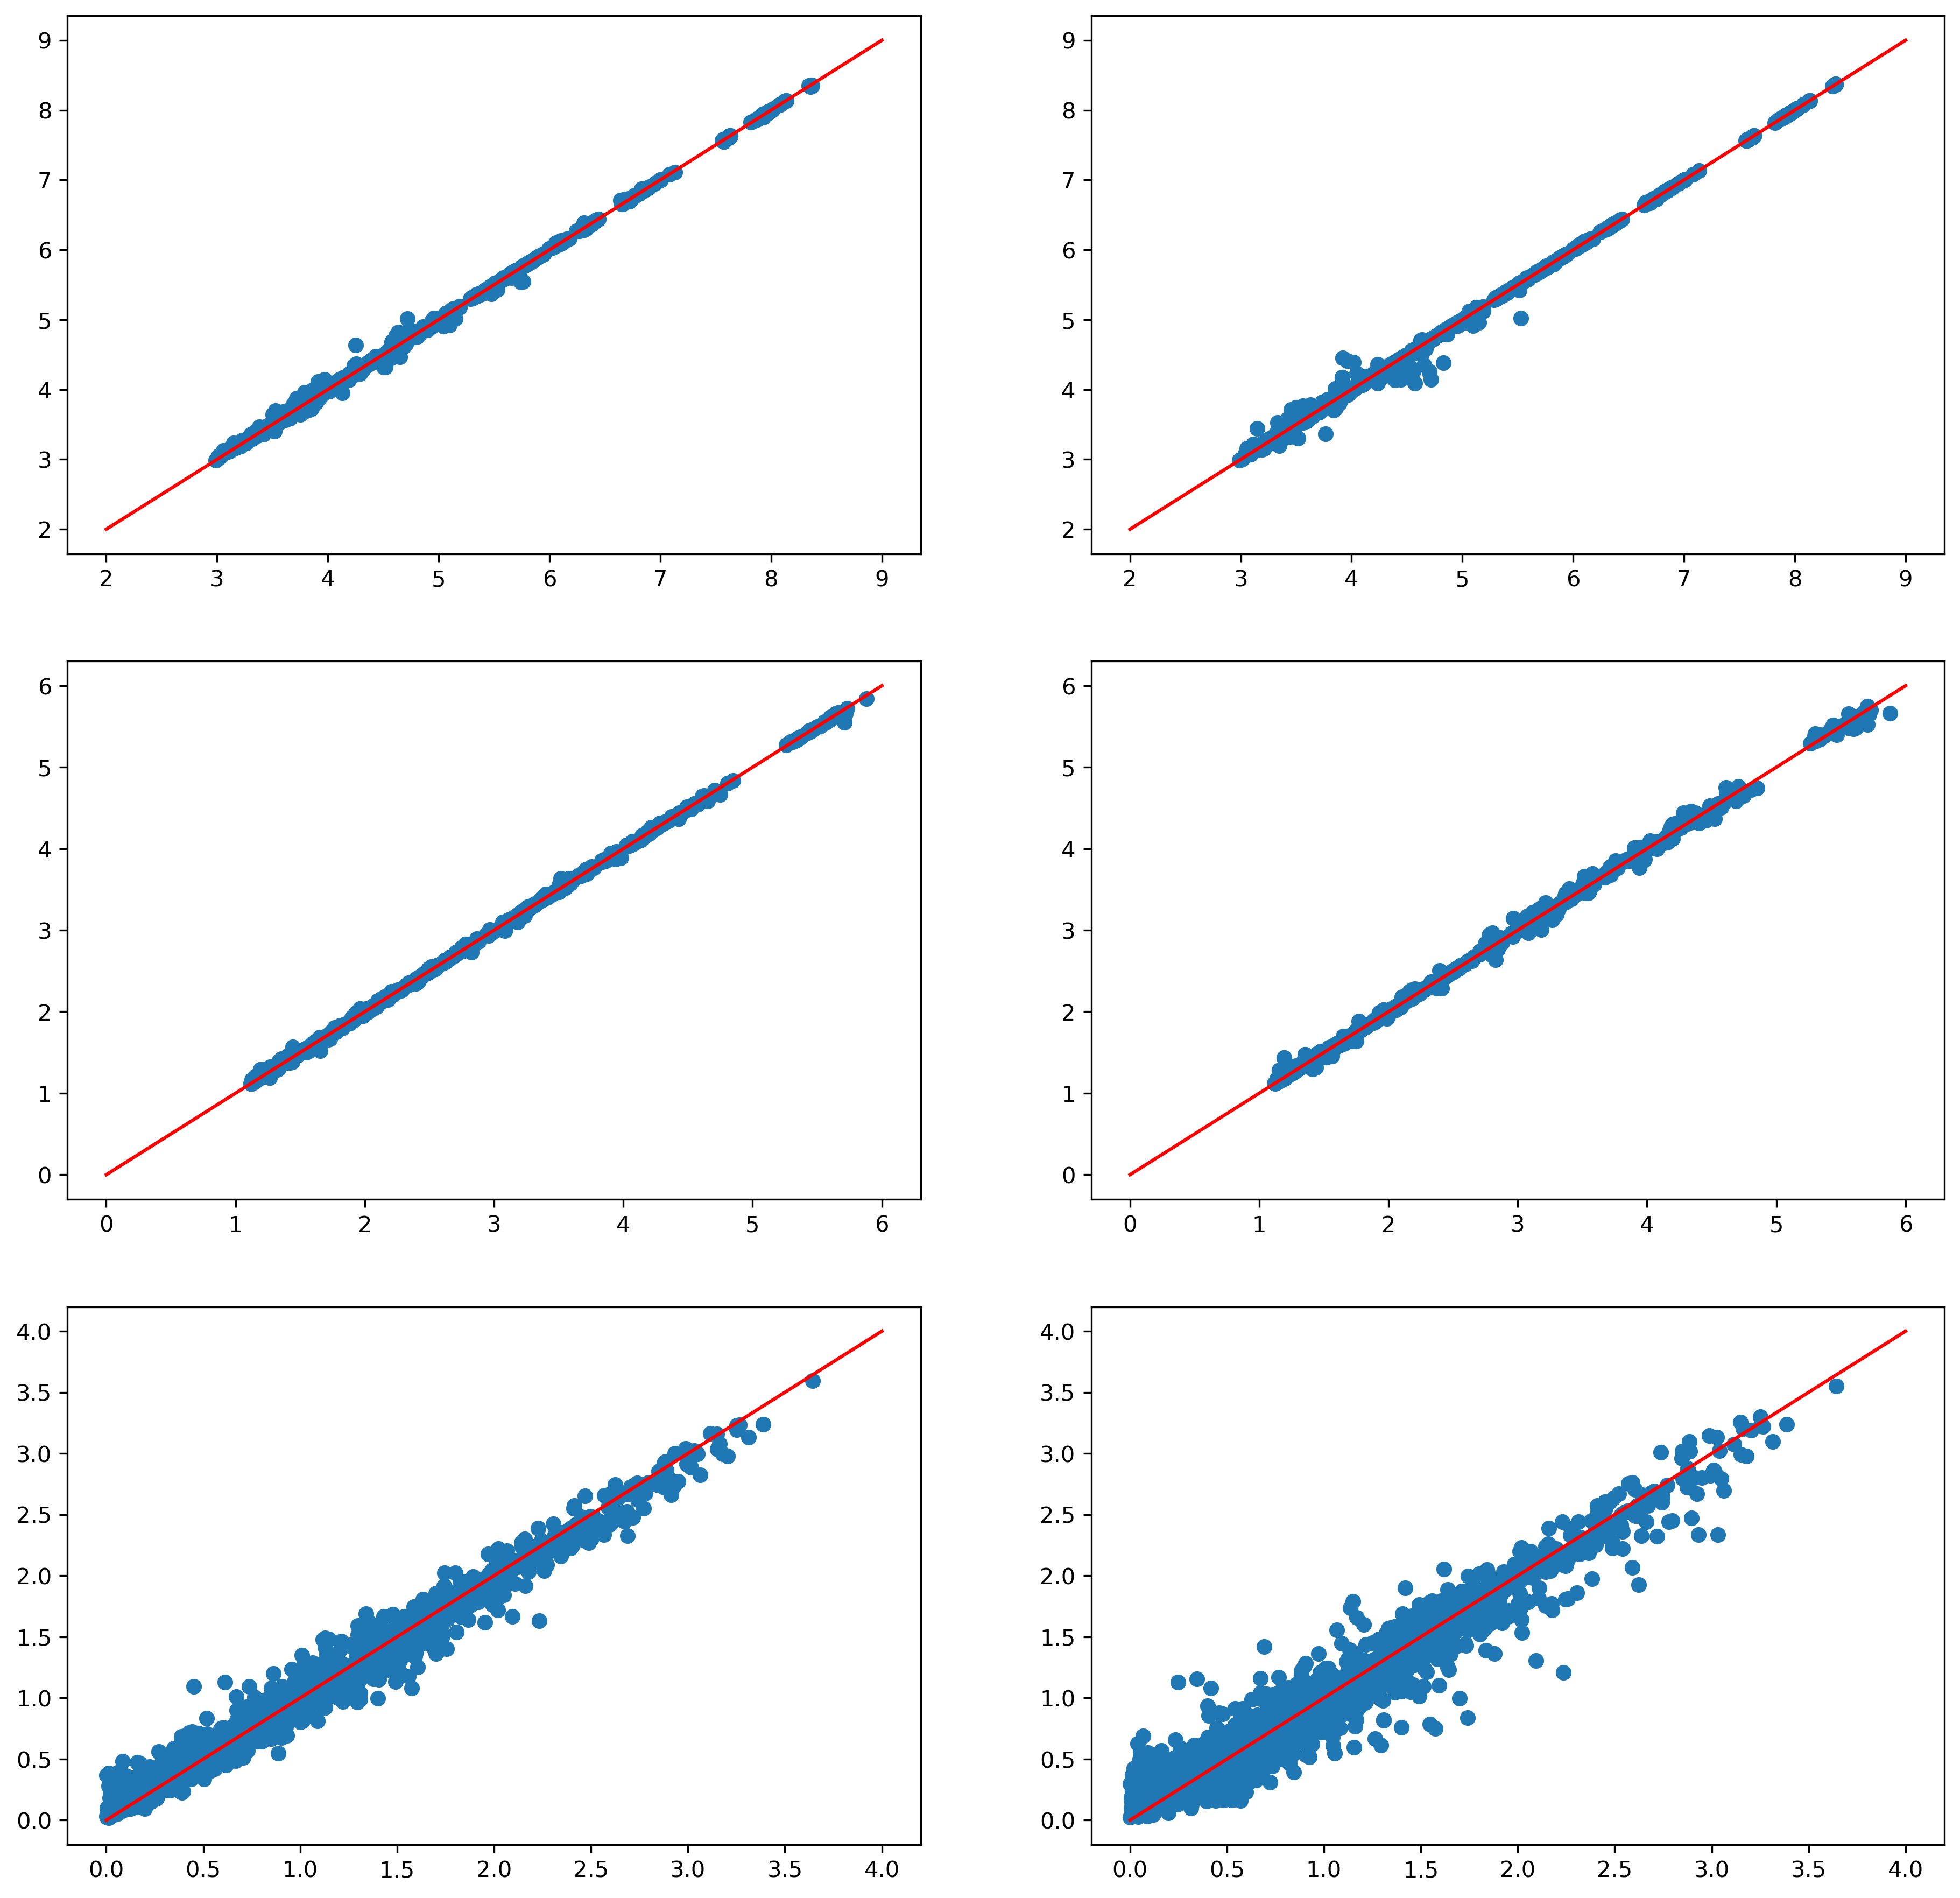

<Figure size 432x288 with 0 Axes>

In [40]:
plot_result(RFmodelA_pred, RFmodelN_pred)

## XGBoost

In [41]:
from xgboost import XGBRegressor

In [42]:
XGmodelA = MultiOutputRegressor(XGBRegressor(max_depth=10,
                                             learnin_rate=0.05,
                                             subsample=0.8,
                                             n_estimators=250,
                                             n_jobs=-1,
                                             random_state=rs)
                               ).fit(XA_train, y_train)

XGmodelN = MultiOutputRegressor(XGBRegressor(max_depth=10,
                                             learnin_rate=0.05,
                                             subsample=0.8,
                                             n_estimators=250,
                                             n_jobs=-1,
                                             random_state=rs)
                               ).fit(XN_train, y_train)

[11:05:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learnin_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learnin_rate" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[11:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "learnin_rate" } might not be used.

  Thi

In [43]:
XGmodelA_pred = XGmodelA.predict(XA_test)
XGmodelN_pred = XGmodelN.predict(XN_test)

In [44]:
evaldf_SRD(XGmodelA_pred, XGmodelN_pred, 'XG')
evaldf_ConSD(XGmodelA_pred, XGmodelN_pred, 'XG')
evaldf_SCD(XGmodelA_pred, XGmodelN_pred, 'XG')

In [45]:
plot_result(XGmodelA_pred, XGmodelN_pred)

<Figure size 432x288 with 0 Axes>

## SVM

In [46]:
from sklearn.svm import SVR

In [47]:
SVmodelA = MultiOutputRegressor(Pipeline([('scaler', StandardScaler()),
                                          ('svrA', SVR(C=100, degree=2, gamma= 'auto', kernel ='rbf'))])
                               ).fit(XA_train, y_train)

SVmodelN = MultiOutputRegressor(Pipeline([('scaler', StandardScaler()),
                                          ('svrN', SVR(C=100, degree=2, gamma= 'auto', kernel ='rbf'))])
                               ).fit(XN_train, y_train)

In [48]:
SVmodelA_pred = SVmodelA.predict(XA_test)
SVmodelN_pred = SVmodelN.predict(XN_test)

In [49]:
evaldf_SRD(SVmodelA_pred, SVmodelN_pred, 'SV')
evaldf_ConSD(SVmodelA_pred, SVmodelN_pred, 'SV')
evaldf_SCD(SVmodelA_pred, SVmodelN_pred, 'SV')

In [50]:
plot_result(SVmodelA_pred, SVmodelN_pred)

<Figure size 432x288 with 0 Axes>

## DNN

In [51]:
import tensorflow as tf

In [52]:
scalerA = StandardScaler()
scalerA.fit(XA_train)
XA_train_s = scalerA.transform(XA_train)
XA_test_s = scalerA.transform(XA_test)

In [53]:
scalerN = StandardScaler()
scalerN.fit(XN_train)
XN_train_s = scalerN.transform(XN_train)
XN_test_s = scalerN.transform(XN_test)

In [54]:
np.random.seed(rs)
tf.random.set_seed(rs)

In [55]:
DNmodelA = tf.keras.Sequential()

DNmodelA.add(tf.keras.layers.Dense(22, input_dim=XA_train_s.shape[1], activation='tanh'))
DNmodelA.add(tf.keras.layers.Dense(26, activation='tanh'))
DNmodelA.add(tf.keras.layers.Dense(30, activation='tanh'))
DNmodelA.add(tf.keras.layers.Dense(30, activation='tanh'))
DNmodelA.add(tf.keras.layers.Dense(30, activation='tanh'))
DNmodelA.add(tf.keras.layers.Dense(3))

DNmodelA.compile(loss="mean_squared_error", optimizer="adam")

DNmodelA.fit(XA_train_s, y_train, epochs= 150)

Epoch 1/150
125/125 [==============================] - 0s 958us/step - loss: 3.2238
Epoch 2/150
125/125 [==============================] - 0s 900us/step - loss: 0.4089
Epoch 3/150
125/125 [==============================] - 0s 767us/step - loss: 0.2881
Epoch 4/150
125/125 [==============================] - 0s 874us/step - loss: 0.1931
Epoch 5/150
125/125 [==============================] - 0s 868us/step - loss: 0.1259
Epoch 6/150
125/125 [==============================] - 0s 785us/step - loss: 0.0831
Epoch 7/150
125/125 [==============================] - 0s 882us/step - loss: 0.0623
Epoch 8/150
125/125 [==============================] - 0s 902us/step - loss: 0.0507
Epoch 9/150
125/125 [==============================] - 0s 861us/step - loss: 0.0416
Epoch 10/150
125/125 [==============================] - 0s 802us/step - loss: 0.0339
Epoch 11/150
125/125 [==============================] - 0s 807us/step - loss: 0.0292
Epoch 12/150
125/125 [==============================] - 0s 947us/step - lo

125/125 [==============================] - 0s 873us/step - loss: 0.0024
Epoch 98/150
125/125 [==============================] - 0s 856us/step - loss: 0.0029
Epoch 99/150
125/125 [==============================] - 0s 844us/step - loss: 0.0023
Epoch 100/150
125/125 [==============================] - 0s 835us/step - loss: 0.0027
Epoch 101/150
125/125 [==============================] - 0s 831us/step - loss: 0.0025
Epoch 102/150
125/125 [==============================] - 0s 842us/step - loss: 0.0026
Epoch 103/150
125/125 [==============================] - 0s 811us/step - loss: 0.0024
Epoch 104/150
125/125 [==============================] - 0s 846us/step - loss: 0.0024
Epoch 105/150
125/125 [==============================] - 0s 841us/step - loss: 0.0028
Epoch 106/150
125/125 [==============================] - 0s 889us/step - loss: 0.0026
Epoch 107/150
125/125 [==============================] - 0s 816us/step - loss: 0.0021
Epoch 108/150
125/125 [==============================] - 0s 855us/step

In [56]:
DNmodelN = tf.keras.Sequential()

DNmodelN.add(tf.keras.layers.Dense(22, input_dim=XN_train_s.shape[1], activation='tanh'))
DNmodelN.add(tf.keras.layers.Dense(26, activation='tanh'))
DNmodelN.add(tf.keras.layers.Dense(30, activation='tanh'))
DNmodelN.add(tf.keras.layers.Dense(30, activation='tanh'))
DNmodelN.add(tf.keras.layers.Dense(30, activation='tanh'))
DNmodelN.add(tf.keras.layers.Dense(3))

DNmodelN.compile(loss="mean_squared_error", optimizer="adam")

DNmodelN.fit(XN_train_s, y_train, epochs= 150)

Epoch 1/150
125/125 [==============================] - 0s 877us/step - loss: 3.5316
Epoch 2/150
125/125 [==============================] - 0s 826us/step - loss: 0.4777
Epoch 3/150
125/125 [==============================] - 0s 792us/step - loss: 0.3459
Epoch 4/150
125/125 [==============================] - 0s 871us/step - loss: 0.2366
Epoch 5/150
125/125 [==============================] - 0s 855us/step - loss: 0.1528
Epoch 6/150
125/125 [==============================] - 0s 801us/step - loss: 0.1008
Epoch 7/150
125/125 [==============================] - 0s 802us/step - loss: 0.0734
Epoch 8/150
125/125 [==============================] - 0s 845us/step - loss: 0.0618
Epoch 9/150
125/125 [==============================] - 0s 793us/step - loss: 0.0524
Epoch 10/150
125/125 [==============================] - 0s 943us/step - loss: 0.0475
Epoch 11/150
125/125 [==============================] - 0s 795us/step - loss: 0.0431
Epoch 12/150
125/125 [==============================] - 0s 849us/step - lo

125/125 [==============================] - 0s 842us/step - loss: 0.0248
Epoch 98/150
125/125 [==============================] - 0s 855us/step - loss: 0.0256
Epoch 99/150
125/125 [==============================] - 0s 813us/step - loss: 0.0258
Epoch 100/150
125/125 [==============================] - 0s 813us/step - loss: 0.0248
Epoch 101/150
125/125 [==============================] - 0s 820us/step - loss: 0.0251
Epoch 102/150
125/125 [==============================] - 0s 819us/step - loss: 0.0250
Epoch 103/150
125/125 [==============================] - 0s 847us/step - loss: 0.0252
Epoch 104/150
125/125 [==============================] - 0s 838us/step - loss: 0.0263
Epoch 105/150
125/125 [==============================] - 0s 805us/step - loss: 0.0248
Epoch 106/150
125/125 [==============================] - 0s 806us/step - loss: 0.0245
Epoch 107/150
125/125 [==============================] - 0s 831us/step - loss: 0.0255
Epoch 108/150
125/125 [==============================] - 0s 818us/step

In [57]:
DNmodelA_pred = DNmodelA.predict(XA_test_s)
DNmodelN_pred = DNmodelN.predict(XN_test_s)

54/54 [==============================] - 0s 567us/step


In [58]:
evaldf_SRD(DNmodelA_pred, DNmodelN_pred, 'DN')
evaldf_ConSD(DNmodelA_pred, DNmodelN_pred, 'DN')
evaldf_SCD(DNmodelA_pred, DNmodelN_pred, 'DN')

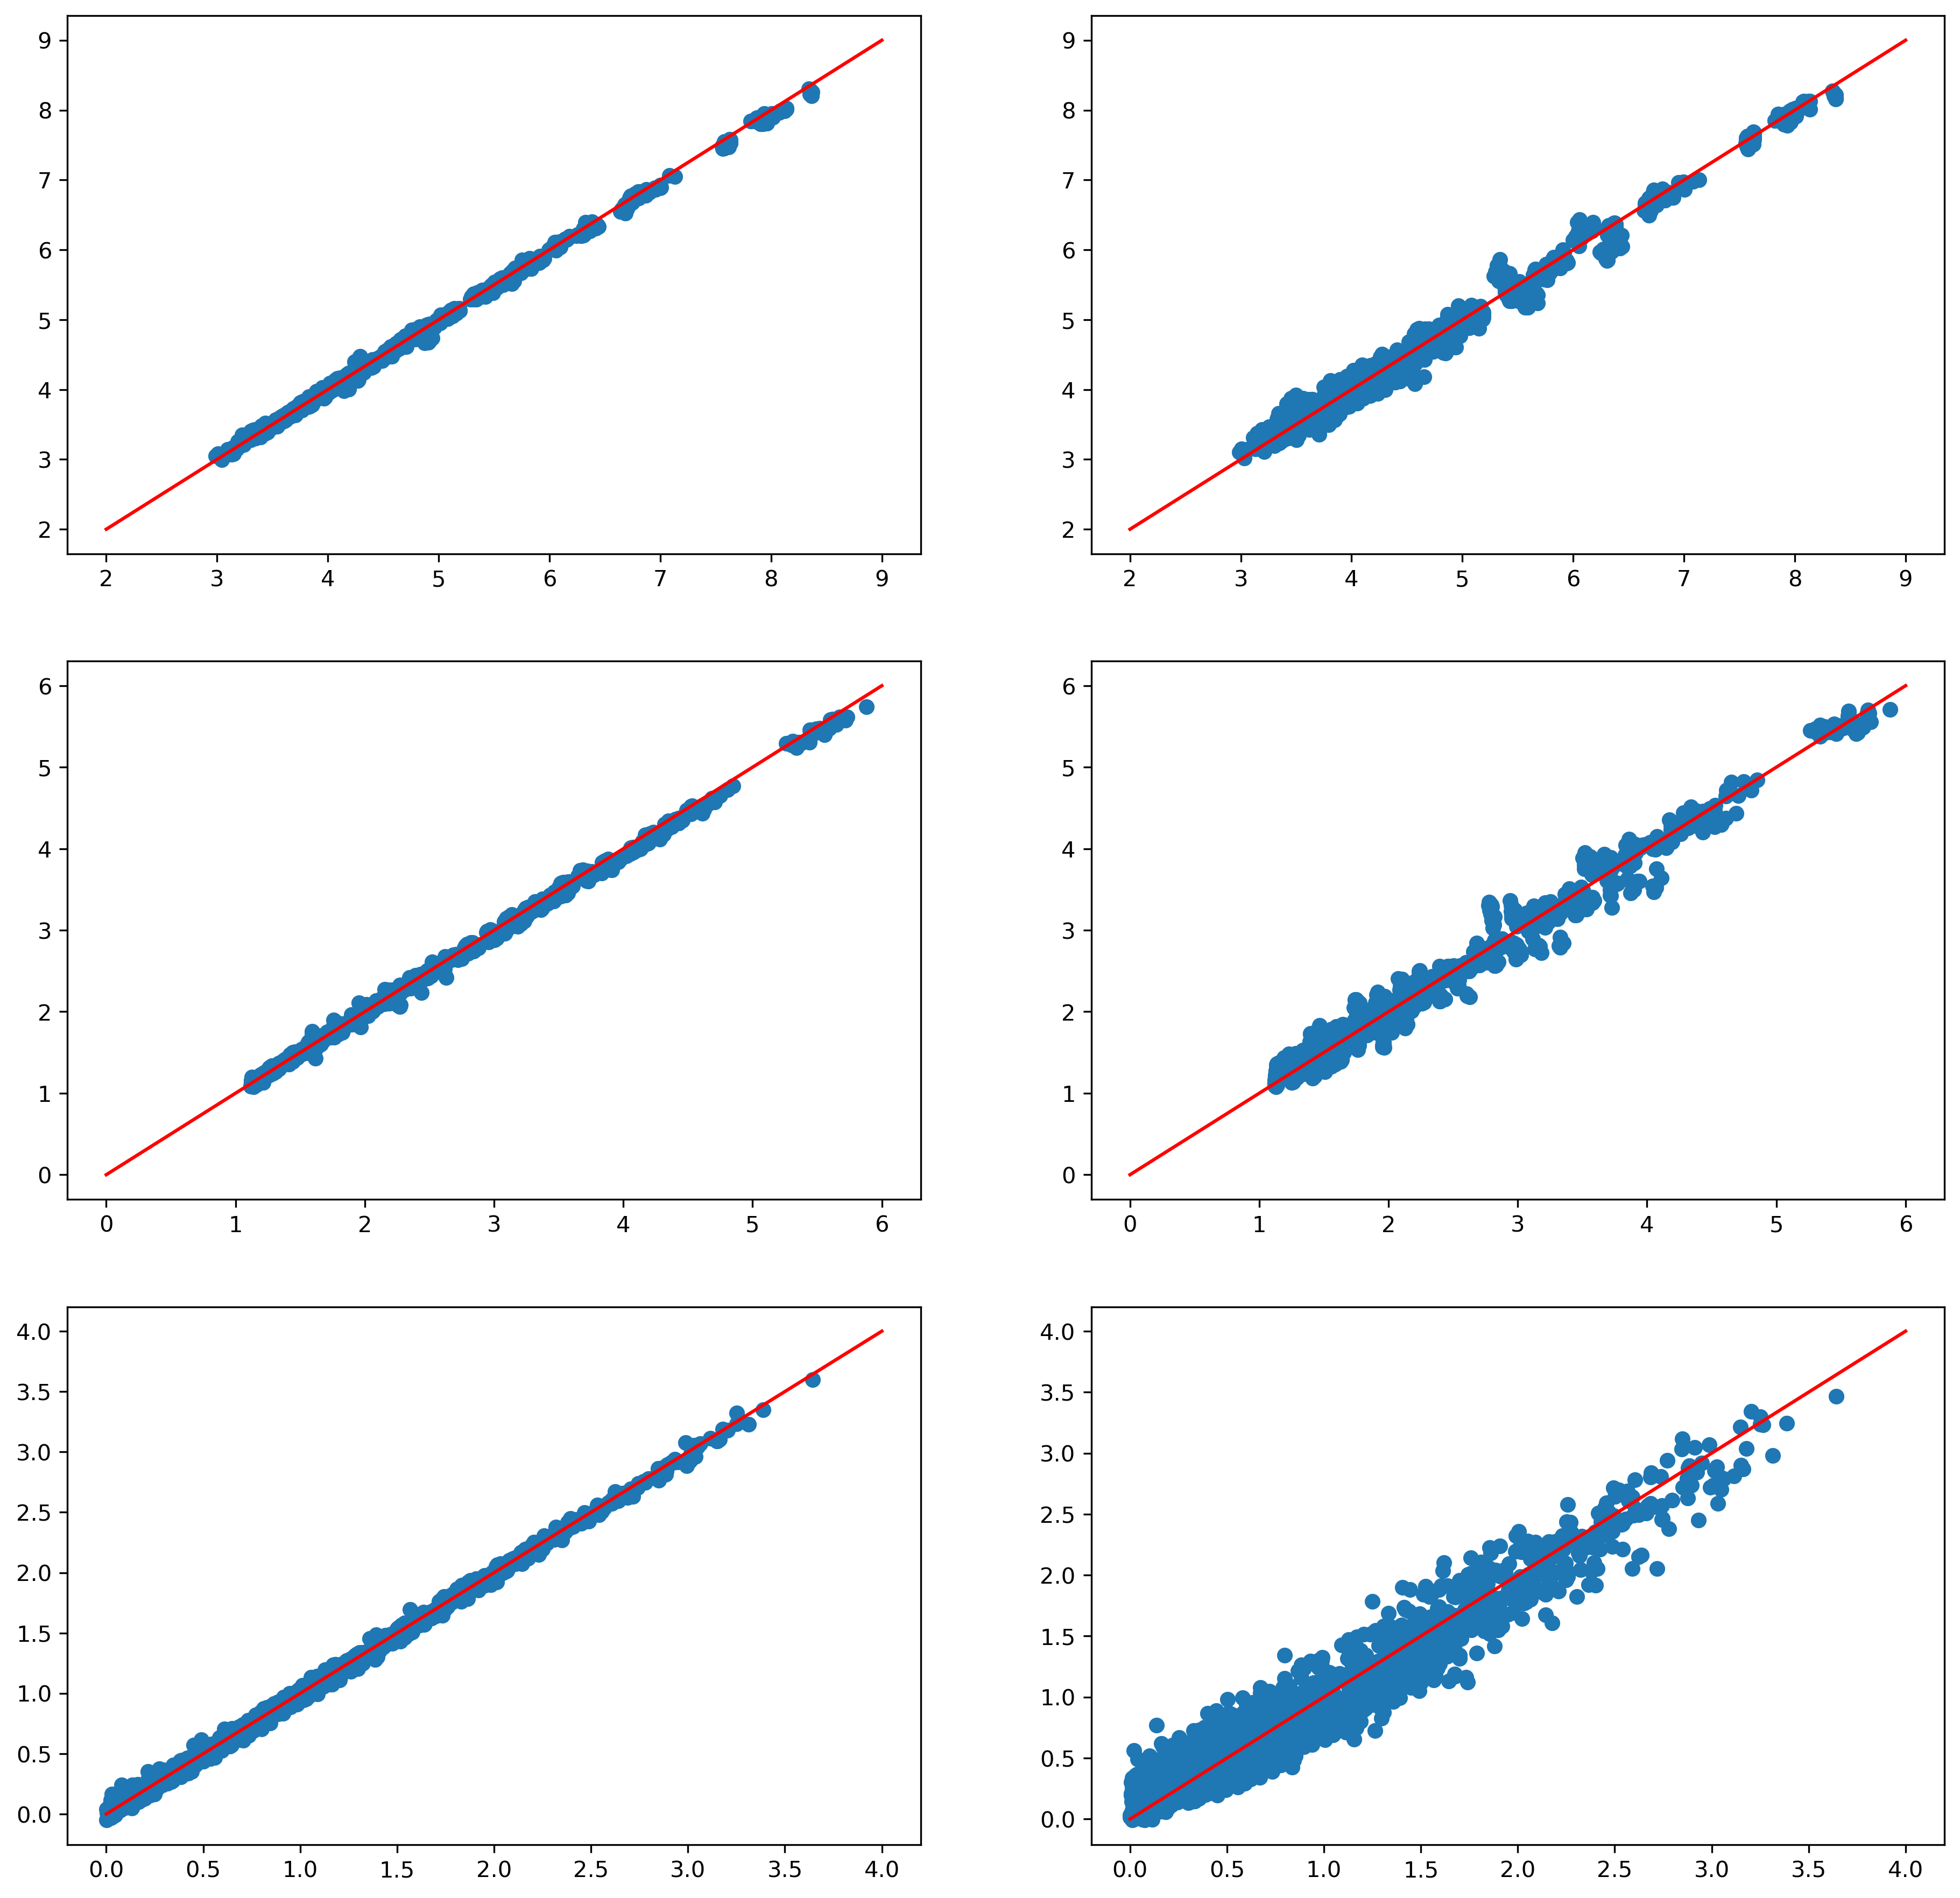

<Figure size 432x288 with 0 Axes>

In [59]:
plot_result(DNmodelA_pred, DNmodelN_pred)

### Performance Table

In [60]:
performance_SRD 

name     R^2_A     MAE_A    MAPE_A    RMSE_A     R^2_N     MAE_N  \
0  DT_SRD  0.997294  0.015638  0.003795  0.064721   0.99551  0.015158   
1  RF_SRD  0.999357  0.015036  0.003522  0.031544  0.998183  0.018223   
2  XG_SRD  0.999342   0.01648  0.003778  0.031924   0.99878  0.021415   
3  SV_SRD  0.996522  0.060836   0.01311  0.073376  0.988253  0.096567   
4  DN_SRD   0.99862  0.033607  0.006771  0.046226  0.988691  0.101462   

     MAPE_N    RMSE_N  
0  0.003674  0.083377  
1  0.004498  0.053044  
2  0.005133  0.043466  
3  0.021752  0.134859  
4  0.022632  0.132323

In [61]:
performance_ConSD

name     R^2_A     MAE_A    MAPE_A    RMSE_A     R^2_N     MAE_N  \
0  DT_ConsSD  0.999265  0.007175  0.003853  0.029584   0.99845  0.014649   
1  RF_ConsSD  0.999767  0.008544  0.004391  0.016656  0.999116  0.015002   
2  XG_ConsSD  0.999552  0.011423    0.0056  0.023105  0.999243  0.014771   
3  SV_ConsSD  0.995443  0.061178  0.033704  0.073682  0.982607  0.110182   
4  DN_ConsSD  0.998279  0.031619  0.014681  0.045285  0.981887  0.112858   

     MAPE_N    RMSE_N  
0  0.005433  0.042966  
1  0.006307  0.032448  
2  0.006311  0.030037  
3  0.059599  0.143944  
4  0.060602  0.146893

In [62]:
performance_SCD 

name     R^2_A     MAE_A    MAPE_A    RMSE_A     R^2_N     MAE_N  \
0  DT_SCD  0.941458  0.109687  0.379711  0.174496  0.892017  0.157863   
1  RF_SCD  0.978645  0.071328  0.456123  0.105389  0.940476  0.128844   
2  XG_SCD  0.984334  0.057258  0.308705  0.090266  0.967092  0.089376   
3  SV_SCD  0.993737  0.047019  0.275767  0.057075  0.919221  0.168389   
4  DN_SCD  0.997717  0.026685  0.155864   0.03446  0.928654  0.156755   

     MAPE_N    RMSE_N  
0  0.636279  0.236989  
1  0.675928  0.175953  
2  0.420662  0.130828  
3  0.756183  0.204975  
4  0.659426  0.192636

### Out of Sample evaluations

In [63]:
os = pd.read_excel('data/os_data.xlsx')

In [64]:
os = os[os["LMTD"] > 0]

In [65]:
os = os[os["LA Chilling Duty"] >= 0]

In [66]:
os["SCD (MJ/kg)"] = (0.001 * os["LA Chilling Duty"]) / os["Captured CO2 (kg/h)"]

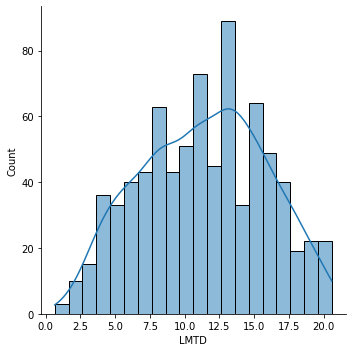

In [67]:
sns.displot(os["LMTD"], bins=20, kde=True)

In [68]:
os_inp_A = os[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency','LMTD','Abs Height']]
os_inp_N = os[["FG Temperature", "Lean Loading",'Lean Amine Temperature','L/G (kg/kg)','Flue gas CO2 cons','CO2 Capture Efficiency']]

In [69]:
os_out = os[["SRD (MJ/kg CO2)", "Condensor Specific Duty", "SCD (MJ/kg)"]]

In [70]:
DTmodelA_ospred = DTmodelA.predict(os_inp_A)
RFmodelA_ospred = RFmodelA.predict(os_inp_A)
XGmodelA_ospred = XGmodelA.predict(os_inp_A)
SVmodelA_ospred = SVmodelA.predict(os_inp_A)
DNmodelA_ospred = DNmodelA.predict(scalerA.transform(os_inp_A))

25/25 [==============================] - 0s 978us/step


In [71]:
DTmodelN_ospred = DTmodelN.predict(os_inp_N)
RFmodelN_ospred = RFmodelN.predict(os_inp_N)
XGmodelN_ospred = XGmodelN.predict(os_inp_N)
SVmodelN_ospred = SVmodelN.predict(os_inp_N)
DNmodelN_ospred = DNmodelN.predict(scalerN.transform(os_inp_N))

25/25 [==============================] - 0s 1ms/step


In [72]:
def os_plot(Y1, Y2, plot_name):
    
    AB = ['DT', 'RF', 'XG', 'SV', 'DN']
    AB_ax = np.arange(len(AB))
    plt.bar(AB_ax - 0.2, Y1, 0.4, label = 'Adv')
    plt.bar(AB_ax + 0.2, Y2, 0.4, label = 'Nor')
    
    plt.xticks(AB_ax, AB)
    plt.xlabel("ML Models")
    plt.ylabel("% MAPE")
    plt.title(str(plot_name))
    plt.legend()
    plt.show()

In [73]:
Y_0_A = [mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], DTmodelA_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], RFmodelA_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], XGmodelA_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], SVmodelA_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], DNmodelA_ospred[: , 0]) * 100 ]

In [74]:
Y_0_N = [mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], DTmodelN_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], RFmodelN_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], XGmodelN_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], SVmodelN_ospred[: , 0]) * 100 ,
         mean_absolute_percentage_error(os_out["SRD (MJ/kg CO2)"], DNmodelN_ospred[: , 0]) * 100 ]

In [75]:
os_plot(Y_0_A, Y_0_N, 'Specific Reboiler Duty Predictions')

In [76]:
Y_1_A = [mean_absolute_percentage_error(os_out["Condensor Specific Duty"], DTmodelA_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], RFmodelA_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], XGmodelA_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], SVmodelA_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], DNmodelA_ospred[: , 1]) * 100]

In [77]:
Y_1_N = [mean_absolute_percentage_error(os_out["Condensor Specific Duty"], DTmodelN_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], RFmodelN_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], XGmodelN_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], SVmodelN_ospred[: , 1]) * 100 ,
         mean_absolute_percentage_error(os_out["Condensor Specific Duty"], DNmodelN_ospred[: , 1]) * 100]

In [78]:
os_plot(Y_1_A, Y_1_N, 'Specific Condenser Duty Predictions')

In [79]:
Y_2_A = [mean_absolute_percentage_error(os_out["SCD (MJ/kg)"], DTmodelA_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SCD (MJ/kg)"], RFmodelA_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SCD (MJ/kg)"], XGmodelA_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SCD (MJ/kg)"], SVmodelA_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SCD (MJ/kg)"], DNmodelA_ospred[: , 2]) * 100 ]

In [80]:
Y_2_N = [mean_absolute_percentage_error(os_out["SCD (MJ/kg)"], DTmodelN_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SCD (MJ/kg)"], RFmodelN_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SCD (MJ/kg)"], XGmodelN_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SCD (MJ/kg)"], SVmodelN_ospred[: , 2]) * 100 ,
         mean_absolute_percentage_error(os_out["SCD (MJ/kg)"], DNmodelN_ospred[: , 2]) * 100 ]

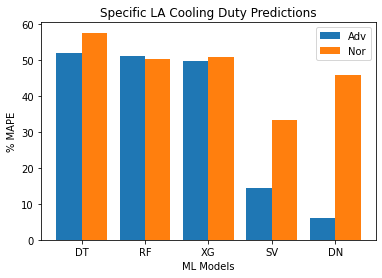

In [81]:
os_plot(Y_2_A, Y_2_N, 'Specific LA Cooling Duty Predictions')

In [82]:
r2_score(os_out["SCD (MJ/kg)"], SVmodelN_ospred[: , 2])

0.7460859876028865

In [83]:
r2_score(os_out["Condensor Specific Duty"], XGmodelA_ospred[: , 1])

0.7826668839769502

### Feature importance analysis

In [84]:
import keras

In [85]:
import eli5
from eli5.sklearn import PermutationImportance

In [86]:
from keras.wrappers.scikit_learn import KerasRegressor

In [87]:
from scikeras.wrappers import KerasClassifier, KerasRegressor

In [88]:
def dnmodel():
    modelP= tf.keras.Sequential()

    modelP.add(tf.keras.layers.Dense(22, input_dim=XA_train_s.shape[1], activation='tanh'))
    modelP.add(tf.keras.layers.Dense(26, activation='tanh'))
    modelP.add(tf.keras.layers.Dense(30, activation='tanh'))
    modelP.add(tf.keras.layers.Dense(30, activation='tanh'))
    modelP.add(tf.keras.layers.Dense(30, activation='tanh'))
    modelP.add(tf.keras.layers.Dense(1))

    modelP.compile(loss="mean_squared_error", optimizer="adam")
    return modelP

In [89]:
my_model = KerasRegressor(model=dnmodel)

In [90]:
my_model.fit(XA_train_s,y_train['SRD (MJ/kg CO2)'])

125/125 [==============================] - 0s 976us/step - loss: 6.3648


KerasRegressor(
	model=<function dnmodel at 0x000002E18F8375E0>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

In [91]:
perm = PermutationImportance(my_model, scoring='neg_mean_absolute_error' , random_state=211, n_iter=30).fit(XA_test_s,y_test['SRD (MJ/kg CO2)'])

54/54 [==============================] - 0s 513us/step


54/54 [==============================] - 0s 567us/step


In [92]:
eli5.explain_weights(perm, feature_names = XA_train.columns.tolist())

Explanation(estimator="PermutationImportance(estimator=KerasRegressor(model=<function dnmodel at 0x000002E18F8375E0>),\n                      n_iter=30, random_state=211,\n                      scoring='neg_mean_absolute_error')", description="\nFeature importances, computed as a decrease in score when feature\nvalues are permuted (i.e. become noise). This is also known as \npermutation importance.\n\nIf feature importances are computed on the same data as used for training, \nthey don't reflect importance of features for generalization. Use a held-out\ndataset if you want generalization feature importances.\n", error=None, method='feature importances', is_regression=True, targets=None, feature_importances=FeatureImportances(importances=[FeatureWeight(feature='Lean Loading', weight=0.42061087125863106, std=0.013905948093748559, value=None), FeatureWeight(feature='L/G (kg/kg)', weight=0.2635683311439566, std=0.007992544566089206, value=None), FeatureWeight(feature='Flue gas CO2 cons', weight=0.19391803456360826, std=0.011456322539106377, value=None), FeatureWeight(feature='LMTD', weight=0.07412736150858189, std=0.00783413286942615, value=None), FeatureWeight(feature='CO2 Capture Efficiency', weight=0.03159044463441501, std=0.00475888057297508, value=None), FeatureWeight(feature='FG Temperature', weight=-0.004566807038316101, std=0.003556576903024307, value=None), FeatureWeight(feature='Lean Amine Temperature', weight=-0.005122870465839169, std=0.004474494451674987, value=None), FeatureWeight(feature='Abs Height', weight=-0.01436738583024042, std=0.004759704779510822, value=None)], remaining=0), decision_tree=None, highlight_spaces=None, transition_features=None, image=None)

In [95]:
import shap

In [96]:
explainer = shap.Explainer(DNmodelA.predict, XA_test_s)

In [97]:
shap_values = explainer(XA_test_s)

27/27 [==============================] - 0s 513us/step


Exact explainer:   1%|▋                                                                      | 16/1712 [00:00<?, ?it/s]

27/27 [==============================] - 0s 821us/step


Exact explainer:   1%|▋                                                              | 18/1712 [00:10<06:12,  4.55it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   1%|▋                                                              | 19/1712 [00:11<09:48,  2.88it/s]

28/28 [==============================] - 0s 921us/step


Exact explainer:   1%|▋                                                              | 20/1712 [00:11<11:29,  2.46it/s]

27/27 [==============================] - 0s 652us/step


Exact explainer:   1%|▊                                                              | 21/1712 [00:12<11:59,  2.35it/s]

27/27 [==============================] - 0s 718us/step


Exact explainer:   1%|▊                                                              | 22/1712 [00:12<12:23,  2.27it/s]

27/27 [==============================] - 0s 701us/step


Exact explainer:   1%|▊                                                              | 23/1712 [00:13<12:40,  2.22it/s]

27/27 [==============================] - 0s 672us/step


Exact explainer:   1%|▉                                                              | 24/1712 [00:13<13:00,  2.16it/s]

27/27 [==============================] - 0s 646us/step


Exact explainer:   1%|▉                                                              | 25/1712 [00:13<12:58,  2.17it/s]

27/27 [==============================] - 0s 736us/step


Exact explainer:   2%|▉                                                              | 26/1712 [00:14<13:12,  2.13it/s]

27/27 [==============================] - 0s 805us/step


Exact explainer:   2%|▉                                                              | 27/1712 [00:14<13:48,  2.03it/s]

27/27 [==============================] - 0s 736us/step


Exact explainer:   2%|█                                                              | 28/1712 [00:15<13:48,  2.03it/s]

27/27 [==============================] - 0s 499us/step


Exact explainer:   2%|█                                                              | 29/1712 [00:15<13:43,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   2%|█                                                              | 30/1712 [00:16<13:42,  2.05it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:   2%|█▏                                                             | 31/1712 [00:16<13:45,  2.04it/s]

27/27 [==============================] - 0s 538us/step


Exact explainer:   2%|█▏                                                             | 32/1712 [00:17<13:20,  2.10it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   2%|█▏                                                             | 33/1712 [00:17<13:41,  2.04it/s]

27/27 [==============================] - 0s 646us/step


Exact explainer:   2%|█▎                                                             | 34/1712 [00:18<13:37,  2.05it/s]

27/27 [==============================] - 0s 507us/step


Exact explainer:   2%|█▎                                                             | 35/1712 [00:18<13:16,  2.10it/s]

27/27 [==============================] - 0s 647us/step


Exact explainer:   2%|█▎                                                             | 36/1712 [00:19<13:06,  2.13it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   2%|█▎                                                             | 37/1712 [00:19<13:21,  2.09it/s]

28/28 [==============================] - 0s 570us/step


Exact explainer:   2%|█▍                                                             | 38/1712 [00:20<13:10,  2.12it/s]

27/27 [==============================] - 0s 906us/step


Exact explainer:   2%|█▍                                                             | 39/1712 [00:20<13:22,  2.08it/s]

27/27 [==============================] - 0s 612us/step


Exact explainer:   2%|█▍                                                             | 40/1712 [00:21<13:19,  2.09it/s]

27/27 [==============================] - 0s 803us/step


Exact explainer:   2%|█▌                                                             | 41/1712 [00:21<13:37,  2.04it/s]

27/27 [==============================] - 0s 784us/step


Exact explainer:   2%|█▌                                                             | 42/1712 [00:22<13:44,  2.03it/s]

28/28 [==============================] - 0s 543us/step


Exact explainer:   3%|█▌                                                             | 43/1712 [00:22<13:38,  2.04it/s]

27/27 [==============================] - 0s 593us/step


Exact explainer:   3%|█▌                                                             | 44/1712 [00:23<13:47,  2.02it/s]

27/27 [==============================] - 0s 527us/step


Exact explainer:   3%|█▋                                                             | 45/1712 [00:23<13:24,  2.07it/s]

27/27 [==============================] - 0s 659us/step


Exact explainer:   3%|█▋                                                             | 46/1712 [00:24<13:14,  2.10it/s]

27/27 [==============================] - 0s 567us/step


Exact explainer:   3%|█▋                                                             | 47/1712 [00:24<13:06,  2.12it/s]

28/28 [==============================] - 0s 669us/step


Exact explainer:   3%|█▊                                                             | 48/1712 [00:25<13:12,  2.10it/s]

27/27 [==============================] - 0s 547us/step


Exact explainer:   3%|█▊                                                             | 49/1712 [00:25<13:01,  2.13it/s]

27/27 [==============================] - 0s 539us/step


Exact explainer:   3%|█▊                                                             | 50/1712 [00:26<13:01,  2.13it/s]

27/27 [==============================] - 0s 562us/step


Exact explainer:   3%|█▉                                                             | 51/1712 [00:26<13:50,  2.00it/s]

28/28 [==============================] - 0s 515us/step


Exact explainer:   3%|█▉                                                             | 52/1712 [00:27<13:36,  2.03it/s]

27/27 [==============================] - 0s 519us/step


Exact explainer:   3%|█▉                                                             | 53/1712 [00:27<13:27,  2.05it/s]

28/28 [==============================] - 0s 964us/step


Exact explainer:   3%|█▉                                                             | 54/1712 [00:28<13:13,  2.09it/s]

27/27 [==============================] - 0s 475us/step


Exact explainer:   3%|██                                                             | 55/1712 [00:28<13:18,  2.07it/s]

28/28 [==============================] - 0s 494us/step


Exact explainer:   3%|██                                                             | 56/1712 [00:29<13:37,  2.03it/s]

27/27 [==============================] - 0s 945us/step


Exact explainer:   3%|██                                                             | 57/1712 [00:29<13:47,  2.00it/s]

27/27 [==============================] - 0s 559us/step


Exact explainer:   3%|██▏                                                            | 58/1712 [00:30<14:38,  1.88it/s]

27/27 [==============================] - 0s 582us/step


Exact explainer:   3%|██▏                                                            | 59/1712 [00:30<14:25,  1.91it/s]

27/27 [==============================] - 0s 727us/step


Exact explainer:   4%|██▏                                                            | 60/1712 [00:31<13:45,  2.00it/s]

28/28 [==============================] - 0s 715us/step


Exact explainer:   4%|██▏                                                            | 61/1712 [00:31<13:39,  2.01it/s]

27/27 [==============================] - 0s 619us/step


Exact explainer:   4%|██▎                                                            | 62/1712 [00:32<13:34,  2.03it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:   4%|██▎                                                            | 63/1712 [00:32<13:40,  2.01it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:   4%|██▎                                                            | 64/1712 [00:33<13:54,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:   4%|██▍                                                            | 65/1712 [00:33<13:36,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   4%|██▍                                                            | 66/1712 [00:34<13:21,  2.05it/s]

27/27 [==============================] - 0s 751us/step


Exact explainer:   4%|██▍                                                            | 67/1712 [00:34<13:06,  2.09it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:   4%|██▌                                                            | 68/1712 [00:35<13:42,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   4%|██▌                                                            | 69/1712 [00:35<14:03,  1.95it/s]

28/28 [==============================] - 0s 750us/step


Exact explainer:   4%|██▌                                                            | 70/1712 [00:36<13:46,  1.99it/s]

27/27 [==============================] - 0s 996us/step


Exact explainer:   4%|██▌                                                            | 71/1712 [00:36<13:15,  2.06it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   4%|██▋                                                            | 72/1712 [00:37<13:27,  2.03it/s]

27/27 [==============================] - 0s 667us/step


Exact explainer:   4%|██▋                                                            | 73/1712 [00:37<13:26,  2.03it/s]

27/27 [==============================] - 0s 518us/step


Exact explainer:   4%|██▋                                                            | 74/1712 [00:38<13:23,  2.04it/s]

27/27 [==============================] - 0s 569us/step


Exact explainer:   4%|██▊                                                            | 75/1712 [00:38<13:28,  2.02it/s]

27/27 [==============================] - 0s 611us/step


Exact explainer:   4%|██▊                                                            | 76/1712 [00:39<13:43,  1.99it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:   4%|██▊                                                            | 77/1712 [00:39<13:42,  1.99it/s]

27/27 [==============================] - 0s 855us/step


Exact explainer:   5%|██▊                                                            | 78/1712 [00:39<13:22,  2.04it/s]

28/28 [==============================] - 0s 594us/step


Exact explainer:   5%|██▉                                                            | 79/1712 [00:40<13:21,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   5%|██▉                                                            | 80/1712 [00:40<13:07,  2.07it/s]

27/27 [==============================] - 0s 680us/step


Exact explainer:   5%|██▉                                                            | 81/1712 [00:41<12:55,  2.10it/s]

28/28 [==============================] - 0s 698us/step


Exact explainer:   5%|███                                                            | 82/1712 [00:41<12:58,  2.09it/s]

28/28 [==============================] - 0s 755us/step


Exact explainer:   5%|███                                                            | 83/1712 [00:42<13:02,  2.08it/s]

27/27 [==============================] - 0s 673us/step


Exact explainer:   5%|███                                                            | 84/1712 [00:42<12:46,  2.12it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   5%|███▏                                                           | 85/1712 [00:43<13:02,  2.08it/s]

27/27 [==============================] - 0s 559us/step


Exact explainer:   5%|███▏                                                           | 86/1712 [00:43<13:10,  2.06it/s]

27/27 [==============================] - 0s 611us/step


Exact explainer:   5%|███▏                                                           | 87/1712 [00:44<12:50,  2.11it/s]

27/27 [==============================] - 0s 608us/step


Exact explainer:   5%|███▏                                                           | 88/1712 [00:44<13:07,  2.06it/s]

27/27 [==============================] - 0s 574us/step


Exact explainer:   5%|███▎                                                           | 89/1712 [00:45<13:18,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   5%|███▎                                                           | 90/1712 [00:45<13:18,  2.03it/s]

27/27 [==============================] - 0s 827us/step


Exact explainer:   5%|███▎                                                           | 91/1712 [00:46<13:28,  2.01it/s]

27/27 [==============================] - 0s 956us/step


Exact explainer:   5%|███▍                                                           | 92/1712 [00:46<13:38,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   5%|███▍                                                           | 93/1712 [00:47<13:45,  1.96it/s]

28/28 [==============================] - 0s 518us/step


Exact explainer:   5%|███▍                                                           | 94/1712 [00:47<13:52,  1.94it/s]

27/27 [==============================] - 0s 539us/step


Exact explainer:   6%|███▍                                                           | 95/1712 [00:48<13:27,  2.00it/s]

27/27 [==============================] - 0s 952us/step


Exact explainer:   6%|███▌                                                           | 96/1712 [00:48<13:15,  2.03it/s]

27/27 [==============================] - 0s 653us/step


Exact explainer:   6%|███▌                                                           | 97/1712 [00:49<13:17,  2.02it/s]

27/27 [==============================] - 0s 518us/step


Exact explainer:   6%|███▌                                                           | 98/1712 [00:49<13:03,  2.06it/s]

27/27 [==============================] - 0s 586us/step


Exact explainer:   6%|███▋                                                           | 99/1712 [00:50<12:57,  2.07it/s]

28/28 [==============================] - 0s 689us/step


Exact explainer:   6%|███▌                                                          | 100/1712 [00:50<13:08,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   6%|███▋                                                          | 101/1712 [00:51<13:01,  2.06it/s]

27/27 [==============================] - 0s 690us/step


Exact explainer:   6%|███▋                                                          | 102/1712 [00:51<13:31,  1.98it/s]

27/27 [==============================] - 0s 581us/step


Exact explainer:   6%|███▋                                                          | 103/1712 [00:52<13:22,  2.01it/s]

27/27 [==============================] - 0s 500us/step


Exact explainer:   6%|███▊                                                          | 104/1712 [00:52<12:41,  2.11it/s]

27/27 [==============================] - 0s 570us/step


Exact explainer:   6%|███▊                                                          | 105/1712 [00:53<12:21,  2.17it/s]

27/27 [==============================] - 0s 567us/step


Exact explainer:   6%|███▊                                                          | 106/1712 [00:53<12:09,  2.20it/s]

27/27 [==============================] - 0s 519us/step


Exact explainer:   6%|███▉                                                          | 107/1712 [00:53<11:56,  2.24it/s]

27/27 [==============================] - 0s 501us/step


Exact explainer:   6%|███▉                                                          | 108/1712 [00:54<12:02,  2.22it/s]

28/28 [==============================] - 0s 687us/step


Exact explainer:   6%|███▉                                                          | 109/1712 [00:54<12:10,  2.19it/s]

27/27 [==============================] - 0s 526us/step


Exact explainer:   6%|███▉                                                          | 110/1712 [00:55<12:22,  2.16it/s]

27/27 [==============================] - 0s 614us/step


Exact explainer:   6%|████                                                          | 111/1712 [00:55<12:27,  2.14it/s]

28/28 [==============================] - 0s 578us/step


Exact explainer:   7%|████                                                          | 112/1712 [00:56<12:21,  2.16it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:   7%|████                                                          | 113/1712 [00:56<12:40,  2.10it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:   7%|████▏                                                         | 114/1712 [00:57<12:36,  2.11it/s]

27/27 [==============================] - 0s 720us/step


Exact explainer:   7%|████▏                                                         | 115/1712 [00:57<12:20,  2.16it/s]

27/27 [==============================] - 0s 498us/step


Exact explainer:   7%|████▏                                                         | 116/1712 [00:58<12:17,  2.16it/s]

27/27 [==============================] - 0s 550us/step


Exact explainer:   7%|████▏                                                         | 117/1712 [00:58<12:15,  2.17it/s]

27/27 [==============================] - 0s 731us/step


Exact explainer:   7%|████▎                                                         | 118/1712 [00:59<12:43,  2.09it/s]

27/27 [==============================] - 0s 605us/step


Exact explainer:   7%|████▎                                                         | 119/1712 [00:59<12:51,  2.06it/s]

27/27 [==============================] - 0s 670us/step


Exact explainer:   7%|████▎                                                         | 120/1712 [01:00<12:49,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   7%|████▍                                                         | 121/1712 [01:00<12:39,  2.09it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   7%|████▍                                                         | 122/1712 [01:01<12:30,  2.12it/s]

27/27 [==============================] - 0s 583us/step


Exact explainer:   7%|████▍                                                         | 123/1712 [01:01<12:27,  2.13it/s]

27/27 [==============================] - 0s 560us/step


Exact explainer:   7%|████▍                                                         | 124/1712 [01:01<12:25,  2.13it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:   7%|████▌                                                         | 125/1712 [01:02<12:46,  2.07it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:   7%|████▌                                                         | 126/1712 [01:03<13:01,  2.03it/s]

27/27 [==============================] - 0s 579us/step


Exact explainer:   7%|████▌                                                         | 127/1712 [01:03<12:47,  2.07it/s]

28/28 [==============================] - 0s 564us/step


Exact explainer:   7%|████▋                                                         | 128/1712 [01:03<12:43,  2.08it/s]

27/27 [==============================] - 0s 559us/step


Exact explainer:   8%|████▋                                                         | 129/1712 [01:04<12:39,  2.08it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:   8%|████▋                                                         | 130/1712 [01:04<12:31,  2.11it/s]

27/27 [==============================] - 0s 613us/step


Exact explainer:   8%|████▋                                                         | 131/1712 [01:05<12:24,  2.12it/s]

27/27 [==============================] - 0s 569us/step


Exact explainer:   8%|████▊                                                         | 132/1712 [01:05<12:29,  2.11it/s]

27/27 [==============================] - 0s 631us/step


Exact explainer:   8%|████▊                                                         | 133/1712 [01:06<12:27,  2.11it/s]

27/27 [==============================] - 0s 590us/step


Exact explainer:   8%|████▊                                                         | 134/1712 [01:06<12:44,  2.06it/s]

27/27 [==============================] - 0s 633us/step


Exact explainer:   8%|████▉                                                         | 135/1712 [01:07<12:33,  2.09it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   8%|████▉                                                         | 136/1712 [01:07<12:58,  2.02it/s]

27/27 [==============================] - 0s 529us/step


Exact explainer:   8%|████▉                                                         | 137/1712 [01:08<12:54,  2.03it/s]

27/27 [==============================] - 0s 547us/step


Exact explainer:   8%|████▉                                                         | 138/1712 [01:08<12:58,  2.02it/s]

27/27 [==============================] - 0s 498us/step


Exact explainer:   8%|█████                                                         | 139/1712 [01:09<12:51,  2.04it/s]

27/27 [==============================] - 0s 616us/step


Exact explainer:   8%|█████                                                         | 140/1712 [01:09<13:01,  2.01it/s]

27/27 [==============================] - 0s 596us/step


Exact explainer:   8%|█████                                                         | 141/1712 [01:10<13:09,  1.99it/s]

27/27 [==============================] - 0s 632us/step


Exact explainer:   8%|█████▏                                                        | 142/1712 [01:10<13:25,  1.95it/s]

28/28 [==============================] - 0s 664us/step


Exact explainer:   8%|█████▏                                                        | 143/1712 [01:11<13:00,  2.01it/s]

27/27 [==============================] - 0s 808us/step


Exact explainer:   8%|█████▏                                                        | 144/1712 [01:11<13:05,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   8%|█████▎                                                        | 145/1712 [01:12<12:55,  2.02it/s]

27/27 [==============================] - 0s 853us/step


Exact explainer:   9%|█████▎                                                        | 146/1712 [01:12<13:01,  2.00it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:   9%|█████▎                                                        | 147/1712 [01:13<12:57,  2.01it/s]

27/27 [==============================] - 0s 687us/step


Exact explainer:   9%|█████▎                                                        | 148/1712 [01:13<12:55,  2.02it/s]

27/27 [==============================] - 0s 674us/step


Exact explainer:   9%|█████▍                                                        | 149/1712 [01:14<12:49,  2.03it/s]

27/27 [==============================] - 0s 572us/step


Exact explainer:   9%|█████▍                                                        | 150/1712 [01:14<12:50,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   9%|█████▍                                                        | 151/1712 [01:15<13:07,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   9%|█████▌                                                        | 152/1712 [01:15<13:10,  1.97it/s]

27/27 [==============================] - 0s 794us/step


Exact explainer:   9%|█████▌                                                        | 153/1712 [01:16<12:58,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   9%|█████▌                                                        | 154/1712 [01:16<13:01,  1.99it/s]

27/27 [==============================] - 0s 957us/step


Exact explainer:   9%|█████▌                                                        | 155/1712 [01:17<12:58,  2.00it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:   9%|█████▋                                                        | 156/1712 [01:17<12:44,  2.03it/s]

27/27 [==============================] - 0s 631us/step


Exact explainer:   9%|█████▋                                                        | 157/1712 [01:18<12:38,  2.05it/s]

28/28 [==============================] - 0s 728us/step


Exact explainer:   9%|█████▋                                                        | 158/1712 [01:18<12:40,  2.04it/s]

27/27 [==============================] - 0s 680us/step


Exact explainer:   9%|█████▊                                                        | 159/1712 [01:19<12:47,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   9%|█████▊                                                        | 160/1712 [01:19<12:37,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   9%|█████▊                                                        | 161/1712 [01:20<12:54,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:   9%|█████▊                                                        | 162/1712 [01:20<12:55,  2.00it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  10%|█████▉                                                        | 163/1712 [01:21<13:00,  1.99it/s]

27/27 [==============================] - 0s 920us/step


Exact explainer:  10%|█████▉                                                        | 164/1712 [01:21<12:52,  2.00it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  10%|█████▉                                                        | 165/1712 [01:22<12:53,  2.00it/s]

27/27 [==============================] - 0s 593us/step


Exact explainer:  10%|██████                                                        | 166/1712 [01:22<12:52,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  10%|██████                                                        | 167/1712 [01:23<12:47,  2.01it/s]

27/27 [==============================] - 0s 982us/step


Exact explainer:  10%|██████                                                        | 168/1712 [01:23<12:39,  2.03it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  10%|██████                                                        | 169/1712 [01:24<12:44,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  10%|██████▏                                                       | 170/1712 [01:24<12:30,  2.06it/s]

27/27 [==============================] - 0s 986us/step


Exact explainer:  10%|██████▏                                                       | 171/1712 [01:25<12:39,  2.03it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  10%|██████▏                                                       | 172/1712 [01:25<12:39,  2.03it/s]

27/27 [==============================] - 0s 514us/step


Exact explainer:  10%|██████▎                                                       | 173/1712 [01:26<12:36,  2.03it/s]

28/28 [==============================] - 0s 627us/step


Exact explainer:  10%|██████▎                                                       | 174/1712 [01:26<12:25,  2.06it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  10%|██████▎                                                       | 175/1712 [01:27<12:25,  2.06it/s]

27/27 [==============================] - 0s 901us/step


Exact explainer:  10%|██████▎                                                       | 176/1712 [01:27<12:08,  2.11it/s]

28/28 [==============================] - 0s 763us/step


Exact explainer:  10%|██████▍                                                       | 177/1712 [01:28<12:22,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  10%|██████▍                                                       | 178/1712 [01:28<12:32,  2.04it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  10%|██████▍                                                       | 179/1712 [01:29<12:21,  2.07it/s]

27/27 [==============================] - 0s 666us/step


Exact explainer:  11%|██████▌                                                       | 180/1712 [01:29<12:34,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  11%|██████▌                                                       | 181/1712 [01:30<12:48,  1.99it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  11%|██████▌                                                       | 182/1712 [01:30<12:38,  2.02it/s]

28/28 [==============================] - 0s 562us/step


Exact explainer:  11%|██████▋                                                       | 183/1712 [01:31<12:51,  1.98it/s]

27/27 [==============================] - 0s 609us/step


Exact explainer:  11%|██████▋                                                       | 184/1712 [01:31<12:50,  1.98it/s]

28/28 [==============================] - 0s 760us/step


Exact explainer:  11%|██████▋                                                       | 185/1712 [01:32<12:33,  2.03it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  11%|██████▋                                                       | 186/1712 [01:32<12:44,  2.00it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  11%|██████▊                                                       | 187/1712 [01:33<12:52,  1.97it/s]

27/27 [==============================] - 0s 487us/step


Exact explainer:  11%|██████▊                                                       | 188/1712 [01:33<12:23,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  11%|██████▊                                                       | 189/1712 [01:34<12:29,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  11%|██████▉                                                       | 190/1712 [01:34<12:16,  2.07it/s]

27/27 [==============================] - 0s 629us/step


Exact explainer:  11%|██████▉                                                       | 191/1712 [01:35<12:20,  2.06it/s]

28/28 [==============================] - 0s 667us/step


Exact explainer:  11%|██████▉                                                       | 192/1712 [01:35<12:30,  2.03it/s]

27/27 [==============================] - 0s 602us/step


Exact explainer:  11%|██████▉                                                       | 193/1712 [01:36<12:32,  2.02it/s]

27/27 [==============================] - 0s 604us/step


Exact explainer:  11%|███████                                                       | 194/1712 [01:36<12:11,  2.07it/s]

27/27 [==============================] - 0s 655us/step


Exact explainer:  11%|███████                                                       | 195/1712 [01:36<12:20,  2.05it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  11%|███████                                                       | 196/1712 [01:37<12:18,  2.05it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  12%|███████▏                                                      | 197/1712 [01:37<12:16,  2.06it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  12%|███████▏                                                      | 198/1712 [01:38<12:05,  2.09it/s]

28/28 [==============================] - 0s 579us/step


Exact explainer:  12%|███████▏                                                      | 199/1712 [01:38<12:08,  2.08it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  12%|███████▏                                                      | 200/1712 [01:39<12:15,  2.06it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  12%|███████▎                                                      | 201/1712 [01:39<11:53,  2.12it/s]

27/27 [==============================] - 0s 606us/step


Exact explainer:  12%|███████▎                                                      | 202/1712 [01:40<12:02,  2.09it/s]

27/27 [==============================] - 0s 602us/step


Exact explainer:  12%|███████▎                                                      | 203/1712 [01:40<12:27,  2.02it/s]

27/27 [==============================] - 0s 0s/step


Exact explainer:  12%|███████▍                                                      | 204/1712 [01:41<12:15,  2.05it/s]

27/27 [==============================] - 0s 250us/step


Exact explainer:  12%|███████▍                                                      | 205/1712 [01:41<12:21,  2.03it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  12%|███████▍                                                      | 206/1712 [01:42<12:11,  2.06it/s]

27/27 [==============================] - 0s 598us/step


Exact explainer:  12%|███████▍                                                      | 207/1712 [01:42<12:13,  2.05it/s]

28/28 [==============================] - 0s 579us/step


Exact explainer:  12%|███████▌                                                      | 208/1712 [01:43<11:41,  2.14it/s]

27/27 [==============================] - 0s 694us/step


Exact explainer:  12%|███████▌                                                      | 209/1712 [01:43<11:46,  2.13it/s]

27/27 [==============================] - 0s 775us/step


Exact explainer:  12%|███████▌                                                      | 210/1712 [01:44<12:16,  2.04it/s]

27/27 [==============================] - 0s 250us/step


Exact explainer:  12%|███████▋                                                      | 211/1712 [01:45<14:36,  1.71it/s]

27/27 [==============================] - 0s 851us/step


Exact explainer:  12%|███████▋                                                      | 212/1712 [01:45<13:58,  1.79it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  12%|███████▋                                                      | 213/1712 [01:46<13:39,  1.83it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  12%|███████▊                                                      | 214/1712 [01:46<13:32,  1.84it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  13%|███████▊                                                      | 215/1712 [01:47<13:21,  1.87it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  13%|███████▊                                                      | 216/1712 [01:47<12:35,  1.98it/s]

27/27 [==============================] - 0s 250us/step


Exact explainer:  13%|███████▊                                                      | 217/1712 [01:48<12:35,  1.98it/s]

27/27 [==============================] - 0s 849us/step


Exact explainer:  13%|███████▉                                                      | 218/1712 [01:48<12:24,  2.01it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  13%|███████▉                                                      | 219/1712 [01:49<12:22,  2.01it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  13%|███████▉                                                      | 220/1712 [01:49<12:23,  2.01it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  13%|████████                                                      | 221/1712 [01:49<12:03,  2.06it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  13%|████████                                                      | 222/1712 [01:50<11:53,  2.09it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  13%|████████                                                      | 223/1712 [01:50<12:12,  2.03it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  13%|████████                                                      | 224/1712 [01:51<12:11,  2.03it/s]

27/27 [==============================] - 0s 525us/step


Exact explainer:  13%|████████▏                                                     | 225/1712 [01:51<12:10,  2.04it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  13%|████████▏                                                     | 226/1712 [01:52<12:34,  1.97it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  13%|████████▏                                                     | 227/1712 [01:52<12:17,  2.01it/s]

27/27 [==============================] - 0s 598us/step


Exact explainer:  13%|████████▎                                                     | 228/1712 [01:53<12:01,  2.06it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  13%|████████▎                                                     | 229/1712 [01:54<12:41,  1.95it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  13%|████████▎                                                     | 230/1712 [01:54<12:35,  1.96it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  13%|████████▎                                                     | 231/1712 [01:55<12:31,  1.97it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  14%|████████▍                                                     | 232/1712 [01:55<12:14,  2.02it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  14%|████████▍                                                     | 233/1712 [01:56<12:22,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  14%|████████▍                                                     | 234/1712 [01:56<12:14,  2.01it/s]

27/27 [==============================] - 0s 598us/step


Exact explainer:  14%|████████▌                                                     | 235/1712 [01:56<11:59,  2.05it/s]

28/28 [==============================] - 0s 576us/step


Exact explainer:  14%|████████▌                                                     | 236/1712 [01:57<11:56,  2.06it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  14%|████████▌                                                     | 237/1712 [01:57<11:36,  2.12it/s]

27/27 [==============================] - 0s 600us/step


Exact explainer:  14%|████████▌                                                     | 238/1712 [01:58<12:02,  2.04it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  14%|████████▋                                                     | 239/1712 [01:58<12:00,  2.05it/s]

28/28 [==============================] - 0s 787us/step


Exact explainer:  14%|████████▋                                                     | 240/1712 [01:59<12:09,  2.02it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  14%|████████▋                                                     | 241/1712 [01:59<12:13,  2.01it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  14%|████████▊                                                     | 242/1712 [02:00<12:07,  2.02it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  14%|████████▊                                                     | 243/1712 [02:00<12:16,  2.00it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  14%|████████▊                                                     | 244/1712 [02:01<12:02,  2.03it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  14%|████████▊                                                     | 245/1712 [02:01<11:42,  2.09it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  14%|████████▉                                                     | 246/1712 [02:02<11:51,  2.06it/s]

27/27 [==============================] - 0s 372us/step


Exact explainer:  14%|████████▉                                                     | 247/1712 [02:02<11:56,  2.04it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  14%|████████▉                                                     | 248/1712 [02:03<12:39,  1.93it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  15%|█████████                                                     | 249/1712 [02:03<12:17,  1.98it/s]

28/28 [==============================] - 0s 185us/step


Exact explainer:  15%|█████████                                                     | 250/1712 [02:04<12:15,  1.99it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  15%|█████████                                                     | 251/1712 [02:04<12:08,  2.01it/s]

27/27 [==============================] - 0s 854us/step


Exact explainer:  15%|█████████▏                                                    | 252/1712 [02:05<11:44,  2.07it/s]

28/28 [==============================] - 0s 912us/step


Exact explainer:  15%|█████████▏                                                    | 253/1712 [02:05<11:32,  2.11it/s]

27/27 [==============================] - 0s 990us/step


Exact explainer:  15%|█████████▏                                                    | 254/1712 [02:06<12:06,  2.01it/s]

27/27 [==============================] - 0s 386us/step


Exact explainer:  15%|█████████▏                                                    | 255/1712 [02:06<12:03,  2.01it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  15%|█████████▎                                                    | 256/1712 [02:07<12:41,  1.91it/s]

27/27 [==============================] - 0s 766us/step


Exact explainer:  15%|█████████▎                                                    | 257/1712 [02:07<13:01,  1.86it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  15%|█████████▎                                                    | 258/1712 [02:08<13:01,  1.86it/s]

27/27 [==============================] - 0s 693us/step


Exact explainer:  15%|█████████▍                                                    | 259/1712 [02:09<13:38,  1.78it/s]

27/27 [==============================] - 0s 751us/step


Exact explainer:  15%|█████████▍                                                    | 260/1712 [02:09<14:08,  1.71it/s]

27/27 [==============================] - 0s 807us/step


Exact explainer:  15%|█████████▍                                                    | 261/1712 [02:10<14:02,  1.72it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  15%|█████████▍                                                    | 262/1712 [02:10<13:35,  1.78it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  15%|█████████▌                                                    | 263/1712 [02:11<13:14,  1.82it/s]

27/27 [==============================] - 0s 834us/step


Exact explainer:  15%|█████████▌                                                    | 264/1712 [02:11<13:03,  1.85it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  15%|█████████▌                                                    | 265/1712 [02:12<12:59,  1.86it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  16%|█████████▋                                                    | 266/1712 [02:12<12:48,  1.88it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  16%|█████████▋                                                    | 267/1712 [02:13<12:27,  1.93it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  16%|█████████▋                                                    | 268/1712 [02:13<12:13,  1.97it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  16%|█████████▋                                                    | 269/1712 [02:14<12:23,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  16%|█████████▊                                                    | 270/1712 [02:14<12:13,  1.97it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  16%|█████████▊                                                    | 271/1712 [02:15<12:13,  1.97it/s]

28/28 [==============================] - 0s 576us/step


Exact explainer:  16%|█████████▊                                                    | 272/1712 [02:15<12:09,  1.98it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  16%|█████████▉                                                    | 273/1712 [02:16<12:11,  1.97it/s]

28/28 [==============================] - 0s 579us/step


Exact explainer:  16%|█████████▉                                                    | 274/1712 [02:17<12:23,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  16%|█████████▉                                                    | 275/1712 [02:17<12:18,  1.95it/s]

28/28 [==============================] - 0s 0s/step


Exact explainer:  16%|█████████▉                                                    | 276/1712 [02:18<12:24,  1.93it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  16%|██████████                                                    | 277/1712 [02:18<12:12,  1.96it/s]

28/28 [==============================] - 0s 524us/step


Exact explainer:  16%|██████████                                                    | 278/1712 [02:19<11:58,  2.00it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  16%|██████████                                                    | 279/1712 [02:19<12:17,  1.94it/s]

27/27 [==============================] - 0s 651us/step


Exact explainer:  16%|██████████▏                                                   | 280/1712 [02:20<12:08,  1.96it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  16%|██████████▏                                                   | 281/1712 [02:20<12:36,  1.89it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  16%|██████████▏                                                   | 282/1712 [02:21<12:17,  1.94it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  17%|██████████▏                                                   | 283/1712 [02:21<12:24,  1.92it/s]

27/27 [==============================] - 0s 598us/step


Exact explainer:  17%|██████████▎                                                   | 284/1712 [02:22<12:28,  1.91it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  17%|██████████▎                                                   | 285/1712 [02:22<11:58,  1.99it/s]

28/28 [==============================] - 0s 707us/step


Exact explainer:  17%|██████████▎                                                   | 286/1712 [02:23<12:04,  1.97it/s]

28/28 [==============================] - 0s 757us/step


Exact explainer:  17%|██████████▍                                                   | 287/1712 [02:23<12:25,  1.91it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  17%|██████████▍                                                   | 288/1712 [02:24<12:43,  1.86it/s]

27/27 [==============================] - 0s 782us/step


Exact explainer:  17%|██████████▍                                                   | 289/1712 [02:24<12:18,  1.93it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  17%|██████████▌                                                   | 290/1712 [02:25<12:26,  1.90it/s]

27/27 [==============================] - 0s 0s/step


Exact explainer:  17%|██████████▌                                                   | 291/1712 [02:25<12:02,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  17%|██████████▌                                                   | 292/1712 [02:26<11:38,  2.03it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  17%|██████████▌                                                   | 293/1712 [02:26<11:42,  2.02it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  17%|██████████▋                                                   | 294/1712 [02:27<11:41,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  17%|██████████▋                                                   | 295/1712 [02:27<11:53,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  17%|██████████▋                                                   | 296/1712 [02:28<11:52,  1.99it/s]

27/27 [==============================] - 0s 605us/step


Exact explainer:  17%|██████████▊                                                   | 297/1712 [02:28<11:44,  2.01it/s]

27/27 [==============================] - 0s 0s/step


Exact explainer:  17%|██████████▊                                                   | 298/1712 [02:29<11:52,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  17%|██████████▊                                                   | 299/1712 [02:29<11:56,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  18%|██████████▊                                                   | 300/1712 [02:30<11:56,  1.97it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  18%|██████████▉                                                   | 301/1712 [02:30<11:43,  2.00it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  18%|██████████▉                                                   | 302/1712 [02:31<11:51,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  18%|██████████▉                                                   | 303/1712 [02:31<11:48,  1.99it/s]

28/28 [==============================] - 0s 582us/step


Exact explainer:  18%|███████████                                                   | 304/1712 [02:32<11:34,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  18%|███████████                                                   | 305/1712 [02:32<11:24,  2.06it/s]

27/27 [==============================] - 0s 602us/step


Exact explainer:  18%|███████████                                                   | 306/1712 [02:33<11:20,  2.07it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  18%|███████████                                                   | 307/1712 [02:33<11:20,  2.06it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  18%|███████████▏                                                  | 308/1712 [02:34<11:31,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  18%|███████████▏                                                  | 309/1712 [02:34<11:41,  2.00it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  18%|███████████▏                                                  | 310/1712 [02:35<11:54,  1.96it/s]

27/27 [==============================] - 0s 600us/step


Exact explainer:  18%|███████████▎                                                  | 311/1712 [02:35<11:21,  2.06it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  18%|███████████▎                                                  | 312/1712 [02:36<11:13,  2.08it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  18%|███████████▎                                                  | 313/1712 [02:36<11:24,  2.04it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  18%|███████████▎                                                  | 314/1712 [02:37<11:28,  2.03it/s]

27/27 [==============================] - 0s 771us/step


Exact explainer:  18%|███████████▍                                                  | 315/1712 [02:37<11:15,  2.07it/s]

27/27 [==============================] - 0s 604us/step


Exact explainer:  18%|███████████▍                                                  | 316/1712 [02:38<11:11,  2.08it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  19%|███████████▍                                                  | 317/1712 [02:38<11:05,  2.09it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  19%|███████████▌                                                  | 318/1712 [02:39<11:15,  2.06it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  19%|███████████▌                                                  | 319/1712 [02:39<11:41,  1.99it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  19%|███████████▌                                                  | 320/1712 [02:40<11:46,  1.97it/s]

27/27 [==============================] - 0s 0s/step


Exact explainer:  19%|███████████▋                                                  | 321/1712 [02:40<12:05,  1.92it/s]

27/27 [==============================] - 0s 654us/step


Exact explainer:  19%|███████████▋                                                  | 322/1712 [02:41<12:03,  1.92it/s]

28/28 [==============================] - 0s 581us/step


Exact explainer:  19%|███████████▋                                                  | 323/1712 [02:41<11:38,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  19%|███████████▋                                                  | 324/1712 [02:42<11:30,  2.01it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  19%|███████████▊                                                  | 325/1712 [02:42<11:18,  2.04it/s]

27/27 [==============================] - 0s 598us/step


Exact explainer:  19%|███████████▊                                                  | 326/1712 [02:43<11:24,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  19%|███████████▊                                                  | 327/1712 [02:43<11:54,  1.94it/s]

28/28 [==============================] - 0s 372us/step


Exact explainer:  19%|███████████▉                                                  | 328/1712 [02:44<11:49,  1.95it/s]

28/28 [==============================] - 0s 583us/step


Exact explainer:  19%|███████████▉                                                  | 329/1712 [02:44<11:26,  2.02it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  19%|███████████▉                                                  | 330/1712 [02:45<11:19,  2.03it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  19%|███████████▉                                                  | 331/1712 [02:45<11:23,  2.02it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  19%|████████████                                                  | 332/1712 [02:46<11:17,  2.04it/s]

28/28 [==============================] - 0s 579us/step


Exact explainer:  19%|████████████                                                  | 333/1712 [02:46<11:08,  2.06it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  20%|████████████                                                  | 334/1712 [02:47<11:14,  2.04it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  20%|████████████▏                                                 | 335/1712 [02:47<10:59,  2.09it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  20%|████████████▏                                                 | 336/1712 [02:47<10:52,  2.11it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  20%|████████████▏                                                 | 337/1712 [02:48<11:09,  2.05it/s]

28/28 [==============================] - 0s 601us/step


Exact explainer:  20%|████████████▏                                                 | 338/1712 [02:49<11:24,  2.01it/s]

27/27 [==============================] - 0s 600us/step


Exact explainer:  20%|████████████▎                                                 | 339/1712 [02:49<11:15,  2.03it/s]

27/27 [==============================] - 0s 596us/step


Exact explainer:  20%|████████████▎                                                 | 340/1712 [02:49<10:52,  2.10it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  20%|████████████▎                                                 | 341/1712 [02:50<10:56,  2.09it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  20%|████████████▍                                                 | 342/1712 [02:50<10:59,  2.08it/s]

27/27 [==============================] - 0s 696us/step


Exact explainer:  20%|████████████▍                                                 | 343/1712 [02:51<10:56,  2.08it/s]

28/28 [==============================] - 0s 581us/step


Exact explainer:  20%|████████████▍                                                 | 344/1712 [02:51<11:17,  2.02it/s]

28/28 [==============================] - 0s 652us/step


Exact explainer:  20%|████████████▍                                                 | 345/1712 [02:52<11:07,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  20%|████████████▌                                                 | 346/1712 [02:52<11:04,  2.05it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  20%|████████████▌                                                 | 347/1712 [02:53<10:41,  2.13it/s]

27/27 [==============================] - 0s 604us/step


Exact explainer:  20%|████████████▌                                                 | 348/1712 [02:53<11:00,  2.07it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  20%|████████████▋                                                 | 349/1712 [02:54<11:17,  2.01it/s]

27/27 [==============================] - 0s 699us/step


Exact explainer:  20%|████████████▋                                                 | 350/1712 [02:54<11:24,  1.99it/s]

28/28 [==============================] - 0s 579us/step


Exact explainer:  21%|████████████▋                                                 | 351/1712 [02:55<11:14,  2.02it/s]

27/27 [==============================] - 0s 876us/step


Exact explainer:  21%|████████████▋                                                 | 352/1712 [02:55<11:15,  2.01it/s]

28/28 [==============================] - 0s 577us/step


Exact explainer:  21%|████████████▊                                                 | 353/1712 [02:56<10:58,  2.06it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  21%|████████████▊                                                 | 354/1712 [02:56<11:11,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  21%|████████████▊                                                 | 355/1712 [02:57<11:13,  2.01it/s]

28/28 [==============================] - 0s 581us/step


Exact explainer:  21%|████████████▉                                                 | 356/1712 [02:57<10:55,  2.07it/s]

28/28 [==============================] - 0s 685us/step


Exact explainer:  21%|████████████▉                                                 | 357/1712 [02:58<10:48,  2.09it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  21%|████████████▉                                                 | 358/1712 [02:58<10:51,  2.08it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  21%|█████████████                                                 | 359/1712 [02:59<10:59,  2.05it/s]

28/28 [==============================] - 0s 853us/step


Exact explainer:  21%|█████████████                                                 | 360/1712 [02:59<11:51,  1.90it/s]

27/27 [==============================] - 0s 853us/step


Exact explainer:  21%|█████████████                                                 | 361/1712 [03:00<11:56,  1.89it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  21%|█████████████                                                 | 362/1712 [03:00<11:37,  1.93it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  21%|█████████████▏                                                | 363/1712 [03:01<11:09,  2.02it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  21%|█████████████▏                                                | 364/1712 [03:01<11:08,  2.02it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  21%|█████████████▏                                                | 365/1712 [03:02<10:59,  2.04it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  21%|█████████████▎                                                | 366/1712 [03:02<11:17,  1.99it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  21%|█████████████▎                                                | 367/1712 [03:03<10:53,  2.06it/s]

27/27 [==============================] - 0s 598us/step


Exact explainer:  21%|█████████████▎                                                | 368/1712 [03:03<10:37,  2.11it/s]

27/27 [==============================] - 0s 602us/step


Exact explainer:  22%|█████████████▎                                                | 369/1712 [03:04<10:39,  2.10it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  22%|█████████████▍                                                | 370/1712 [03:04<10:56,  2.04it/s]

27/27 [==============================] - 0s 822us/step


Exact explainer:  22%|█████████████▍                                                | 371/1712 [03:05<10:43,  2.08it/s]

28/28 [==============================] - 0s 765us/step


Exact explainer:  22%|█████████████▍                                                | 372/1712 [03:05<11:18,  1.98it/s]

27/27 [==============================] - 0s 564us/step


Exact explainer:  22%|█████████████▌                                                | 373/1712 [03:06<10:57,  2.04it/s]

27/27 [==============================] - 0s 616us/step


Exact explainer:  22%|█████████████▌                                                | 374/1712 [03:06<11:08,  2.00it/s]

27/27 [==============================] - 0s 650us/step


Exact explainer:  22%|█████████████▌                                                | 375/1712 [03:07<10:56,  2.04it/s]

27/27 [==============================] - 0s 747us/step


Exact explainer:  22%|█████████████▌                                                | 376/1712 [03:07<11:06,  2.01it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  22%|█████████████▋                                                | 377/1712 [03:08<11:20,  1.96it/s]

27/27 [==============================] - 0s 648us/step


Exact explainer:  22%|█████████████▋                                                | 378/1712 [03:08<11:12,  1.98it/s]

27/27 [==============================] - 0s 615us/step


Exact explainer:  22%|█████████████▋                                                | 379/1712 [03:09<11:02,  2.01it/s]

27/27 [==============================] - 0s 529us/step


Exact explainer:  22%|█████████████▊                                                | 380/1712 [03:09<11:05,  2.00it/s]

28/28 [==============================] - 0s 660us/step


Exact explainer:  22%|█████████████▊                                                | 381/1712 [03:10<10:58,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  22%|█████████████▊                                                | 382/1712 [03:10<11:04,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  22%|█████████████▊                                                | 383/1712 [03:11<11:09,  1.99it/s]

28/28 [==============================] - 0s 787us/step


Exact explainer:  22%|█████████████▉                                                | 384/1712 [03:11<11:10,  1.98it/s]

27/27 [==============================] - 0s 742us/step


Exact explainer:  22%|█████████████▉                                                | 385/1712 [03:12<11:24,  1.94it/s]

27/27 [==============================] - 0s 775us/step


Exact explainer:  23%|█████████████▉                                                | 386/1712 [03:12<11:29,  1.92it/s]

27/27 [==============================] - 0s 527us/step


Exact explainer:  23%|██████████████                                                | 387/1712 [03:13<11:26,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  23%|██████████████                                                | 388/1712 [03:13<11:24,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  23%|██████████████                                                | 389/1712 [03:14<11:34,  1.91it/s]

27/27 [==============================] - 0s 843us/step


Exact explainer:  23%|██████████████                                                | 390/1712 [03:14<11:35,  1.90it/s]

27/27 [==============================] - 0s 686us/step


Exact explainer:  23%|██████████████▏                                               | 391/1712 [03:15<12:06,  1.82it/s]

28/28 [==============================] - 0s 630us/step


Exact explainer:  23%|██████████████▏                                               | 392/1712 [03:16<12:30,  1.76it/s]

27/27 [==============================] - 0s 472us/step


Exact explainer:  23%|██████████████▏                                               | 393/1712 [03:16<13:01,  1.69it/s]

27/27 [==============================] - 0s 632us/step


Exact explainer:  23%|██████████████▎                                               | 394/1712 [03:17<13:19,  1.65it/s]

27/27 [==============================] - 0s 746us/step


Exact explainer:  23%|██████████████▎                                               | 395/1712 [03:17<12:50,  1.71it/s]

27/27 [==============================] - 0s 730us/step


Exact explainer:  23%|██████████████▎                                               | 396/1712 [03:18<12:16,  1.79it/s]

27/27 [==============================] - 0s 721us/step


Exact explainer:  23%|██████████████▍                                               | 397/1712 [03:18<12:05,  1.81it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  23%|██████████████▍                                               | 398/1712 [03:19<12:06,  1.81it/s]

27/27 [==============================] - 0s 738us/step


Exact explainer:  23%|██████████████▍                                               | 399/1712 [03:20<11:40,  1.88it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  23%|██████████████▍                                               | 400/1712 [03:20<11:33,  1.89it/s]

27/27 [==============================] - 0s 702us/step


Exact explainer:  23%|██████████████▌                                               | 401/1712 [03:21<11:16,  1.94it/s]

28/28 [==============================] - 0s 579us/step


Exact explainer:  23%|██████████████▌                                               | 402/1712 [03:21<11:13,  1.94it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  24%|██████████████▌                                               | 403/1712 [03:22<10:59,  1.99it/s]

28/28 [==============================] - 0s 580us/step


Exact explainer:  24%|██████████████▋                                               | 404/1712 [03:22<11:06,  1.96it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  24%|██████████████▋                                               | 405/1712 [03:23<10:55,  2.00it/s]

27/27 [==============================] - 0s 0s/step


Exact explainer:  24%|██████████████▋                                               | 406/1712 [03:23<10:42,  2.03it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  24%|██████████████▋                                               | 407/1712 [03:23<10:25,  2.08it/s]

27/27 [==============================] - 0s 600us/step


Exact explainer:  24%|██████████████▊                                               | 408/1712 [03:24<10:44,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  24%|██████████████▊                                               | 409/1712 [03:24<10:47,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  24%|██████████████▊                                               | 410/1712 [03:25<10:56,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  24%|██████████████▉                                               | 411/1712 [03:26<11:02,  1.96it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  24%|██████████████▉                                               | 412/1712 [03:26<10:51,  2.00it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  24%|██████████████▉                                               | 413/1712 [03:27<11:10,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  24%|██████████████▉                                               | 414/1712 [03:27<11:15,  1.92it/s]

27/27 [==============================] - 0s 740us/step


Exact explainer:  24%|███████████████                                               | 415/1712 [03:28<11:01,  1.96it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  24%|███████████████                                               | 416/1712 [03:28<11:05,  1.95it/s]

27/27 [==============================] - 0s 849us/step


Exact explainer:  24%|███████████████                                               | 417/1712 [03:29<10:47,  2.00it/s]

28/28 [==============================] - 0s 577us/step


Exact explainer:  24%|███████████████▏                                              | 418/1712 [03:29<10:42,  2.01it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  24%|███████████████▏                                              | 419/1712 [03:30<11:09,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  25%|███████████████▏                                              | 420/1712 [03:30<11:01,  1.95it/s]

28/28 [==============================] - 0s 577us/step


Exact explainer:  25%|███████████████▏                                              | 421/1712 [03:31<10:49,  1.99it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  25%|███████████████▎                                              | 422/1712 [03:31<10:51,  1.98it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  25%|███████████████▎                                              | 423/1712 [03:32<10:45,  2.00it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  25%|███████████████▎                                              | 424/1712 [03:32<10:39,  2.01it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  25%|███████████████▍                                              | 425/1712 [03:33<10:34,  2.03it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  25%|███████████████▍                                              | 426/1712 [03:33<10:37,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  25%|███████████████▍                                              | 427/1712 [03:34<10:44,  1.99it/s]

27/27 [==============================] - 0s 311us/step


Exact explainer:  25%|███████████████▌                                              | 428/1712 [03:34<10:48,  1.98it/s]

27/27 [==============================] - 0s 852us/step


Exact explainer:  25%|███████████████▌                                              | 429/1712 [03:35<10:30,  2.03it/s]

28/28 [==============================] - 0s 578us/step


Exact explainer:  25%|███████████████▌                                              | 430/1712 [03:35<10:32,  2.03it/s]

27/27 [==============================] - 0s 602us/step


Exact explainer:  25%|███████████████▌                                              | 431/1712 [03:36<10:25,  2.05it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  25%|███████████████▋                                              | 432/1712 [03:36<10:29,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  25%|███████████████▋                                              | 433/1712 [03:37<10:38,  2.00it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  25%|███████████████▋                                              | 434/1712 [03:37<10:26,  2.04it/s]

27/27 [==============================] - 0s 605us/step


Exact explainer:  25%|███████████████▊                                              | 435/1712 [03:38<10:37,  2.00it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  25%|███████████████▊                                              | 436/1712 [03:38<10:30,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  26%|███████████████▊                                              | 437/1712 [03:38<10:15,  2.07it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  26%|███████████████▊                                              | 438/1712 [03:39<10:34,  2.01it/s]

28/28 [==============================] - 0s 677us/step


Exact explainer:  26%|███████████████▉                                              | 439/1712 [03:39<10:23,  2.04it/s]

27/27 [==============================] - 0s 600us/step


Exact explainer:  26%|███████████████▉                                              | 440/1712 [03:40<10:21,  2.05it/s]

27/27 [==============================] - 0s 0s/step


Exact explainer:  26%|███████████████▉                                              | 441/1712 [03:40<10:13,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  26%|████████████████                                              | 442/1712 [03:41<10:13,  2.07it/s]

27/27 [==============================] - 0s 695us/step


Exact explainer:  26%|████████████████                                              | 443/1712 [03:41<10:17,  2.05it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  26%|████████████████                                              | 444/1712 [03:42<10:26,  2.02it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  26%|████████████████                                              | 445/1712 [03:42<10:17,  2.05it/s]

27/27 [==============================] - 0s 692us/step


Exact explainer:  26%|████████████████▏                                             | 446/1712 [03:43<10:32,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  26%|████████████████▏                                             | 447/1712 [03:43<10:35,  1.99it/s]

27/27 [==============================] - 0s 840us/step


Exact explainer:  26%|████████████████▏                                             | 448/1712 [03:44<10:48,  1.95it/s]

27/27 [==============================] - 0s 658us/step


Exact explainer:  26%|████████████████▎                                             | 449/1712 [03:44<10:35,  1.99it/s]

27/27 [==============================] - 0s 589us/step


Exact explainer:  26%|████████████████▎                                             | 450/1712 [03:45<10:43,  1.96it/s]

27/27 [==============================] - 0s 611us/step


Exact explainer:  26%|████████████████▎                                             | 451/1712 [03:45<10:32,  1.99it/s]

27/27 [==============================] - 0s 538us/step


Exact explainer:  26%|████████████████▎                                             | 452/1712 [03:46<10:14,  2.05it/s]

27/27 [==============================] - 0s 500us/step


Exact explainer:  26%|████████████████▍                                             | 453/1712 [03:46<10:25,  2.01it/s]

27/27 [==============================] - 0s 847us/step


Exact explainer:  27%|████████████████▍                                             | 454/1712 [03:47<10:20,  2.03it/s]

28/28 [==============================] - 0s 685us/step


Exact explainer:  27%|████████████████▍                                             | 455/1712 [03:47<10:19,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  27%|████████████████▌                                             | 456/1712 [03:48<10:20,  2.02it/s]

27/27 [==============================] - 0s 842us/step


Exact explainer:  27%|████████████████▌                                             | 457/1712 [03:48<10:26,  2.00it/s]

27/27 [==============================] - 0s 692us/step


Exact explainer:  27%|████████████████▌                                             | 458/1712 [03:49<10:27,  2.00it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  27%|████████████████▌                                             | 459/1712 [03:49<10:33,  1.98it/s]

27/27 [==============================] - 0s 844us/step


Exact explainer:  27%|████████████████▋                                             | 460/1712 [03:50<10:37,  1.96it/s]

27/27 [==============================] - 0s 690us/step


Exact explainer:  27%|████████████████▋                                             | 461/1712 [03:50<10:30,  1.98it/s]

28/28 [==============================] - 0s 540us/step


Exact explainer:  27%|████████████████▋                                             | 462/1712 [03:51<10:43,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  27%|████████████████▊                                             | 463/1712 [03:52<10:47,  1.93it/s]

27/27 [==============================] - 0s 726us/step


Exact explainer:  27%|████████████████▊                                             | 464/1712 [03:52<10:47,  1.93it/s]

28/28 [==============================] - 0s 839us/step


Exact explainer:  27%|████████████████▊                                             | 465/1712 [03:53<10:54,  1.91it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  27%|████████████████▉                                             | 466/1712 [03:53<10:44,  1.93it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  27%|████████████████▉                                             | 467/1712 [03:54<10:38,  1.95it/s]

27/27 [==============================] - 0s 604us/step


Exact explainer:  27%|████████████████▉                                             | 468/1712 [03:54<10:27,  1.98it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  27%|████████████████▉                                             | 469/1712 [03:55<10:25,  1.99it/s]

28/28 [==============================] - 0s 577us/step


Exact explainer:  27%|█████████████████                                             | 470/1712 [03:55<10:30,  1.97it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  28%|█████████████████                                             | 471/1712 [03:56<10:16,  2.01it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  28%|█████████████████                                             | 472/1712 [03:56<10:08,  2.04it/s]

27/27 [==============================] - 0s 854us/step


Exact explainer:  28%|█████████████████▏                                            | 473/1712 [03:56<09:42,  2.13it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  28%|█████████████████▏                                            | 474/1712 [03:57<09:28,  2.18it/s]

27/27 [==============================] - 0s 0s/step


Exact explainer:  28%|█████████████████▏                                            | 475/1712 [03:57<09:43,  2.12it/s]

27/27 [==============================] - 0s 250us/step


Exact explainer:  28%|█████████████████▏                                            | 476/1712 [03:58<09:42,  2.12it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  28%|█████████████████▎                                            | 477/1712 [03:58<09:47,  2.10it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  28%|█████████████████▎                                            | 478/1712 [03:59<09:48,  2.10it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  28%|█████████████████▎                                            | 479/1712 [03:59<09:44,  2.11it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  28%|█████████████████▍                                            | 480/1712 [04:00<10:16,  2.00it/s]

28/28 [==============================] - 0s 579us/step


Exact explainer:  28%|█████████████████▍                                            | 481/1712 [04:00<09:59,  2.05it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  28%|█████████████████▍                                            | 482/1712 [04:01<10:04,  2.03it/s]

27/27 [==============================] - 0s 853us/step


Exact explainer:  28%|█████████████████▍                                            | 483/1712 [04:01<09:50,  2.08it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  28%|█████████████████▌                                            | 484/1712 [04:02<09:43,  2.10it/s]

28/28 [==============================] - 0s 579us/step


Exact explainer:  28%|█████████████████▌                                            | 485/1712 [04:02<09:52,  2.07it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  28%|█████████████████▌                                            | 486/1712 [04:03<10:04,  2.03it/s]

27/27 [==============================] - 0s 514us/step


Exact explainer:  28%|█████████████████▋                                            | 487/1712 [04:03<10:07,  2.02it/s]

27/27 [==============================] - 0s 853us/step


Exact explainer:  29%|█████████████████▋                                            | 488/1712 [04:04<10:06,  2.02it/s]

28/28 [==============================] - 0s 569us/step


Exact explainer:  29%|█████████████████▋                                            | 489/1712 [04:04<09:51,  2.07it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  29%|█████████████████▋                                            | 490/1712 [04:05<10:13,  1.99it/s]

28/28 [==============================] - 0s 711us/step


Exact explainer:  29%|█████████████████▊                                            | 491/1712 [04:05<10:07,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  29%|█████████████████▊                                            | 492/1712 [04:06<10:12,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  29%|█████████████████▊                                            | 493/1712 [04:06<10:11,  1.99it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  29%|█████████████████▉                                            | 494/1712 [04:07<10:01,  2.02it/s]

27/27 [==============================] - 0s 1000us/step


Exact explainer:  29%|█████████████████▉                                            | 495/1712 [04:07<10:07,  2.00it/s]

27/27 [==============================] - 0s 936us/step


Exact explainer:  29%|█████████████████▉                                            | 496/1712 [04:08<10:09,  2.00it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  29%|█████████████████▉                                            | 497/1712 [04:08<10:12,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  29%|██████████████████                                            | 498/1712 [04:09<10:10,  1.99it/s]

27/27 [==============================] - 0s 636us/step


Exact explainer:  29%|██████████████████                                            | 499/1712 [04:09<10:08,  1.99it/s]

27/27 [==============================] - 0s 876us/step


Exact explainer:  29%|██████████████████                                            | 500/1712 [04:10<09:57,  2.03it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  29%|██████████████████▏                                           | 501/1712 [04:10<10:03,  2.00it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  29%|██████████████████▏                                           | 502/1712 [04:11<10:08,  1.99it/s]

28/28 [==============================] - 0s 665us/step


Exact explainer:  29%|██████████████████▏                                           | 503/1712 [04:11<09:58,  2.02it/s]

28/28 [==============================] - 0s 815us/step


Exact explainer:  29%|██████████████████▎                                           | 504/1712 [04:12<10:04,  2.00it/s]

27/27 [==============================] - 0s 551us/step


Exact explainer:  29%|██████████████████▎                                           | 505/1712 [04:12<09:58,  2.02it/s]

27/27 [==============================] - 0s 576us/step


Exact explainer:  30%|██████████████████▎                                           | 506/1712 [04:13<10:17,  1.95it/s]

27/27 [==============================] - 0s 509us/step


Exact explainer:  30%|██████████████████▎                                           | 507/1712 [04:13<09:59,  2.01it/s]

27/27 [==============================] - 0s 668us/step


Exact explainer:  30%|██████████████████▍                                           | 508/1712 [04:14<10:04,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  30%|██████████████████▍                                           | 509/1712 [04:14<10:13,  1.96it/s]

27/27 [==============================] - 0s 654us/step


Exact explainer:  30%|██████████████████▍                                           | 510/1712 [04:15<10:18,  1.94it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  30%|██████████████████▌                                           | 511/1712 [04:15<10:18,  1.94it/s]

27/27 [==============================] - 0s 943us/step


Exact explainer:  30%|██████████████████▌                                           | 512/1712 [04:16<10:06,  1.98it/s]

27/27 [==============================] - 0s 608us/step


Exact explainer:  30%|██████████████████▌                                           | 513/1712 [04:16<09:59,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  30%|██████████████████▌                                           | 514/1712 [04:17<10:20,  1.93it/s]

27/27 [==============================] - 0s 692us/step


Exact explainer:  30%|██████████████████▋                                           | 515/1712 [04:17<10:11,  1.96it/s]

28/28 [==============================] - 0s 572us/step


Exact explainer:  30%|██████████████████▋                                           | 516/1712 [04:18<09:56,  2.01it/s]

27/27 [==============================] - 0s 966us/step


Exact explainer:  30%|██████████████████▋                                           | 517/1712 [04:18<10:19,  1.93it/s]

27/27 [==============================] - 0s 615us/step


Exact explainer:  30%|██████████████████▊                                           | 518/1712 [04:19<10:25,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  30%|██████████████████▊                                           | 519/1712 [04:19<10:21,  1.92it/s]

27/27 [==============================] - 0s 539us/step


Exact explainer:  30%|██████████████████▊                                           | 520/1712 [04:20<10:36,  1.87it/s]

27/27 [==============================] - 0s 617us/step


Exact explainer:  30%|██████████████████▊                                           | 521/1712 [04:21<10:31,  1.89it/s]

27/27 [==============================] - 0s 660us/step


Exact explainer:  30%|██████████████████▉                                           | 522/1712 [04:21<10:43,  1.85it/s]

27/27 [==============================] - 0s 587us/step


Exact explainer:  31%|██████████████████▉                                           | 523/1712 [04:22<10:25,  1.90it/s]

27/27 [==============================] - 0s 610us/step


Exact explainer:  31%|██████████████████▉                                           | 524/1712 [04:22<10:19,  1.92it/s]

27/27 [==============================] - 0s 676us/step


Exact explainer:  31%|███████████████████                                           | 525/1712 [04:23<10:08,  1.95it/s]

27/27 [==============================] - 0s 642us/step


Exact explainer:  31%|███████████████████                                           | 526/1712 [04:23<10:20,  1.91it/s]

28/28 [==============================] - 0s 630us/step


Exact explainer:  31%|███████████████████                                           | 527/1712 [04:24<10:02,  1.97it/s]

27/27 [==============================] - 0s 808us/step


Exact explainer:  31%|███████████████████                                           | 528/1712 [04:24<10:16,  1.92it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  31%|███████████████████▏                                          | 529/1712 [04:25<10:00,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  31%|███████████████████▏                                          | 530/1712 [04:25<09:47,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  31%|███████████████████▏                                          | 531/1712 [04:26<09:44,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  31%|███████████████████▎                                          | 532/1712 [04:26<09:43,  2.02it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  31%|███████████████████▎                                          | 533/1712 [04:27<09:45,  2.01it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  31%|███████████████████▎                                          | 534/1712 [04:27<09:51,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  31%|███████████████████▍                                          | 535/1712 [04:28<09:34,  2.05it/s]

27/27 [==============================] - 0s 811us/step


Exact explainer:  31%|███████████████████▍                                          | 536/1712 [04:28<09:24,  2.08it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  31%|███████████████████▍                                          | 537/1712 [04:29<09:40,  2.02it/s]

27/27 [==============================] - 0s 728us/step


Exact explainer:  31%|███████████████████▍                                          | 538/1712 [04:29<09:33,  2.05it/s]

27/27 [==============================] - 0s 664us/step


Exact explainer:  31%|███████████████████▌                                          | 539/1712 [04:29<09:22,  2.08it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  32%|███████████████████▌                                          | 540/1712 [04:30<09:35,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  32%|███████████████████▌                                          | 541/1712 [04:30<09:25,  2.07it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  32%|███████████████████▋                                          | 542/1712 [04:31<09:44,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  32%|███████████████████▋                                          | 543/1712 [04:32<09:47,  1.99it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  32%|███████████████████▋                                          | 544/1712 [04:32<09:47,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  32%|███████████████████▋                                          | 545/1712 [04:32<09:28,  2.05it/s]

27/27 [==============================] - 0s 738us/step


Exact explainer:  32%|███████████████████▊                                          | 546/1712 [04:33<09:16,  2.09it/s]

27/27 [==============================] - 0s 579us/step


Exact explainer:  32%|███████████████████▊                                          | 547/1712 [04:33<09:20,  2.08it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  32%|███████████████████▊                                          | 548/1712 [04:34<09:24,  2.06it/s]

27/27 [==============================] - 0s 820us/step


Exact explainer:  32%|███████████████████▉                                          | 549/1712 [04:34<09:41,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  32%|███████████████████▉                                          | 550/1712 [04:35<09:37,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  32%|███████████████████▉                                          | 551/1712 [04:35<09:27,  2.05it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  32%|███████████████████▉                                          | 552/1712 [04:36<09:25,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  32%|████████████████████                                          | 553/1712 [04:36<09:32,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  32%|████████████████████                                          | 554/1712 [04:37<09:41,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  32%|████████████████████                                          | 555/1712 [04:37<09:32,  2.02it/s]

27/27 [==============================] - 0s 980us/step


Exact explainer:  32%|████████████████████▏                                         | 556/1712 [04:38<09:13,  2.09it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  33%|████████████████████▏                                         | 557/1712 [04:38<08:59,  2.14it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  33%|████████████████████▏                                         | 558/1712 [04:39<09:11,  2.09it/s]

27/27 [==============================] - 0s 868us/step


Exact explainer:  33%|████████████████████▏                                         | 559/1712 [04:39<09:07,  2.10it/s]

27/27 [==============================] - 0s 920us/step


Exact explainer:  33%|████████████████████▎                                         | 560/1712 [04:40<09:11,  2.09it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  33%|████████████████████▎                                         | 561/1712 [04:40<09:15,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  33%|████████████████████▎                                         | 562/1712 [04:41<09:29,  2.02it/s]

27/27 [==============================] - 0s 705us/step


Exact explainer:  33%|████████████████████▍                                         | 563/1712 [04:41<09:14,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  33%|████████████████████▍                                         | 564/1712 [04:42<09:20,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  33%|████████████████████▍                                         | 565/1712 [04:42<09:22,  2.04it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  33%|████████████████████▍                                         | 566/1712 [04:43<09:22,  2.04it/s]

27/27 [==============================] - 0s 871us/step


Exact explainer:  33%|████████████████████▌                                         | 567/1712 [04:43<09:21,  2.04it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  33%|████████████████████▌                                         | 568/1712 [04:44<09:25,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  33%|████████████████████▌                                         | 569/1712 [04:44<09:34,  1.99it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  33%|████████████████████▋                                         | 570/1712 [04:45<09:28,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  33%|████████████████████▋                                         | 571/1712 [04:45<09:31,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  33%|████████████████████▋                                         | 572/1712 [04:46<09:28,  2.00it/s]

27/27 [==============================] - 0s 917us/step


Exact explainer:  33%|████████████████████▊                                         | 573/1712 [04:46<09:08,  2.08it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  34%|████████████████████▊                                         | 574/1712 [04:47<09:05,  2.09it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  34%|████████████████████▊                                         | 575/1712 [04:47<09:09,  2.07it/s]

27/27 [==============================] - 0s 858us/step


Exact explainer:  34%|████████████████████▊                                         | 576/1712 [04:48<08:51,  2.14it/s]

27/27 [==============================] - 0s 465us/step


Exact explainer:  34%|████████████████████▉                                         | 577/1712 [04:48<08:58,  2.11it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  34%|████████████████████▉                                         | 578/1712 [04:48<08:56,  2.11it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  34%|████████████████████▉                                         | 579/1712 [04:49<09:37,  1.96it/s]

28/28 [==============================] - 0s 930us/step


Exact explainer:  34%|█████████████████████                                         | 580/1712 [04:50<09:41,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  34%|█████████████████████                                         | 581/1712 [04:50<09:39,  1.95it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  34%|█████████████████████                                         | 582/1712 [04:51<09:27,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  34%|█████████████████████                                         | 583/1712 [04:51<09:13,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  34%|█████████████████████▏                                        | 584/1712 [04:52<09:06,  2.06it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  34%|█████████████████████▏                                        | 585/1712 [04:52<09:06,  2.06it/s]

27/27 [==============================] - 0s 647us/step


Exact explainer:  34%|█████████████████████▏                                        | 586/1712 [04:52<08:53,  2.11it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  34%|█████████████████████▎                                        | 587/1712 [04:53<08:56,  2.10it/s]

27/27 [==============================] - 0s 813us/step


Exact explainer:  34%|█████████████████████▎                                        | 588/1712 [04:53<08:39,  2.16it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  34%|█████████████████████▎                                        | 589/1712 [04:54<08:55,  2.10it/s]

28/28 [==============================] - 0s 846us/step


Exact explainer:  34%|█████████████████████▎                                        | 590/1712 [04:54<09:02,  2.07it/s]

27/27 [==============================] - 0s 903us/step


Exact explainer:  35%|█████████████████████▍                                        | 591/1712 [04:55<09:08,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  35%|█████████████████████▍                                        | 592/1712 [04:55<09:14,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  35%|█████████████████████▍                                        | 593/1712 [04:56<09:10,  2.03it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  35%|█████████████████████▌                                        | 594/1712 [04:56<09:13,  2.02it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  35%|█████████████████████▌                                        | 595/1712 [04:57<09:15,  2.01it/s]

27/27 [==============================] - 0s 768us/step


Exact explainer:  35%|█████████████████████▌                                        | 596/1712 [04:57<09:05,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  35%|█████████████████████▌                                        | 597/1712 [04:58<09:16,  2.00it/s]

27/27 [==============================] - 0s 863us/step


Exact explainer:  35%|█████████████████████▋                                        | 598/1712 [04:58<09:09,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  35%|█████████████████████▋                                        | 599/1712 [04:59<09:18,  1.99it/s]

28/28 [==============================] - 0s 775us/step


Exact explainer:  35%|█████████████████████▋                                        | 600/1712 [04:59<08:53,  2.08it/s]

27/27 [==============================] - 0s 671us/step


Exact explainer:  35%|█████████████████████▊                                        | 601/1712 [05:00<08:34,  2.16it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  35%|█████████████████████▊                                        | 602/1712 [05:00<09:08,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  35%|█████████████████████▊                                        | 603/1712 [05:01<08:49,  2.09it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  35%|█████████████████████▊                                        | 604/1712 [05:01<09:01,  2.05it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  35%|█████████████████████▉                                        | 605/1712 [05:02<09:06,  2.03it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  35%|█████████████████████▉                                        | 606/1712 [05:02<09:15,  1.99it/s]

27/27 [==============================] - 0s 742us/step


Exact explainer:  35%|█████████████████████▉                                        | 607/1712 [05:03<09:22,  1.96it/s]

27/27 [==============================] - 0s 536us/step


Exact explainer:  36%|██████████████████████                                        | 608/1712 [05:03<09:03,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  36%|██████████████████████                                        | 609/1712 [05:04<09:03,  2.03it/s]

27/27 [==============================] - 0s 852us/step


Exact explainer:  36%|██████████████████████                                        | 610/1712 [05:04<08:59,  2.04it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  36%|██████████████████████▏                                       | 611/1712 [05:05<09:26,  1.94it/s]

27/27 [==============================] - 0s 838us/step


Exact explainer:  36%|██████████████████████▏                                       | 612/1712 [05:05<09:03,  2.03it/s]

27/27 [==============================] - 0s 870us/step


Exact explainer:  36%|██████████████████████▏                                       | 613/1712 [05:06<09:00,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  36%|██████████████████████▏                                       | 614/1712 [05:06<09:05,  2.01it/s]

27/27 [==============================] - 0s 922us/step


Exact explainer:  36%|██████████████████████▎                                       | 615/1712 [05:07<09:09,  2.00it/s]

27/27 [==============================] - 0s 812us/step


Exact explainer:  36%|██████████████████████▎                                       | 616/1712 [05:07<09:13,  1.98it/s]

27/27 [==============================] - 0s 570us/step


Exact explainer:  36%|██████████████████████▎                                       | 617/1712 [05:08<08:50,  2.06it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  36%|██████████████████████▍                                       | 618/1712 [05:08<08:54,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  36%|██████████████████████▍                                       | 619/1712 [05:09<08:56,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  36%|██████████████████████▍                                       | 620/1712 [05:09<08:54,  2.04it/s]

28/28 [==============================] - 0s 864us/step


Exact explainer:  36%|██████████████████████▍                                       | 621/1712 [05:10<08:39,  2.10it/s]

28/28 [==============================] - 0s 731us/step


Exact explainer:  36%|██████████████████████▌                                       | 622/1712 [05:10<08:45,  2.07it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  36%|██████████████████████▌                                       | 623/1712 [05:11<08:48,  2.06it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  36%|██████████████████████▌                                       | 624/1712 [05:11<08:51,  2.05it/s]

27/27 [==============================] - 0s 995us/step


Exact explainer:  37%|██████████████████████▋                                       | 625/1712 [05:12<08:50,  2.05it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  37%|██████████████████████▋                                       | 626/1712 [05:12<08:54,  2.03it/s]

28/28 [==============================] - 0s 625us/step


Exact explainer:  37%|██████████████████████▋                                       | 627/1712 [05:13<08:51,  2.04it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  37%|██████████████████████▋                                       | 628/1712 [05:13<08:58,  2.01it/s]

27/27 [==============================] - 0s 909us/step


Exact explainer:  37%|██████████████████████▊                                       | 629/1712 [05:14<08:52,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  37%|██████████████████████▊                                       | 630/1712 [05:14<09:05,  1.98it/s]

27/27 [==============================] - 0s 836us/step


Exact explainer:  37%|██████████████████████▊                                       | 631/1712 [05:15<08:50,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  37%|██████████████████████▉                                       | 632/1712 [05:15<08:45,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  37%|██████████████████████▉                                       | 633/1712 [05:16<08:46,  2.05it/s]

27/27 [==============================] - 0s 749us/step


Exact explainer:  37%|██████████████████████▉                                       | 634/1712 [05:16<08:41,  2.07it/s]

27/27 [==============================] - 0s 695us/step


Exact explainer:  37%|██████████████████████▉                                       | 635/1712 [05:17<08:43,  2.06it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  37%|███████████████████████                                       | 636/1712 [05:17<08:49,  2.03it/s]

27/27 [==============================] - 0s 884us/step


Exact explainer:  37%|███████████████████████                                       | 637/1712 [05:18<08:48,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  37%|███████████████████████                                       | 638/1712 [05:18<08:33,  2.09it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  37%|███████████████████████▏                                      | 639/1712 [05:18<08:36,  2.08it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  37%|███████████████████████▏                                      | 640/1712 [05:19<08:29,  2.11it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  37%|███████████████████████▏                                      | 641/1712 [05:19<08:31,  2.10it/s]

27/27 [==============================] - 0s 788us/step


Exact explainer:  38%|███████████████████████▎                                      | 642/1712 [05:20<08:23,  2.12it/s]

28/28 [==============================] - 0s 827us/step


Exact explainer:  38%|███████████████████████▎                                      | 643/1712 [05:20<08:32,  2.09it/s]

27/27 [==============================] - 0s 882us/step


Exact explainer:  38%|███████████████████████▎                                      | 644/1712 [05:21<08:20,  2.13it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  38%|███████████████████████▎                                      | 645/1712 [05:21<08:32,  2.08it/s]

28/28 [==============================] - 0s 740us/step


Exact explainer:  38%|███████████████████████▍                                      | 646/1712 [05:22<08:43,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  38%|███████████████████████▍                                      | 647/1712 [05:22<08:46,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  38%|███████████████████████▍                                      | 648/1712 [05:23<08:51,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  38%|███████████████████████▌                                      | 649/1712 [05:23<08:55,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  38%|███████████████████████▌                                      | 650/1712 [05:24<08:53,  1.99it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  38%|███████████████████████▌                                      | 651/1712 [05:24<08:43,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  38%|███████████████████████▌                                      | 652/1712 [05:25<08:51,  2.00it/s]

27/27 [==============================] - 0s 930us/step


Exact explainer:  38%|███████████████████████▋                                      | 653/1712 [05:25<08:56,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  38%|███████████████████████▋                                      | 654/1712 [05:26<08:50,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  38%|███████████████████████▋                                      | 655/1712 [05:26<08:52,  1.99it/s]

27/27 [==============================] - 0s 883us/step


Exact explainer:  38%|███████████████████████▊                                      | 656/1712 [05:27<08:36,  2.04it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  38%|███████████████████████▊                                      | 657/1712 [05:27<08:39,  2.03it/s]

27/27 [==============================] - 0s 864us/step


Exact explainer:  38%|███████████████████████▊                                      | 658/1712 [05:28<08:32,  2.06it/s]

27/27 [==============================] - 0s 817us/step


Exact explainer:  38%|███████████████████████▊                                      | 659/1712 [05:28<08:22,  2.09it/s]

28/28 [==============================] - 0s 844us/step


Exact explainer:  39%|███████████████████████▉                                      | 660/1712 [05:29<08:25,  2.08it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  39%|███████████████████████▉                                      | 661/1712 [05:29<08:33,  2.05it/s]

27/27 [==============================] - 0s 957us/step


Exact explainer:  39%|███████████████████████▉                                      | 662/1712 [05:30<08:40,  2.02it/s]

27/27 [==============================] - 0s 859us/step


Exact explainer:  39%|████████████████████████                                      | 663/1712 [05:30<08:45,  2.00it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  39%|████████████████████████                                      | 664/1712 [05:31<08:44,  2.00it/s]

27/27 [==============================] - 0s 984us/step


Exact explainer:  39%|████████████████████████                                      | 665/1712 [05:31<08:39,  2.01it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  39%|████████████████████████                                      | 666/1712 [05:32<08:42,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  39%|████████████████████████▏                                     | 667/1712 [05:32<08:45,  1.99it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  39%|████████████████████████▏                                     | 668/1712 [05:33<08:42,  2.00it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  39%|████████████████████████▏                                     | 669/1712 [05:33<09:37,  1.81it/s]

28/28 [==============================] - 0s 956us/step


Exact explainer:  39%|████████████████████████▎                                     | 670/1712 [05:34<09:18,  1.86it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  39%|████████████████████████▎                                     | 671/1712 [05:34<09:07,  1.90it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  39%|████████████████████████▎                                     | 672/1712 [05:35<09:11,  1.89it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  39%|████████████████████████▎                                     | 673/1712 [05:35<08:45,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  39%|████████████████████████▍                                     | 674/1712 [05:36<08:27,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  39%|████████████████████████▍                                     | 675/1712 [05:36<08:31,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  39%|████████████████████████▍                                     | 676/1712 [05:37<08:40,  1.99it/s]

27/27 [==============================] - 0s 714us/step


Exact explainer:  40%|████████████████████████▌                                     | 677/1712 [05:37<08:32,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  40%|████████████████████████▌                                     | 678/1712 [05:38<08:29,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  40%|████████████████████████▌                                     | 679/1712 [05:38<08:38,  1.99it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  40%|████████████████████████▋                                     | 680/1712 [05:39<08:37,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  40%|████████████████████████▋                                     | 681/1712 [05:39<08:46,  1.96it/s]

27/27 [==============================] - 0s 999us/step


Exact explainer:  40%|████████████████████████▋                                     | 682/1712 [05:40<08:55,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  40%|████████████████████████▋                                     | 683/1712 [05:40<08:35,  2.00it/s]

28/28 [==============================] - 0s 553us/step


Exact explainer:  40%|████████████████████████▊                                     | 684/1712 [05:41<08:36,  1.99it/s]

27/27 [==============================] - 0s 993us/step


Exact explainer:  40%|████████████████████████▊                                     | 685/1712 [05:41<08:43,  1.96it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  40%|████████████████████████▊                                     | 686/1712 [05:42<08:36,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  40%|████████████████████████▉                                     | 687/1712 [05:42<08:40,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  40%|████████████████████████▉                                     | 688/1712 [05:43<08:44,  1.95it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  40%|████████████████████████▉                                     | 689/1712 [05:43<08:36,  1.98it/s]

27/27 [==============================] - 0s 580us/step


Exact explainer:  40%|████████████████████████▉                                     | 690/1712 [05:44<08:32,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  40%|█████████████████████████                                     | 691/1712 [05:45<08:48,  1.93it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  40%|█████████████████████████                                     | 692/1712 [05:45<08:51,  1.92it/s]

27/27 [==============================] - 0s 987us/step


Exact explainer:  40%|█████████████████████████                                     | 693/1712 [05:46<08:35,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  41%|█████████████████████████▏                                    | 694/1712 [05:46<08:26,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  41%|█████████████████████████▏                                    | 695/1712 [05:47<08:30,  1.99it/s]

28/28 [==============================] - 0s 666us/step


Exact explainer:  41%|█████████████████████████▏                                    | 696/1712 [05:47<08:13,  2.06it/s]

27/27 [==============================] - 0s 947us/step


Exact explainer:  41%|█████████████████████████▏                                    | 697/1712 [05:47<08:06,  2.09it/s]

28/28 [==============================] - 0s 843us/step


Exact explainer:  41%|█████████████████████████▎                                    | 698/1712 [05:48<08:12,  2.06it/s]

27/27 [==============================] - 0s 635us/step


Exact explainer:  41%|█████████████████████████▎                                    | 699/1712 [05:48<08:10,  2.07it/s]

28/28 [==============================] - 0s 376us/step


Exact explainer:  41%|█████████████████████████▎                                    | 700/1712 [05:49<08:08,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  41%|█████████████████████████▍                                    | 701/1712 [05:49<08:18,  2.03it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  41%|█████████████████████████▍                                    | 702/1712 [05:50<08:33,  1.97it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  41%|█████████████████████████▍                                    | 703/1712 [05:50<08:45,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  41%|█████████████████████████▍                                    | 704/1712 [05:51<08:32,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  41%|█████████████████████████▌                                    | 705/1712 [05:51<08:24,  1.99it/s]

28/28 [==============================] - 0s 881us/step


Exact explainer:  41%|█████████████████████████▌                                    | 706/1712 [05:52<08:15,  2.03it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  41%|█████████████████████████▌                                    | 707/1712 [05:52<08:29,  1.97it/s]

27/27 [==============================] - 0s 740us/step


Exact explainer:  41%|█████████████████████████▋                                    | 708/1712 [05:53<08:21,  2.00it/s]

27/27 [==============================] - 0s 802us/step


Exact explainer:  41%|█████████████████████████▋                                    | 709/1712 [05:53<08:13,  2.03it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  41%|█████████████████████████▋                                    | 710/1712 [05:54<08:07,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  42%|█████████████████████████▋                                    | 711/1712 [05:54<08:14,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  42%|█████████████████████████▊                                    | 712/1712 [05:55<08:11,  2.03it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  42%|█████████████████████████▊                                    | 713/1712 [05:55<08:22,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  42%|█████████████████████████▊                                    | 714/1712 [05:56<08:15,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  42%|█████████████████████████▉                                    | 715/1712 [05:56<08:03,  2.06it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  42%|█████████████████████████▉                                    | 716/1712 [05:57<08:07,  2.04it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  42%|█████████████████████████▉                                    | 717/1712 [05:57<08:12,  2.02it/s]

27/27 [==============================] - 0s 724us/step


Exact explainer:  42%|██████████████████████████                                    | 718/1712 [05:58<08:09,  2.03it/s]

27/27 [==============================] - 0s 926us/step


Exact explainer:  42%|██████████████████████████                                    | 719/1712 [05:58<08:17,  2.00it/s]

27/27 [==============================] - 0s 936us/step


Exact explainer:  42%|██████████████████████████                                    | 720/1712 [05:59<08:09,  2.03it/s]

27/27 [==============================] - 0s 926us/step


Exact explainer:  42%|██████████████████████████                                    | 721/1712 [05:59<08:08,  2.03it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  42%|██████████████████████████▏                                   | 722/1712 [06:00<08:12,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  42%|██████████████████████████▏                                   | 723/1712 [06:00<08:15,  2.00it/s]

27/27 [==============================] - 0s 673us/step


Exact explainer:  42%|██████████████████████████▏                                   | 724/1712 [06:01<08:28,  1.94it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  42%|██████████████████████████▎                                   | 725/1712 [06:01<08:28,  1.94it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  42%|██████████████████████████▎                                   | 726/1712 [06:02<08:32,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  42%|██████████████████████████▎                                   | 727/1712 [06:02<08:27,  1.94it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  43%|██████████████████████████▎                                   | 728/1712 [06:03<08:17,  1.98it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  43%|██████████████████████████▍                                   | 729/1712 [06:03<08:24,  1.95it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  43%|██████████████████████████▍                                   | 730/1712 [06:04<08:20,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  43%|██████████████████████████▍                                   | 731/1712 [06:04<08:13,  1.99it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  43%|██████████████████████████▌                                   | 732/1712 [06:05<08:12,  1.99it/s]

27/27 [==============================] - 0s 872us/step


Exact explainer:  43%|██████████████████████████▌                                   | 733/1712 [06:05<08:09,  2.00it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  43%|██████████████████████████▌                                   | 734/1712 [06:06<08:06,  2.01it/s]

27/27 [==============================] - 0s 918us/step


Exact explainer:  43%|██████████████████████████▌                                   | 735/1712 [06:06<08:02,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  43%|██████████████████████████▋                                   | 736/1712 [06:07<08:09,  1.99it/s]

28/28 [==============================] - 0s 940us/step


Exact explainer:  43%|██████████████████████████▋                                   | 737/1712 [06:07<08:07,  2.00it/s]

27/27 [==============================] - 0s 932us/step


Exact explainer:  43%|██████████████████████████▋                                   | 738/1712 [06:08<07:57,  2.04it/s]

27/27 [==============================] - 0s 938us/step


Exact explainer:  43%|██████████████████████████▊                                   | 739/1712 [06:08<08:00,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  43%|██████████████████████████▊                                   | 740/1712 [06:09<08:02,  2.02it/s]

27/27 [==============================] - 0s 881us/step


Exact explainer:  43%|██████████████████████████▊                                   | 741/1712 [06:09<07:52,  2.06it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  43%|██████████████████████████▊                                   | 742/1712 [06:10<08:03,  2.01it/s]

28/28 [==============================] - 0s 977us/step


Exact explainer:  43%|██████████████████████████▉                                   | 743/1712 [06:10<08:07,  1.99it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  43%|██████████████████████████▉                                   | 744/1712 [06:11<08:01,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  44%|██████████████████████████▉                                   | 745/1712 [06:11<08:13,  1.96it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████                                   | 746/1712 [06:12<08:12,  1.96it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  44%|███████████████████████████                                   | 747/1712 [06:12<08:08,  1.98it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  44%|███████████████████████████                                   | 748/1712 [06:13<08:17,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▏                                  | 749/1712 [06:13<08:03,  1.99it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  44%|███████████████████████████▏                                  | 750/1712 [06:14<08:10,  1.96it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  44%|███████████████████████████▏                                  | 751/1712 [06:15<08:14,  1.94it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  44%|███████████████████████████▏                                  | 752/1712 [06:15<08:16,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▎                                  | 753/1712 [06:16<08:05,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  44%|███████████████████████████▎                                  | 754/1712 [06:16<08:13,  1.94it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▎                                  | 755/1712 [06:17<08:16,  1.93it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▍                                  | 756/1712 [06:17<08:21,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▍                                  | 757/1712 [06:18<08:15,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▍                                  | 758/1712 [06:18<08:21,  1.90it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▍                                  | 759/1712 [06:19<08:00,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▌                                  | 760/1712 [06:19<07:54,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  44%|███████████████████████████▌                                  | 761/1712 [06:20<07:56,  1.99it/s]

27/27 [==============================] - 0s 850us/step


Exact explainer:  45%|███████████████████████████▌                                  | 762/1712 [06:20<07:56,  1.99it/s]

27/27 [==============================] - 0s 987us/step


Exact explainer:  45%|███████████████████████████▋                                  | 763/1712 [06:21<07:56,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  45%|███████████████████████████▋                                  | 764/1712 [06:21<07:53,  2.00it/s]

27/27 [==============================] - 0s 901us/step


Exact explainer:  45%|███████████████████████████▋                                  | 765/1712 [06:22<07:43,  2.05it/s]

27/27 [==============================] - 0s 674us/step


Exact explainer:  45%|███████████████████████████▋                                  | 766/1712 [06:22<07:41,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  45%|███████████████████████████▊                                  | 767/1712 [06:23<07:50,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  45%|███████████████████████████▊                                  | 768/1712 [06:23<07:49,  2.01it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  45%|███████████████████████████▊                                  | 769/1712 [06:24<07:41,  2.04it/s]

28/28 [==============================] - 0s 955us/step


Exact explainer:  45%|███████████████████████████▉                                  | 770/1712 [06:24<07:52,  1.99it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  45%|███████████████████████████▉                                  | 771/1712 [06:25<07:57,  1.97it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  45%|███████████████████████████▉                                  | 772/1712 [06:25<08:06,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  45%|███████████████████████████▉                                  | 773/1712 [06:26<07:53,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  45%|████████████████████████████                                  | 774/1712 [06:26<07:38,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  45%|████████████████████████████                                  | 775/1712 [06:27<07:49,  2.00it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  45%|████████████████████████████                                  | 776/1712 [06:27<07:54,  1.97it/s]

28/28 [==============================] - 0s 842us/step


Exact explainer:  45%|████████████████████████████▏                                 | 777/1712 [06:28<07:46,  2.01it/s]

28/28 [==============================] - 0s 697us/step


Exact explainer:  45%|████████████████████████████▏                                 | 778/1712 [06:28<07:44,  2.01it/s]

27/27 [==============================] - 0s 897us/step


Exact explainer:  46%|████████████████████████████▏                                 | 779/1712 [06:29<07:38,  2.03it/s]

27/27 [==============================] - 0s 985us/step


Exact explainer:  46%|████████████████████████████▏                                 | 780/1712 [06:29<07:43,  2.01it/s]

27/27 [==============================] - 0s 874us/step


Exact explainer:  46%|████████████████████████████▎                                 | 781/1712 [06:30<07:33,  2.05it/s]

27/27 [==============================] - 0s 954us/step


Exact explainer:  46%|████████████████████████████▎                                 | 782/1712 [06:30<07:42,  2.01it/s]

27/27 [==============================] - 0s 748us/step


Exact explainer:  46%|████████████████████████████▎                                 | 783/1712 [06:31<07:37,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  46%|████████████████████████████▍                                 | 784/1712 [06:31<07:39,  2.02it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  46%|████████████████████████████▍                                 | 785/1712 [06:32<07:45,  1.99it/s]

27/27 [==============================] - 0s 633us/step


Exact explainer:  46%|████████████████████████████▍                                 | 786/1712 [06:32<07:34,  2.04it/s]

27/27 [==============================] - 0s 861us/step


Exact explainer:  46%|████████████████████████████▌                                 | 787/1712 [06:33<07:36,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  46%|████████████████████████████▌                                 | 788/1712 [06:33<07:41,  2.00it/s]

27/27 [==============================] - 0s 866us/step


Exact explainer:  46%|████████████████████████████▌                                 | 789/1712 [06:34<07:33,  2.03it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  46%|████████████████████████████▌                                 | 790/1712 [06:34<07:46,  1.98it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  46%|████████████████████████████▋                                 | 791/1712 [06:35<07:58,  1.92it/s]

27/27 [==============================] - 0s 728us/step


Exact explainer:  46%|████████████████████████████▋                                 | 792/1712 [06:35<08:01,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  46%|████████████████████████████▋                                 | 793/1712 [06:36<07:55,  1.93it/s]

27/27 [==============================] - 0s 743us/step


Exact explainer:  46%|████████████████████████████▊                                 | 794/1712 [06:36<07:48,  1.96it/s]

27/27 [==============================] - 0s 884us/step


Exact explainer:  46%|████████████████████████████▊                                 | 795/1712 [06:37<07:45,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  46%|████████████████████████████▊                                 | 796/1712 [06:37<07:34,  2.01it/s]

28/28 [==============================] - 0s 579us/step


Exact explainer:  47%|████████████████████████████▊                                 | 797/1712 [06:38<07:53,  1.93it/s]

27/27 [==============================] - 0s 860us/step


Exact explainer:  47%|████████████████████████████▉                                 | 798/1712 [06:38<07:44,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  47%|████████████████████████████▉                                 | 799/1712 [06:39<07:34,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  47%|████████████████████████████▉                                 | 800/1712 [06:39<07:42,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████                                 | 801/1712 [06:40<07:42,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████                                 | 802/1712 [06:40<07:40,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████                                 | 803/1712 [06:41<07:31,  2.01it/s]

27/27 [==============================] - 0s 955us/step


Exact explainer:  47%|█████████████████████████████                                 | 804/1712 [06:41<07:25,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████▏                                | 805/1712 [06:42<07:31,  2.01it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  47%|█████████████████████████████▏                                | 806/1712 [06:42<07:34,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████▏                                | 807/1712 [06:43<07:27,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████▎                                | 808/1712 [06:43<07:27,  2.02it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  47%|█████████████████████████████▎                                | 809/1712 [06:44<07:32,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████▎                                | 810/1712 [06:44<07:20,  2.05it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████▎                                | 811/1712 [06:45<07:29,  2.00it/s]

28/28 [==============================] - 0s 659us/step


Exact explainer:  47%|█████████████████████████████▍                                | 812/1712 [06:45<07:26,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  47%|█████████████████████████████▍                                | 813/1712 [06:46<07:27,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  48%|█████████████████████████████▍                                | 814/1712 [06:46<07:20,  2.04it/s]

27/27 [==============================] - 0s 985us/step


Exact explainer:  48%|█████████████████████████████▌                                | 815/1712 [06:47<07:20,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  48%|█████████████████████████████▌                                | 816/1712 [06:47<07:20,  2.04it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  48%|█████████████████████████████▌                                | 817/1712 [06:48<07:25,  2.01it/s]

28/28 [==============================] - 0s 160us/step


Exact explainer:  48%|█████████████████████████████▌                                | 818/1712 [06:48<07:21,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  48%|█████████████████████████████▋                                | 819/1712 [06:49<07:30,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  48%|█████████████████████████████▋                                | 820/1712 [06:49<07:35,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  48%|█████████████████████████████▋                                | 821/1712 [06:50<07:27,  1.99it/s]

27/27 [==============================] - 0s 647us/step


Exact explainer:  48%|█████████████████████████████▊                                | 822/1712 [06:50<07:37,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  48%|█████████████████████████████▊                                | 823/1712 [06:51<07:28,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  48%|█████████████████████████████▊                                | 824/1712 [06:51<07:29,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  48%|█████████████████████████████▉                                | 825/1712 [06:52<07:13,  2.05it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  48%|█████████████████████████████▉                                | 826/1712 [06:52<07:21,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  48%|█████████████████████████████▉                                | 827/1712 [06:53<07:26,  1.98it/s]

28/28 [==============================] - 0s 867us/step


Exact explainer:  48%|█████████████████████████████▉                                | 828/1712 [06:53<07:27,  1.98it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  48%|██████████████████████████████                                | 829/1712 [06:54<07:19,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  48%|██████████████████████████████                                | 830/1712 [06:54<07:22,  2.00it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  49%|██████████████████████████████                                | 831/1712 [06:55<07:24,  1.98it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  49%|██████████████████████████████▏                               | 832/1712 [06:55<07:17,  2.01it/s]

27/27 [==============================] - 0s 882us/step


Exact explainer:  49%|██████████████████████████████▏                               | 833/1712 [06:56<07:10,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  49%|██████████████████████████████▏                               | 834/1712 [06:56<07:22,  1.98it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  49%|██████████████████████████████▏                               | 835/1712 [06:57<07:18,  2.00it/s]

27/27 [==============================] - 0s 759us/step


Exact explainer:  49%|██████████████████████████████▎                               | 836/1712 [06:57<07:09,  2.04it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  49%|██████████████████████████████▎                               | 837/1712 [06:58<07:17,  2.00it/s]

27/27 [==============================] - 0s 866us/step


Exact explainer:  49%|██████████████████████████████▎                               | 838/1712 [06:58<07:16,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  49%|██████████████████████████████▍                               | 839/1712 [06:59<07:24,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  49%|██████████████████████████████▍                               | 840/1712 [06:59<07:20,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  49%|██████████████████████████████▍                               | 841/1712 [07:00<07:12,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  49%|██████████████████████████████▍                               | 842/1712 [07:00<07:22,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  49%|██████████████████████████████▌                               | 843/1712 [07:01<07:26,  1.95it/s]

27/27 [==============================] - 0s 884us/step


Exact explainer:  49%|██████████████████████████████▌                               | 844/1712 [07:01<07:40,  1.88it/s]

27/27 [==============================] - 0s 549us/step


Exact explainer:  49%|██████████████████████████████▌                               | 845/1712 [07:02<07:26,  1.94it/s]

28/28 [==============================] - 0s 690us/step


Exact explainer:  49%|██████████████████████████████▋                               | 846/1712 [07:02<07:21,  1.96it/s]

28/28 [==============================] - 0s 52us/step


Exact explainer:  49%|██████████████████████████████▋                               | 847/1712 [07:03<07:22,  1.95it/s]

28/28 [==============================] - 0s 619us/step


Exact explainer:  50%|██████████████████████████████▋                               | 848/1712 [07:03<07:21,  1.96it/s]

28/28 [==============================] - 0s 963us/step


Exact explainer:  50%|██████████████████████████████▋                               | 849/1712 [07:04<07:27,  1.93it/s]

27/27 [==============================] - 0s 692us/step


Exact explainer:  50%|██████████████████████████████▊                               | 850/1712 [07:04<07:24,  1.94it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  50%|██████████████████████████████▊                               | 851/1712 [07:05<07:11,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  50%|██████████████████████████████▊                               | 852/1712 [07:05<07:11,  1.99it/s]

27/27 [==============================] - 0s 856us/step


Exact explainer:  50%|██████████████████████████████▉                               | 853/1712 [07:06<07:10,  2.00it/s]

27/27 [==============================] - 0s 616us/step


Exact explainer:  50%|██████████████████████████████▉                               | 854/1712 [07:06<06:59,  2.04it/s]

27/27 [==============================] - 0s 590us/step


Exact explainer:  50%|██████████████████████████████▉                               | 855/1712 [07:07<06:58,  2.05it/s]

27/27 [==============================] - 0s 767us/step


Exact explainer:  50%|███████████████████████████████                               | 856/1712 [07:07<07:06,  2.01it/s]

28/28 [==============================] - 0s 924us/step


Exact explainer:  50%|███████████████████████████████                               | 857/1712 [07:08<07:03,  2.02it/s]

27/27 [==============================] - 0s 998us/step


Exact explainer:  50%|███████████████████████████████                               | 858/1712 [07:08<07:04,  2.01it/s]

27/27 [==============================] - 0s 822us/step


Exact explainer:  50%|███████████████████████████████                               | 859/1712 [07:09<07:01,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  50%|███████████████████████████████▏                              | 860/1712 [07:09<07:15,  1.96it/s]

27/27 [==============================] - 0s 637us/step


Exact explainer:  50%|███████████████████████████████▏                              | 861/1712 [07:10<07:10,  1.98it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  50%|███████████████████████████████▏                              | 862/1712 [07:10<07:15,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  50%|███████████████████████████████▎                              | 863/1712 [07:11<07:14,  1.95it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  50%|███████████████████████████████▎                              | 864/1712 [07:11<07:13,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  51%|███████████████████████████████▎                              | 865/1712 [07:12<07:13,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  51%|███████████████████████████████▎                              | 866/1712 [07:12<07:12,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  51%|███████████████████████████████▍                              | 867/1712 [07:13<07:12,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  51%|███████████████████████████████▍                              | 868/1712 [07:13<06:59,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  51%|███████████████████████████████▍                              | 869/1712 [07:14<07:03,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  51%|███████████████████████████████▌                              | 870/1712 [07:14<06:57,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  51%|███████████████████████████████▌                              | 871/1712 [07:15<07:00,  2.00it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  51%|███████████████████████████████▌                              | 872/1712 [07:15<07:00,  2.00it/s]

27/27 [==============================] - 0s 841us/step


Exact explainer:  51%|███████████████████████████████▌                              | 873/1712 [07:16<06:44,  2.08it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  51%|███████████████████████████████▋                              | 874/1712 [07:16<06:49,  2.05it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  51%|███████████████████████████████▋                              | 875/1712 [07:17<07:05,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  51%|███████████████████████████████▋                              | 876/1712 [07:17<06:59,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  51%|███████████████████████████████▊                              | 877/1712 [07:18<07:07,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  51%|███████████████████████████████▊                              | 878/1712 [07:18<07:03,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  51%|███████████████████████████████▊                              | 879/1712 [07:19<07:10,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  51%|███████████████████████████████▊                              | 880/1712 [07:19<07:12,  1.92it/s]

27/27 [==============================] - 0s 845us/step


Exact explainer:  51%|███████████████████████████████▉                              | 881/1712 [07:20<07:01,  1.97it/s]

27/27 [==============================] - 0s 811us/step


Exact explainer:  52%|███████████████████████████████▉                              | 882/1712 [07:20<07:07,  1.94it/s]

27/27 [==============================] - 0s 881us/step


Exact explainer:  52%|███████████████████████████████▉                              | 883/1712 [07:21<07:00,  1.97it/s]

27/27 [==============================] - 0s 925us/step


Exact explainer:  52%|████████████████████████████████                              | 884/1712 [07:21<06:44,  2.05it/s]

27/27 [==============================] - 0s 729us/step


Exact explainer:  52%|████████████████████████████████                              | 885/1712 [07:22<06:43,  2.05it/s]

27/27 [==============================] - 0s 965us/step


Exact explainer:  52%|████████████████████████████████                              | 886/1712 [07:22<06:39,  2.07it/s]

27/27 [==============================] - 0s 234us/step


Exact explainer:  52%|████████████████████████████████                              | 887/1712 [07:23<06:28,  2.12it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▏                             | 888/1712 [07:23<06:34,  2.09it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▏                             | 889/1712 [07:24<06:41,  2.05it/s]

27/27 [==============================] - 0s 774us/step


Exact explainer:  52%|████████████████████████████████▏                             | 890/1712 [07:24<06:30,  2.10it/s]

27/27 [==============================] - 0s 730us/step


Exact explainer:  52%|████████████████████████████████▎                             | 891/1712 [07:25<06:32,  2.09it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▎                             | 892/1712 [07:25<06:35,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▎                             | 893/1712 [07:26<06:34,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▍                             | 894/1712 [07:26<06:35,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▍                             | 895/1712 [07:27<06:39,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▍                             | 896/1712 [07:27<06:33,  2.07it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▍                             | 897/1712 [07:28<06:28,  2.10it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  52%|████████████████████████████████▌                             | 898/1712 [07:28<06:32,  2.08it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  53%|████████████████████████████████▌                             | 899/1712 [07:29<06:28,  2.09it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  53%|████████████████████████████████▌                             | 900/1712 [07:29<06:36,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  53%|████████████████████████████████▋                             | 901/1712 [07:30<06:33,  2.06it/s]

27/27 [==============================] - 0s 550us/step


Exact explainer:  53%|████████████████████████████████▋                             | 902/1712 [07:30<06:37,  2.04it/s]

27/27 [==============================] - 0s 664us/step


Exact explainer:  53%|████████████████████████████████▋                             | 903/1712 [07:30<06:32,  2.06it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  53%|████████████████████████████████▋                             | 904/1712 [07:31<06:39,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  53%|████████████████████████████████▊                             | 905/1712 [07:31<06:28,  2.08it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  53%|████████████████████████████████▊                             | 906/1712 [07:32<06:49,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  53%|████████████████████████████████▊                             | 907/1712 [07:33<06:50,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  53%|████████████████████████████████▉                             | 908/1712 [07:33<06:51,  1.95it/s]

27/27 [==============================] - 0s 772us/step


Exact explainer:  53%|████████████████████████████████▉                             | 909/1712 [07:34<06:34,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  53%|████████████████████████████████▉                             | 910/1712 [07:34<06:38,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  53%|████████████████████████████████▉                             | 911/1712 [07:34<06:30,  2.05it/s]

28/28 [==============================] - 0s 853us/step


Exact explainer:  53%|█████████████████████████████████                             | 912/1712 [07:35<06:24,  2.08it/s]

28/28 [==============================] - 0s 809us/step


Exact explainer:  53%|█████████████████████████████████                             | 913/1712 [07:35<06:25,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████████████████████████████████                             | 914/1712 [07:36<06:22,  2.08it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  53%|█████████████████████████████████▏                            | 915/1712 [07:36<06:26,  2.06it/s]

27/27 [==============================] - 0s 671us/step


Exact explainer:  54%|█████████████████████████████████▏                            | 916/1712 [07:37<06:29,  2.04it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  54%|█████████████████████████████████▏                            | 917/1712 [07:37<06:23,  2.07it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  54%|█████████████████████████████████▏                            | 918/1712 [07:38<06:37,  2.00it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████████████████████████████████▎                            | 919/1712 [07:38<06:39,  1.99it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████████████████████████████████▎                            | 920/1712 [07:39<06:33,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████████████████████████████████▎                            | 921/1712 [07:39<06:38,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████████████████████████████████▍                            | 922/1712 [07:40<06:35,  2.00it/s]

27/27 [==============================] - 0s 875us/step


Exact explainer:  54%|█████████████████████████████████▍                            | 923/1712 [07:40<06:33,  2.00it/s]

27/27 [==============================] - 0s 652us/step


Exact explainer:  54%|█████████████████████████████████▍                            | 924/1712 [07:41<06:28,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████████████████████████████████▍                            | 925/1712 [07:41<06:26,  2.04it/s]

27/27 [==============================] - 0s 943us/step


Exact explainer:  54%|█████████████████████████████████▌                            | 926/1712 [07:42<06:18,  2.07it/s]

27/27 [==============================] - 0s 624us/step


Exact explainer:  54%|█████████████████████████████████▌                            | 927/1712 [07:42<06:21,  2.06it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████████████████████████████████▌                            | 928/1712 [07:43<06:13,  2.10it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████████████████████████████████▋                            | 929/1712 [07:43<06:12,  2.10it/s]

27/27 [==============================] - 0s 933us/step


Exact explainer:  54%|█████████████████████████████████▋                            | 930/1712 [07:44<06:11,  2.11it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  54%|█████████████████████████████████▋                            | 931/1712 [07:44<06:23,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████████████████████████████████▊                            | 932/1712 [07:45<06:24,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  54%|█████████████████████████████████▊                            | 933/1712 [07:45<06:16,  2.07it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  55%|█████████████████████████████████▊                            | 934/1712 [07:46<06:11,  2.09it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  55%|█████████████████████████████████▊                            | 935/1712 [07:46<06:20,  2.04it/s]

27/27 [==============================] - 0s 949us/step


Exact explainer:  55%|█████████████████████████████████▉                            | 936/1712 [07:47<06:18,  2.05it/s]

28/28 [==============================] - 0s 621us/step


Exact explainer:  55%|█████████████████████████████████▉                            | 937/1712 [07:47<06:11,  2.08it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  55%|█████████████████████████████████▉                            | 938/1712 [07:48<06:20,  2.03it/s]

27/27 [==============================] - 0s 837us/step


Exact explainer:  55%|██████████████████████████████████                            | 939/1712 [07:48<06:24,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  55%|██████████████████████████████████                            | 940/1712 [07:49<06:22,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  55%|██████████████████████████████████                            | 941/1712 [07:49<06:32,  1.96it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  55%|██████████████████████████████████                            | 942/1712 [07:50<06:27,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  55%|██████████████████████████████████▏                           | 943/1712 [07:50<06:39,  1.92it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  55%|██████████████████████████████████▏                           | 944/1712 [07:51<06:45,  1.89it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  55%|██████████████████████████████████▏                           | 945/1712 [07:51<06:45,  1.89it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  55%|██████████████████████████████████▎                           | 946/1712 [07:52<06:39,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  55%|██████████████████████████████████▎                           | 947/1712 [07:52<06:32,  1.95it/s]

27/27 [==============================] - 0s 656us/step


Exact explainer:  55%|██████████████████████████████████▎                           | 948/1712 [07:53<06:21,  2.00it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  55%|██████████████████████████████████▎                           | 949/1712 [07:53<06:26,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  55%|██████████████████████████████████▍                           | 950/1712 [07:54<06:21,  2.00it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  56%|██████████████████████████████████▍                           | 951/1712 [07:54<06:24,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  56%|██████████████████████████████████▍                           | 952/1712 [07:55<06:22,  1.99it/s]

28/28 [==============================] - 0s 952us/step


Exact explainer:  56%|██████████████████████████████████▌                           | 953/1712 [07:55<06:25,  1.97it/s]

27/27 [==============================] - 0s 720us/step


Exact explainer:  56%|██████████████████████████████████▌                           | 954/1712 [07:56<06:21,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  56%|██████████████████████████████████▌                           | 955/1712 [07:56<06:27,  1.95it/s]

27/27 [==============================] - 0s 777us/step


Exact explainer:  56%|██████████████████████████████████▌                           | 956/1712 [07:57<06:17,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  56%|██████████████████████████████████▋                           | 957/1712 [07:57<06:06,  2.06it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  56%|██████████████████████████████████▋                           | 958/1712 [07:58<06:08,  2.05it/s]

28/28 [==============================] - 0s 676us/step


Exact explainer:  56%|██████████████████████████████████▋                           | 959/1712 [07:58<06:10,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  56%|██████████████████████████████████▊                           | 960/1712 [07:59<05:55,  2.11it/s]

27/27 [==============================] - 0s 961us/step


Exact explainer:  56%|██████████████████████████████████▊                           | 961/1712 [07:59<06:07,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  56%|██████████████████████████████████▊                           | 962/1712 [08:00<06:15,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  56%|██████████████████████████████████▉                           | 963/1712 [08:00<06:14,  2.00it/s]

27/27 [==============================] - 0s 950us/step


Exact explainer:  56%|██████████████████████████████████▉                           | 964/1712 [08:01<06:29,  1.92it/s]

27/27 [==============================] - 0s 655us/step


Exact explainer:  56%|██████████████████████████████████▉                           | 965/1712 [08:01<06:48,  1.83it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  56%|██████████████████████████████████▉                           | 966/1712 [08:02<06:35,  1.89it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  56%|███████████████████████████████████                           | 967/1712 [08:03<06:44,  1.84it/s]

27/27 [==============================] - 0s 500us/step


Exact explainer:  57%|███████████████████████████████████                           | 968/1712 [08:03<06:38,  1.87it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  57%|███████████████████████████████████                           | 969/1712 [08:04<06:29,  1.91it/s]

27/27 [==============================] - 0s 564us/step


Exact explainer:  57%|███████████████████████████████████▏                          | 970/1712 [08:04<06:28,  1.91it/s]

28/28 [==============================] - 0s 722us/step


Exact explainer:  57%|███████████████████████████████████▏                          | 971/1712 [08:05<06:29,  1.90it/s]

27/27 [==============================] - 0s 751us/step


Exact explainer:  57%|███████████████████████████████████▏                          | 972/1712 [08:05<06:20,  1.94it/s]

28/28 [==============================] - 0s 591us/step


Exact explainer:  57%|███████████████████████████████████▏                          | 973/1712 [08:06<06:20,  1.94it/s]

27/27 [==============================] - 0s 692us/step


Exact explainer:  57%|███████████████████████████████████▎                          | 974/1712 [08:06<06:22,  1.93it/s]

27/27 [==============================] - 0s 616us/step


Exact explainer:  57%|███████████████████████████████████▎                          | 975/1712 [08:07<06:25,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  57%|███████████████████████████████████▎                          | 976/1712 [08:07<06:16,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  57%|███████████████████████████████████▍                          | 977/1712 [08:08<06:13,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  57%|███████████████████████████████████▍                          | 978/1712 [08:08<06:14,  1.96it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  57%|███████████████████████████████████▍                          | 979/1712 [08:09<06:12,  1.97it/s]

27/27 [==============================] - 0s 936us/step


Exact explainer:  57%|███████████████████████████████████▍                          | 980/1712 [08:09<06:15,  1.95it/s]

27/27 [==============================] - 0s 561us/step


Exact explainer:  57%|███████████████████████████████████▌                          | 981/1712 [08:10<06:20,  1.92it/s]

27/27 [==============================] - 0s 846us/step


Exact explainer:  57%|███████████████████████████████████▌                          | 982/1712 [08:10<06:10,  1.97it/s]

27/27 [==============================] - 0s 999us/step


Exact explainer:  57%|███████████████████████████████████▌                          | 983/1712 [08:11<06:07,  1.98it/s]

28/28 [==============================] - 0s 545us/step


Exact explainer:  57%|███████████████████████████████████▋                          | 984/1712 [08:11<06:14,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  58%|███████████████████████████████████▋                          | 985/1712 [08:12<06:16,  1.93it/s]

28/28 [==============================] - 0s 593us/step


Exact explainer:  58%|███████████████████████████████████▋                          | 986/1712 [08:12<06:19,  1.91it/s]

27/27 [==============================] - 0s 708us/step


Exact explainer:  58%|███████████████████████████████████▋                          | 987/1712 [08:13<06:11,  1.95it/s]

28/28 [==============================] - 0s 667us/step


Exact explainer:  58%|███████████████████████████████████▊                          | 988/1712 [08:13<06:15,  1.93it/s]

27/27 [==============================] - 0s 639us/step


Exact explainer:  58%|███████████████████████████████████▊                          | 989/1712 [08:14<06:02,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  58%|███████████████████████████████████▊                          | 990/1712 [08:14<06:01,  2.00it/s]

27/27 [==============================] - 0s 654us/step


Exact explainer:  58%|███████████████████████████████████▉                          | 991/1712 [08:15<06:02,  1.99it/s]

27/27 [==============================] - 0s 889us/step


Exact explainer:  58%|███████████████████████████████████▉                          | 992/1712 [08:15<05:58,  2.01it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  58%|███████████████████████████████████▉                          | 993/1712 [08:16<05:56,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  58%|███████████████████████████████████▉                          | 994/1712 [08:16<06:02,  1.98it/s]

27/27 [==============================] - 0s 804us/step


Exact explainer:  58%|████████████████████████████████████                          | 995/1712 [08:17<06:01,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  58%|████████████████████████████████████                          | 996/1712 [08:17<05:54,  2.02it/s]

27/27 [==============================] - 0s 636us/step


Exact explainer:  58%|████████████████████████████████████                          | 997/1712 [08:18<05:46,  2.07it/s]

28/28 [==============================] - 0s 180us/step


Exact explainer:  58%|████████████████████████████████████▏                         | 998/1712 [08:18<05:51,  2.03it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  58%|████████████████████████████████████▏                         | 999/1712 [08:19<06:03,  1.96it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  58%|███████████████████████████████████▋                         | 1000/1712 [08:19<06:14,  1.90it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  58%|███████████████████████████████████▋                         | 1001/1712 [08:20<06:21,  1.86it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  59%|███████████████████████████████████▋                         | 1002/1712 [08:20<06:10,  1.92it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  59%|███████████████████████████████████▋                         | 1003/1712 [08:21<06:10,  1.91it/s]

27/27 [==============================] - 0s 731us/step


Exact explainer:  59%|███████████████████████████████████▊                         | 1004/1712 [08:21<06:00,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  59%|███████████████████████████████████▊                         | 1005/1712 [08:22<05:49,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  59%|███████████████████████████████████▊                         | 1006/1712 [08:22<05:44,  2.05it/s]

27/27 [==============================] - 0s 386us/step


Exact explainer:  59%|███████████████████████████████████▉                         | 1007/1712 [08:23<05:44,  2.05it/s]

27/27 [==============================] - 0s 748us/step


Exact explainer:  59%|███████████████████████████████████▉                         | 1008/1712 [08:23<05:47,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  59%|███████████████████████████████████▉                         | 1009/1712 [08:24<05:51,  2.00it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  59%|███████████████████████████████████▉                         | 1010/1712 [08:24<05:49,  2.01it/s]

27/27 [==============================] - 0s 971us/step


Exact explainer:  59%|████████████████████████████████████                         | 1011/1712 [08:25<05:49,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  59%|████████████████████████████████████                         | 1012/1712 [08:25<05:51,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  59%|████████████████████████████████████                         | 1013/1712 [08:26<05:51,  1.99it/s]

27/27 [==============================] - 0s 960us/step


Exact explainer:  59%|████████████████████████████████████▏                        | 1014/1712 [08:26<05:47,  2.01it/s]

28/28 [==============================] - 0s 816us/step


Exact explainer:  59%|████████████████████████████████████▏                        | 1015/1712 [08:27<05:47,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  59%|████████████████████████████████████▏                        | 1016/1712 [08:27<05:46,  2.01it/s]

27/27 [==============================] - 0s 844us/step


Exact explainer:  59%|████████████████████████████████████▏                        | 1017/1712 [08:28<05:37,  2.06it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  59%|████████████████████████████████████▎                        | 1018/1712 [08:28<05:38,  2.05it/s]

27/27 [==============================] - 0s 863us/step


Exact explainer:  60%|████████████████████████████████████▎                        | 1019/1712 [08:29<05:38,  2.05it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  60%|████████████████████████████████████▎                        | 1020/1712 [08:29<05:40,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  60%|████████████████████████████████████▍                        | 1021/1712 [08:30<05:39,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  60%|████████████████████████████████████▍                        | 1022/1712 [08:30<05:40,  2.03it/s]

27/27 [==============================] - 0s 421us/step


Exact explainer:  60%|████████████████████████████████████▍                        | 1023/1712 [08:31<05:34,  2.06it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  60%|████████████████████████████████████▍                        | 1024/1712 [08:31<05:42,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  60%|████████████████████████████████████▌                        | 1025/1712 [08:32<05:42,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  60%|████████████████████████████████████▌                        | 1026/1712 [08:32<05:37,  2.03it/s]

27/27 [==============================] - 0s 852us/step


Exact explainer:  60%|████████████████████████████████████▌                        | 1027/1712 [08:33<05:36,  2.04it/s]

27/27 [==============================] - 0s 786us/step


Exact explainer:  60%|████████████████████████████████████▋                        | 1028/1712 [08:33<05:37,  2.03it/s]

27/27 [==============================] - 0s 808us/step


Exact explainer:  60%|████████████████████████████████████▋                        | 1029/1712 [08:34<05:39,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  60%|████████████████████████████████████▋                        | 1030/1712 [08:34<05:42,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  60%|████████████████████████████████████▋                        | 1031/1712 [08:35<05:40,  2.00it/s]

27/27 [==============================] - 0s 918us/step


Exact explainer:  60%|████████████████████████████████████▊                        | 1032/1712 [08:35<05:31,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  60%|████████████████████████████████████▊                        | 1033/1712 [08:36<05:31,  2.05it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  60%|████████████████████████████████████▊                        | 1034/1712 [08:36<05:27,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  60%|████████████████████████████████████▉                        | 1035/1712 [08:37<05:37,  2.00it/s]

27/27 [==============================] - 0s 919us/step


Exact explainer:  61%|████████████████████████████████████▉                        | 1036/1712 [08:37<05:35,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  61%|████████████████████████████████████▉                        | 1037/1712 [08:38<05:30,  2.04it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  61%|████████████████████████████████████▉                        | 1038/1712 [08:38<05:35,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  61%|█████████████████████████████████████                        | 1039/1712 [08:39<05:33,  2.02it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  61%|█████████████████████████████████████                        | 1040/1712 [08:39<05:23,  2.08it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  61%|█████████████████████████████████████                        | 1041/1712 [08:40<05:44,  1.95it/s]

28/28 [==============================] - 0s 943us/step


Exact explainer:  61%|█████████████████████████████████████▏                       | 1042/1712 [08:40<05:36,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  61%|█████████████████████████████████████▏                       | 1043/1712 [08:41<05:41,  1.96it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  61%|█████████████████████████████████████▏                       | 1044/1712 [08:41<05:38,  1.97it/s]

27/27 [==============================] - 0s 937us/step


Exact explainer:  61%|█████████████████████████████████████▏                       | 1045/1712 [08:42<05:26,  2.04it/s]

27/27 [==============================] - 0s 957us/step


Exact explainer:  61%|█████████████████████████████████████▎                       | 1046/1712 [08:42<05:25,  2.05it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  61%|█████████████████████████████████████▎                       | 1047/1712 [08:43<05:24,  2.05it/s]

28/28 [==============================] - 0s 905us/step


Exact explainer:  61%|█████████████████████████████████████▎                       | 1048/1712 [08:43<05:25,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  61%|█████████████████████████████████████▍                       | 1049/1712 [08:44<05:27,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  61%|█████████████████████████████████████▍                       | 1050/1712 [08:44<05:32,  1.99it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  61%|█████████████████████████████████████▍                       | 1051/1712 [08:45<05:34,  1.98it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  61%|█████████████████████████████████████▍                       | 1052/1712 [08:45<05:42,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  62%|█████████████████████████████████████▌                       | 1053/1712 [08:46<05:46,  1.90it/s]

28/28 [==============================] - 0s 744us/step


Exact explainer:  62%|█████████████████████████████████████▌                       | 1054/1712 [08:46<05:41,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  62%|█████████████████████████████████████▌                       | 1055/1712 [08:47<05:32,  1.98it/s]

28/28 [==============================] - 0s 988us/step


Exact explainer:  62%|█████████████████████████████████████▋                       | 1056/1712 [08:47<05:23,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  62%|█████████████████████████████████████▋                       | 1057/1712 [08:48<05:21,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  62%|█████████████████████████████████████▋                       | 1058/1712 [08:48<05:23,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  62%|█████████████████████████████████████▋                       | 1059/1712 [08:49<05:29,  1.98it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  62%|█████████████████████████████████████▊                       | 1060/1712 [08:49<05:32,  1.96it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  62%|█████████████████████████████████████▊                       | 1061/1712 [08:50<05:28,  1.98it/s]

27/27 [==============================] - 0s 853us/step


Exact explainer:  62%|█████████████████████████████████████▊                       | 1062/1712 [08:50<05:21,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  62%|█████████████████████████████████████▉                       | 1063/1712 [08:51<05:18,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  62%|█████████████████████████████████████▉                       | 1064/1712 [08:51<05:10,  2.08it/s]

27/27 [==============================] - 0s 946us/step


Exact explainer:  62%|█████████████████████████████████████▉                       | 1065/1712 [08:52<05:12,  2.07it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  62%|█████████████████████████████████████▉                       | 1066/1712 [08:52<05:13,  2.06it/s]

27/27 [==============================] - 0s 841us/step


Exact explainer:  62%|██████████████████████████████████████                       | 1067/1712 [08:53<05:11,  2.07it/s]

27/27 [==============================] - 0s 666us/step


Exact explainer:  62%|██████████████████████████████████████                       | 1068/1712 [08:53<05:08,  2.09it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████████████████████████████████████                       | 1069/1712 [08:54<05:10,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  62%|██████████████████████████████████████▏                      | 1070/1712 [08:54<05:14,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████████████████████████████████████▏                      | 1071/1712 [08:55<05:15,  2.03it/s]

27/27 [==============================] - 0s 718us/step


Exact explainer:  63%|██████████████████████████████████████▏                      | 1072/1712 [08:55<05:14,  2.04it/s]

27/27 [==============================] - 0s 963us/step


Exact explainer:  63%|██████████████████████████████████████▏                      | 1073/1712 [08:56<05:18,  2.01it/s]

27/27 [==============================] - 0s 711us/step


Exact explainer:  63%|██████████████████████████████████████▎                      | 1074/1712 [08:56<05:25,  1.96it/s]

27/27 [==============================] - 0s 812us/step


Exact explainer:  63%|██████████████████████████████████████▎                      | 1075/1712 [08:57<05:27,  1.94it/s]

27/27 [==============================] - 0s 890us/step


Exact explainer:  63%|██████████████████████████████████████▎                      | 1076/1712 [08:57<05:36,  1.89it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████████████████████████████████████▎                      | 1077/1712 [08:58<05:43,  1.85it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████████████████████████████████████▍                      | 1078/1712 [08:58<05:41,  1.86it/s]

27/27 [==============================] - 0s 888us/step


Exact explainer:  63%|██████████████████████████████████████▍                      | 1079/1712 [08:59<05:43,  1.84it/s]

27/27 [==============================] - 0s 827us/step


Exact explainer:  63%|██████████████████████████████████████▍                      | 1080/1712 [08:59<05:39,  1.86it/s]

27/27 [==============================] - 0s 810us/step


Exact explainer:  63%|██████████████████████████████████████▌                      | 1081/1712 [09:00<05:36,  1.88it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████████████████████████████████████▌                      | 1082/1712 [09:00<05:41,  1.85it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████████████████████████████████████▌                      | 1083/1712 [09:01<05:50,  1.79it/s]

27/27 [==============================] - 0s 928us/step


Exact explainer:  63%|██████████████████████████████████████▌                      | 1084/1712 [09:02<05:51,  1.79it/s]

27/27 [==============================] - 0s 739us/step


Exact explainer:  63%|██████████████████████████████████████▋                      | 1085/1712 [09:02<05:54,  1.77it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  63%|██████████████████████████████████████▋                      | 1086/1712 [09:03<05:53,  1.77it/s]

28/28 [==============================] - 0s 814us/step


Exact explainer:  63%|██████████████████████████████████████▋                      | 1087/1712 [09:03<05:47,  1.80it/s]

27/27 [==============================] - 0s 748us/step


Exact explainer:  64%|██████████████████████████████████████▊                      | 1088/1712 [09:04<05:34,  1.87it/s]

28/28 [==============================] - 0s 1000us/step


Exact explainer:  64%|██████████████████████████████████████▊                      | 1089/1712 [09:04<05:33,  1.87it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████████████████████████████████████▊                      | 1090/1712 [09:05<05:26,  1.90it/s]

27/27 [==============================] - 0s 816us/step


Exact explainer:  64%|██████████████████████████████████████▊                      | 1091/1712 [09:05<05:23,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████████████████████████████████████▉                      | 1092/1712 [09:06<05:17,  1.95it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  64%|██████████████████████████████████████▉                      | 1093/1712 [09:06<05:13,  1.97it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  64%|██████████████████████████████████████▉                      | 1094/1712 [09:07<05:18,  1.94it/s]

27/27 [==============================] - 0s 940us/step


Exact explainer:  64%|███████████████████████████████████████                      | 1095/1712 [09:07<05:10,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  64%|███████████████████████████████████████                      | 1096/1712 [09:08<05:03,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  64%|███████████████████████████████████████                      | 1097/1712 [09:08<05:05,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  64%|███████████████████████████████████████                      | 1098/1712 [09:09<05:07,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  64%|███████████████████████████████████████▏                     | 1099/1712 [09:09<05:11,  1.97it/s]

27/27 [==============================] - 0s 778us/step


Exact explainer:  64%|███████████████████████████████████████▏                     | 1100/1712 [09:10<05:07,  1.99it/s]

28/28 [==============================] - 0s 638us/step


Exact explainer:  64%|███████████████████████████████████████▏                     | 1101/1712 [09:10<05:05,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  64%|███████████████████████████████████████▎                     | 1102/1712 [09:11<05:05,  1.99it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  64%|███████████████████████████████████████▎                     | 1103/1712 [09:11<05:05,  2.00it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  64%|███████████████████████████████████████▎                     | 1104/1712 [09:12<05:08,  1.97it/s]

27/27 [==============================] - 0s 741us/step


Exact explainer:  65%|███████████████████████████████████████▎                     | 1105/1712 [09:12<05:07,  1.97it/s]

27/27 [==============================] - 0s 843us/step


Exact explainer:  65%|███████████████████████████████████████▍                     | 1106/1712 [09:13<05:05,  1.98it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  65%|███████████████████████████████████████▍                     | 1107/1712 [09:13<05:06,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  65%|███████████████████████████████████████▍                     | 1108/1712 [09:14<05:04,  1.98it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  65%|███████████████████████████████████████▌                     | 1109/1712 [09:14<05:00,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  65%|███████████████████████████████████████▌                     | 1110/1712 [09:15<05:00,  2.00it/s]

27/27 [==============================] - 0s 786us/step


Exact explainer:  65%|███████████████████████████████████████▌                     | 1111/1712 [09:15<05:01,  1.99it/s]

27/27 [==============================] - 0s 952us/step


Exact explainer:  65%|███████████████████████████████████████▌                     | 1112/1712 [09:16<05:09,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  65%|███████████████████████████████████████▋                     | 1113/1712 [09:16<05:06,  1.95it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  65%|███████████████████████████████████████▋                     | 1114/1712 [09:17<05:10,  1.93it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  65%|███████████████████████████████████████▋                     | 1115/1712 [09:17<05:09,  1.93it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  65%|███████████████████████████████████████▊                     | 1116/1712 [09:18<05:06,  1.95it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  65%|███████████████████████████████████████▊                     | 1117/1712 [09:18<05:03,  1.96it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  65%|███████████████████████████████████████▊                     | 1118/1712 [09:19<05:04,  1.95it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  65%|███████████████████████████████████████▊                     | 1119/1712 [09:19<05:04,  1.95it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  65%|███████████████████████████████████████▉                     | 1120/1712 [09:20<05:00,  1.97it/s]

27/27 [==============================] - 0s 993us/step


Exact explainer:  65%|███████████████████████████████████████▉                     | 1121/1712 [09:20<04:54,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  66%|███████████████████████████████████████▉                     | 1122/1712 [09:21<04:54,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  66%|████████████████████████████████████████                     | 1123/1712 [09:21<04:57,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  66%|████████████████████████████████████████                     | 1124/1712 [09:22<04:54,  2.00it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  66%|████████████████████████████████████████                     | 1125/1712 [09:22<04:56,  1.98it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  66%|████████████████████████████████████████                     | 1126/1712 [09:23<04:54,  1.99it/s]

27/27 [==============================] - 0s 708us/step


Exact explainer:  66%|████████████████████████████████████████▏                    | 1127/1712 [09:23<04:49,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  66%|████████████████████████████████████████▏                    | 1128/1712 [09:24<04:57,  1.96it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  66%|████████████████████████████████████████▏                    | 1129/1712 [09:24<04:56,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  66%|████████████████████████████████████████▎                    | 1130/1712 [09:25<05:01,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  66%|████████████████████████████████████████▎                    | 1131/1712 [09:25<04:50,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  66%|████████████████████████████████████████▎                    | 1132/1712 [09:26<04:49,  2.00it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  66%|████████████████████████████████████████▎                    | 1133/1712 [09:26<04:51,  1.98it/s]

27/27 [==============================] - 0s 785us/step


Exact explainer:  66%|████████████████████████████████████████▍                    | 1134/1712 [09:27<04:52,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  66%|████████████████████████████████████████▍                    | 1135/1712 [09:28<04:53,  1.97it/s]

27/27 [==============================] - 0s 986us/step


Exact explainer:  66%|████████████████████████████████████████▍                    | 1136/1712 [09:28<04:41,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  66%|████████████████████████████████████████▌                    | 1137/1712 [09:28<04:42,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  66%|████████████████████████████████████████▌                    | 1138/1712 [09:29<04:36,  2.08it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  67%|████████████████████████████████████████▌                    | 1139/1712 [09:29<04:45,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  67%|████████████████████████████████████████▌                    | 1140/1712 [09:30<04:47,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  67%|████████████████████████████████████████▋                    | 1141/1712 [09:30<04:43,  2.01it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  67%|████████████████████████████████████████▋                    | 1142/1712 [09:31<04:53,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  67%|████████████████████████████████████████▋                    | 1143/1712 [09:31<04:50,  1.96it/s]

27/27 [==============================] - 0s 986us/step


Exact explainer:  67%|████████████████████████████████████████▊                    | 1144/1712 [09:32<04:49,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  67%|████████████████████████████████████████▊                    | 1145/1712 [09:32<04:34,  2.07it/s]

27/27 [==============================] - 0s 741us/step


Exact explainer:  67%|████████████████████████████████████████▊                    | 1146/1712 [09:33<04:35,  2.05it/s]

27/27 [==============================] - 0s 764us/step


Exact explainer:  67%|████████████████████████████████████████▊                    | 1147/1712 [09:33<04:36,  2.04it/s]

27/27 [==============================] - 0s 977us/step


Exact explainer:  67%|████████████████████████████████████████▉                    | 1148/1712 [09:34<04:40,  2.01it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  67%|████████████████████████████████████████▉                    | 1149/1712 [09:34<04:36,  2.03it/s]

27/27 [==============================] - 0s 663us/step


Exact explainer:  67%|████████████████████████████████████████▉                    | 1150/1712 [09:35<04:34,  2.05it/s]

27/27 [==============================] - 0s 615us/step


Exact explainer:  67%|█████████████████████████████████████████                    | 1151/1712 [09:35<04:33,  2.05it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  67%|█████████████████████████████████████████                    | 1152/1712 [09:36<04:37,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  67%|█████████████████████████████████████████                    | 1153/1712 [09:36<04:37,  2.01it/s]

27/27 [==============================] - 0s 976us/step


Exact explainer:  67%|█████████████████████████████████████████                    | 1154/1712 [09:37<04:40,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  67%|█████████████████████████████████████████▏                   | 1155/1712 [09:37<04:34,  2.03it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  68%|█████████████████████████████████████████▏                   | 1156/1712 [09:38<04:40,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  68%|█████████████████████████████████████████▏                   | 1157/1712 [09:38<04:30,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  68%|█████████████████████████████████████████▎                   | 1158/1712 [09:39<04:35,  2.01it/s]

27/27 [==============================] - 0s 685us/step


Exact explainer:  68%|█████████████████████████████████████████▎                   | 1159/1712 [09:39<04:33,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  68%|█████████████████████████████████████████▎                   | 1160/1712 [09:40<04:35,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  68%|█████████████████████████████████████████▎                   | 1161/1712 [09:40<04:31,  2.03it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  68%|█████████████████████████████████████████▍                   | 1162/1712 [09:41<04:35,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  68%|█████████████████████████████████████████▍                   | 1163/1712 [09:41<04:35,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  68%|█████████████████████████████████████████▍                   | 1164/1712 [09:42<04:35,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  68%|█████████████████████████████████████████▌                   | 1165/1712 [09:42<04:33,  2.00it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  68%|█████████████████████████████████████████▌                   | 1166/1712 [09:43<04:37,  1.97it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  68%|█████████████████████████████████████████▌                   | 1167/1712 [09:43<04:40,  1.94it/s]

28/28 [==============================] - 0s 568us/step


Exact explainer:  68%|█████████████████████████████████████████▌                   | 1168/1712 [09:44<04:32,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  68%|█████████████████████████████████████████▋                   | 1169/1712 [09:44<04:35,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  68%|█████████████████████████████████████████▋                   | 1170/1712 [09:45<04:36,  1.96it/s]

27/27 [==============================] - 0s 734us/step


Exact explainer:  68%|█████████████████████████████████████████▋                   | 1171/1712 [09:45<04:30,  2.00it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  68%|█████████████████████████████████████████▊                   | 1172/1712 [09:46<04:33,  1.98it/s]

27/27 [==============================] - 0s 824us/step


Exact explainer:  69%|█████████████████████████████████████████▊                   | 1173/1712 [09:46<04:24,  2.03it/s]

27/27 [==============================] - 0s 960us/step


Exact explainer:  69%|█████████████████████████████████████████▊                   | 1174/1712 [09:47<04:18,  2.08it/s]

27/27 [==============================] - 0s 920us/step


Exact explainer:  69%|█████████████████████████████████████████▊                   | 1175/1712 [09:47<04:12,  2.12it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  69%|█████████████████████████████████████████▉                   | 1176/1712 [09:48<04:14,  2.10it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  69%|█████████████████████████████████████████▉                   | 1177/1712 [09:48<04:12,  2.12it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  69%|█████████████████████████████████████████▉                   | 1178/1712 [09:49<04:13,  2.10it/s]

27/27 [==============================] - 0s 774us/step


Exact explainer:  69%|██████████████████████████████████████████                   | 1179/1712 [09:49<04:21,  2.04it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  69%|██████████████████████████████████████████                   | 1180/1712 [09:50<04:26,  1.99it/s]

27/27 [==============================] - 0s 852us/step


Exact explainer:  69%|██████████████████████████████████████████                   | 1181/1712 [09:50<04:28,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████████████████████████████████████████                   | 1182/1712 [09:51<04:28,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████████████████████████████████████████▏                  | 1183/1712 [09:51<04:23,  2.01it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  69%|██████████████████████████████████████████▏                  | 1184/1712 [09:52<04:24,  2.00it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  69%|██████████████████████████████████████████▏                  | 1185/1712 [09:52<04:24,  1.99it/s]

27/27 [==============================] - 0s 770us/step


Exact explainer:  69%|██████████████████████████████████████████▎                  | 1186/1712 [09:53<04:18,  2.03it/s]

28/28 [==============================] - 0s 922us/step


Exact explainer:  69%|██████████████████████████████████████████▎                  | 1187/1712 [09:53<04:25,  1.98it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  69%|██████████████████████████████████████████▎                  | 1188/1712 [09:54<04:26,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  69%|██████████████████████████████████████████▎                  | 1189/1712 [09:54<04:26,  1.96it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████████████████████████████████████████▍                  | 1190/1712 [09:55<04:21,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████████████████████████████████████████▍                  | 1191/1712 [09:55<04:14,  2.05it/s]

27/27 [==============================] - 0s 859us/step


Exact explainer:  70%|██████████████████████████████████████████▍                  | 1192/1712 [09:56<04:10,  2.07it/s]

28/28 [==============================] - 0s 726us/step


Exact explainer:  70%|██████████████████████████████████████████▌                  | 1193/1712 [09:56<04:04,  2.12it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████████████████████████████████████████▌                  | 1194/1712 [09:57<04:10,  2.07it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████████████████████████████████████████▌                  | 1195/1712 [09:57<04:16,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  70%|██████████████████████████████████████████▌                  | 1196/1712 [09:58<04:22,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████████████████████████████████████████▋                  | 1197/1712 [09:58<04:20,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████████████████████████████████████████▋                  | 1198/1712 [09:59<04:24,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████████████████████████████████████████▋                  | 1199/1712 [10:00<05:06,  1.67it/s]

27/27 [==============================] - 0s 893us/step


Exact explainer:  70%|██████████████████████████████████████████▊                  | 1200/1712 [10:00<04:49,  1.77it/s]

27/27 [==============================] - 0s 968us/step


Exact explainer:  70%|██████████████████████████████████████████▊                  | 1201/1712 [10:01<04:41,  1.81it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  70%|██████████████████████████████████████████▊                  | 1202/1712 [10:01<04:35,  1.85it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  70%|██████████████████████████████████████████▊                  | 1203/1712 [10:02<04:29,  1.89it/s]

27/27 [==============================] - 0s 814us/step


Exact explainer:  70%|██████████████████████████████████████████▉                  | 1204/1712 [10:02<04:41,  1.80it/s]

27/27 [==============================] - 0s 764us/step


Exact explainer:  70%|██████████████████████████████████████████▉                  | 1205/1712 [10:03<04:32,  1.86it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  70%|██████████████████████████████████████████▉                  | 1206/1712 [10:03<04:31,  1.86it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████████████████████████████████████████                  | 1207/1712 [10:04<04:21,  1.93it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  71%|███████████████████████████████████████████                  | 1208/1712 [10:04<04:22,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████████████████████████████████████████                  | 1209/1712 [10:05<04:20,  1.93it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  71%|███████████████████████████████████████████                  | 1210/1712 [10:05<04:21,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████████████████████████████████████████▏                 | 1211/1712 [10:06<04:19,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████████████████████████████████████████▏                 | 1212/1712 [10:06<04:13,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████████████████████████████████████████▏                 | 1213/1712 [10:07<04:07,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████████████████████████████████████████▎                 | 1214/1712 [10:07<04:01,  2.06it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████████████████████████████████████████▎                 | 1215/1712 [10:08<04:02,  2.05it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████████████████████████████████████████▎                 | 1216/1712 [10:08<04:06,  2.01it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  71%|███████████████████████████████████████████▎                 | 1217/1712 [10:09<04:10,  1.98it/s]

27/27 [==============================] - 0s 838us/step


Exact explainer:  71%|███████████████████████████████████████████▍                 | 1218/1712 [10:09<04:10,  1.97it/s]

27/27 [==============================] - 0s 920us/step


Exact explainer:  71%|███████████████████████████████████████████▍                 | 1219/1712 [10:10<04:07,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  71%|███████████████████████████████████████████▍                 | 1220/1712 [10:10<04:14,  1.93it/s]

27/27 [==============================] - 0s 977us/step


Exact explainer:  71%|███████████████████████████████████████████▌                 | 1221/1712 [10:11<04:16,  1.91it/s]

27/27 [==============================] - 0s 805us/step


Exact explainer:  71%|███████████████████████████████████████████▌                 | 1222/1712 [10:11<04:16,  1.91it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  71%|███████████████████████████████████████████▌                 | 1223/1712 [10:12<04:11,  1.94it/s]

27/27 [==============================] - 0s 685us/step


Exact explainer:  71%|███████████████████████████████████████████▌                 | 1224/1712 [10:12<04:14,  1.92it/s]

27/27 [==============================] - 0s 692us/step


Exact explainer:  72%|███████████████████████████████████████████▋                 | 1225/1712 [10:13<04:10,  1.94it/s]

27/27 [==============================] - 0s 582us/step


Exact explainer:  72%|███████████████████████████████████████████▋                 | 1226/1712 [10:13<04:06,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████████████████████████████████████████▋                 | 1227/1712 [10:14<04:05,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  72%|███████████████████████████████████████████▊                 | 1228/1712 [10:14<04:09,  1.94it/s]

27/27 [==============================] - 0s 799us/step


Exact explainer:  72%|███████████████████████████████████████████▊                 | 1229/1712 [10:15<04:09,  1.93it/s]

27/27 [==============================] - 0s 756us/step


Exact explainer:  72%|███████████████████████████████████████████▊                 | 1230/1712 [10:15<04:11,  1.92it/s]

27/27 [==============================] - 0s 740us/step


Exact explainer:  72%|███████████████████████████████████████████▊                 | 1231/1712 [10:16<04:07,  1.94it/s]

28/28 [==============================] - 0s 924us/step


Exact explainer:  72%|███████████████████████████████████████████▉                 | 1232/1712 [10:17<04:06,  1.95it/s]

27/27 [==============================] - 0s 728us/step


Exact explainer:  72%|███████████████████████████████████████████▉                 | 1233/1712 [10:17<04:06,  1.94it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  72%|███████████████████████████████████████████▉                 | 1234/1712 [10:18<04:08,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  72%|████████████████████████████████████████████                 | 1235/1712 [10:18<04:15,  1.87it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  72%|████████████████████████████████████████████                 | 1236/1712 [10:19<04:11,  1.89it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  72%|████████████████████████████████████████████                 | 1237/1712 [10:19<04:16,  1.85it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  72%|████████████████████████████████████████████                 | 1238/1712 [10:20<04:11,  1.89it/s]

27/27 [==============================] - 0s 748us/step


Exact explainer:  72%|████████████████████████████████████████████▏                | 1239/1712 [10:20<04:10,  1.89it/s]

27/27 [==============================] - 0s 934us/step


Exact explainer:  72%|████████████████████████████████████████████▏                | 1240/1712 [10:21<04:04,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  72%|████████████████████████████████████████████▏                | 1241/1712 [10:21<04:01,  1.95it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  73%|████████████████████████████████████████████▎                | 1242/1712 [10:22<04:02,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  73%|████████████████████████████████████████████▎                | 1243/1712 [10:22<03:59,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  73%|████████████████████████████████████████████▎                | 1244/1712 [10:23<04:01,  1.94it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  73%|████████████████████████████████████████████▎                | 1245/1712 [10:23<04:02,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  73%|████████████████████████████████████████████▍                | 1246/1712 [10:24<04:01,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  73%|████████████████████████████████████████████▍                | 1247/1712 [10:24<03:59,  1.94it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  73%|████████████████████████████████████████████▍                | 1248/1712 [10:25<03:57,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  73%|████████████████████████████████████████████▌                | 1249/1712 [10:25<03:56,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  73%|████████████████████████████████████████████▌                | 1250/1712 [10:26<03:50,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  73%|████████████████████████████████████████████▌                | 1251/1712 [10:26<03:50,  2.00it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  73%|████████████████████████████████████████████▌                | 1252/1712 [10:27<03:53,  1.97it/s]

27/27 [==============================] - 0s 791us/step


Exact explainer:  73%|████████████████████████████████████████████▋                | 1253/1712 [10:27<03:44,  2.04it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  73%|████████████████████████████████████████████▋                | 1254/1712 [10:28<03:52,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  73%|████████████████████████████████████████████▋                | 1255/1712 [10:28<03:56,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  73%|████████████████████████████████████████████▊                | 1256/1712 [10:29<03:49,  1.98it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  73%|████████████████████████████████████████████▊                | 1257/1712 [10:29<03:49,  1.98it/s]

28/28 [==============================] - 0s 876us/step


Exact explainer:  73%|████████████████████████████████████████████▊                | 1258/1712 [10:30<03:46,  2.00it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  74%|████████████████████████████████████████████▊                | 1259/1712 [10:30<03:42,  2.04it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  74%|████████████████████████████████████████████▉                | 1260/1712 [10:31<03:42,  2.03it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  74%|████████████████████████████████████████████▉                | 1261/1712 [10:31<03:49,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  74%|████████████████████████████████████████████▉                | 1262/1712 [10:32<03:50,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  74%|█████████████████████████████████████████████                | 1263/1712 [10:32<03:46,  1.98it/s]

27/27 [==============================] - 0s 976us/step


Exact explainer:  74%|█████████████████████████████████████████████                | 1264/1712 [10:33<03:47,  1.97it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  74%|█████████████████████████████████████████████                | 1265/1712 [10:33<03:44,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  74%|█████████████████████████████████████████████                | 1266/1712 [10:34<03:42,  2.01it/s]

27/27 [==============================] - 0s 664us/step


Exact explainer:  74%|█████████████████████████████████████████████▏               | 1267/1712 [10:34<03:58,  1.86it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  74%|█████████████████████████████████████████████▏               | 1268/1712 [10:35<03:53,  1.90it/s]

27/27 [==============================] - 0s 925us/step


Exact explainer:  74%|█████████████████████████████████████████████▏               | 1269/1712 [10:35<03:48,  1.93it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  74%|█████████████████████████████████████████████▎               | 1270/1712 [10:36<03:50,  1.92it/s]

27/27 [==============================] - 0s 889us/step


Exact explainer:  74%|█████████████████████████████████████████████▎               | 1271/1712 [10:37<03:45,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  74%|█████████████████████████████████████████████▎               | 1272/1712 [10:37<03:42,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  74%|█████████████████████████████████████████████▎               | 1273/1712 [10:38<03:44,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  74%|█████████████████████████████████████████████▍               | 1274/1712 [10:38<03:47,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  74%|█████████████████████████████████████████████▍               | 1275/1712 [10:39<03:49,  1.90it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  75%|█████████████████████████████████████████████▍               | 1276/1712 [10:39<03:50,  1.89it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  75%|█████████████████████████████████████████████▌               | 1277/1712 [10:40<03:47,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  75%|█████████████████████████████████████████████▌               | 1278/1712 [10:40<03:45,  1.93it/s]

27/27 [==============================] - 0s 997us/step


Exact explainer:  75%|█████████████████████████████████████████████▌               | 1279/1712 [10:41<03:46,  1.91it/s]

27/27 [==============================] - 0s 936us/step


Exact explainer:  75%|█████████████████████████████████████████████▌               | 1280/1712 [10:41<03:40,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  75%|█████████████████████████████████████████████▋               | 1281/1712 [10:42<03:44,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  75%|█████████████████████████████████████████████▋               | 1282/1712 [10:42<03:41,  1.94it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  75%|█████████████████████████████████████████████▋               | 1283/1712 [10:43<03:39,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  75%|█████████████████████████████████████████████▊               | 1284/1712 [10:43<03:37,  1.97it/s]

27/27 [==============================] - 0s 644us/step


Exact explainer:  75%|█████████████████████████████████████████████▊               | 1285/1712 [10:44<03:36,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  75%|█████████████████████████████████████████████▊               | 1286/1712 [10:44<03:37,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  75%|█████████████████████████████████████████████▊               | 1287/1712 [10:45<03:38,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  75%|█████████████████████████████████████████████▉               | 1288/1712 [10:45<03:35,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  75%|█████████████████████████████████████████████▉               | 1289/1712 [10:46<03:34,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  75%|█████████████████████████████████████████████▉               | 1290/1712 [10:46<03:33,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  75%|█████████████████████████████████████████████▉               | 1291/1712 [10:47<03:39,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  75%|██████████████████████████████████████████████               | 1292/1712 [10:47<03:39,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  76%|██████████████████████████████████████████████               | 1293/1712 [10:48<03:39,  1.91it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  76%|██████████████████████████████████████████████               | 1294/1712 [10:48<03:41,  1.89it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  76%|██████████████████████████████████████████████▏              | 1295/1712 [10:49<03:37,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  76%|██████████████████████████████████████████████▏              | 1296/1712 [10:49<03:37,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  76%|██████████████████████████████████████████████▏              | 1297/1712 [10:50<03:39,  1.89it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  76%|██████████████████████████████████████████████▏              | 1298/1712 [10:51<03:36,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  76%|██████████████████████████████████████████████▎              | 1299/1712 [10:51<03:30,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  76%|██████████████████████████████████████████████▎              | 1300/1712 [10:51<03:30,  1.96it/s]

27/27 [==============================] - 0s 948us/step


Exact explainer:  76%|██████████████████████████████████████████████▎              | 1301/1712 [10:52<03:33,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  76%|██████████████████████████████████████████████▍              | 1302/1712 [10:53<03:30,  1.95it/s]

27/27 [==============================] - 0s 882us/step


Exact explainer:  76%|██████████████████████████████████████████████▍              | 1303/1712 [10:53<03:24,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  76%|██████████████████████████████████████████████▍              | 1304/1712 [10:54<03:29,  1.95it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  76%|██████████████████████████████████████████████▍              | 1305/1712 [10:54<03:33,  1.90it/s]

28/28 [==============================] - 0s 725us/step


Exact explainer:  76%|██████████████████████████████████████████████▌              | 1306/1712 [10:55<03:31,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  76%|██████████████████████████████████████████████▌              | 1307/1712 [10:55<03:24,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  76%|██████████████████████████████████████████████▌              | 1308/1712 [10:56<03:22,  2.00it/s]

27/27 [==============================] - 0s 555us/step


Exact explainer:  76%|██████████████████████████████████████████████▋              | 1309/1712 [10:56<03:18,  2.03it/s]

27/27 [==============================] - 0s 907us/step


Exact explainer:  77%|██████████████████████████████████████████████▋              | 1310/1712 [10:57<03:19,  2.01it/s]

28/28 [==============================] - 0s 887us/step


Exact explainer:  77%|██████████████████████████████████████████████▋              | 1311/1712 [10:57<03:22,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  77%|██████████████████████████████████████████████▋              | 1312/1712 [10:58<03:25,  1.95it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  77%|██████████████████████████████████████████████▊              | 1313/1712 [10:58<03:22,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  77%|██████████████████████████████████████████████▊              | 1314/1712 [10:59<03:19,  1.99it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  77%|██████████████████████████████████████████████▊              | 1315/1712 [10:59<03:20,  1.98it/s]

28/28 [==============================] - 0s 880us/step


Exact explainer:  77%|██████████████████████████████████████████████▉              | 1316/1712 [11:00<03:21,  1.97it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  77%|██████████████████████████████████████████████▉              | 1317/1712 [11:00<03:24,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  77%|██████████████████████████████████████████████▉              | 1318/1712 [11:01<03:25,  1.92it/s]

27/27 [==============================] - 0s 837us/step


Exact explainer:  77%|██████████████████████████████████████████████▉              | 1319/1712 [11:01<03:21,  1.95it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  77%|███████████████████████████████████████████████              | 1320/1712 [11:02<03:17,  1.98it/s]

27/27 [==============================] - 0s 978us/step


Exact explainer:  77%|███████████████████████████████████████████████              | 1321/1712 [11:02<03:18,  1.97it/s]

27/27 [==============================] - 0s 212us/step


Exact explainer:  77%|███████████████████████████████████████████████              | 1322/1712 [11:03<03:29,  1.86it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████████████████████████████████████████████▏             | 1323/1712 [11:03<03:31,  1.84it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████████████████████████████████████████████▏             | 1324/1712 [11:04<03:22,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  77%|███████████████████████████████████████████████▏             | 1325/1712 [11:04<03:22,  1.91it/s]

28/28 [==============================] - 0s 635us/step


Exact explainer:  77%|███████████████████████████████████████████████▏             | 1326/1712 [11:05<03:17,  1.95it/s]

27/27 [==============================] - 0s 847us/step


Exact explainer:  78%|███████████████████████████████████████████████▎             | 1327/1712 [11:05<03:21,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████████████████████████████████████████████▎             | 1328/1712 [11:06<03:16,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████████████████████████████████████████████▎             | 1329/1712 [11:06<03:18,  1.93it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  78%|███████████████████████████████████████████████▍             | 1330/1712 [11:07<03:19,  1.92it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  78%|███████████████████████████████████████████████▍             | 1331/1712 [11:07<03:22,  1.88it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  78%|███████████████████████████████████████████████▍             | 1332/1712 [11:08<03:19,  1.91it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  78%|███████████████████████████████████████████████▍             | 1333/1712 [11:08<03:16,  1.92it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  78%|███████████████████████████████████████████████▌             | 1334/1712 [11:09<03:11,  1.97it/s]

27/27 [==============================] - 0s 712us/step


Exact explainer:  78%|███████████████████████████████████████████████▌             | 1335/1712 [11:10<03:17,  1.91it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  78%|███████████████████████████████████████████████▌             | 1336/1712 [11:10<03:16,  1.92it/s]

27/27 [==============================] - 0s 738us/step


Exact explainer:  78%|███████████████████████████████████████████████▋             | 1337/1712 [11:11<03:15,  1.91it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  78%|███████████████████████████████████████████████▋             | 1338/1712 [11:11<03:13,  1.93it/s]

27/27 [==============================] - 0s 644us/step


Exact explainer:  78%|███████████████████████████████████████████████▋             | 1339/1712 [11:12<03:15,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████████████████████████████████████████████▋             | 1340/1712 [11:12<03:09,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  78%|███████████████████████████████████████████████▊             | 1341/1712 [11:13<03:16,  1.89it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  78%|███████████████████████████████████████████████▊             | 1342/1712 [11:13<03:20,  1.85it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  78%|███████████████████████████████████████████████▊             | 1343/1712 [11:14<03:11,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████████████████████████████████████████████▉             | 1344/1712 [11:14<03:08,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  79%|███████████████████████████████████████████████▉             | 1345/1712 [11:15<03:04,  1.99it/s]

27/27 [==============================] - 0s 950us/step


Exact explainer:  79%|███████████████████████████████████████████████▉             | 1346/1712 [11:15<03:01,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  79%|███████████████████████████████████████████████▉             | 1347/1712 [11:16<03:06,  1.96it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  79%|████████████████████████████████████████████████             | 1348/1712 [11:16<03:09,  1.92it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  79%|████████████████████████████████████████████████             | 1349/1712 [11:17<03:06,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  79%|████████████████████████████████████████████████             | 1350/1712 [11:17<03:12,  1.88it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  79%|████████████████████████████████████████████████▏            | 1351/1712 [11:18<03:07,  1.93it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  79%|████████████████████████████████████████████████▏            | 1352/1712 [11:18<03:07,  1.92it/s]

27/27 [==============================] - 0s 874us/step


Exact explainer:  79%|████████████████████████████████████████████████▏            | 1353/1712 [11:19<03:04,  1.94it/s]

27/27 [==============================] - 0s 904us/step


Exact explainer:  79%|████████████████████████████████████████████████▏            | 1354/1712 [11:19<03:06,  1.92it/s]

27/27 [==============================] - 0s 993us/step


Exact explainer:  79%|████████████████████████████████████████████████▎            | 1355/1712 [11:20<03:00,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  79%|████████████████████████████████████████████████▎            | 1356/1712 [11:20<03:01,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  79%|████████████████████████████████████████████████▎            | 1357/1712 [11:21<02:58,  1.99it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  79%|████████████████████████████████████████████████▍            | 1358/1712 [11:21<03:01,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  79%|████████████████████████████████████████████████▍            | 1359/1712 [11:22<02:59,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  79%|████████████████████████████████████████████████▍            | 1360/1712 [11:22<02:58,  1.97it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  79%|████████████████████████████████████████████████▍            | 1361/1712 [11:23<03:03,  1.91it/s]

27/27 [==============================] - 0s 949us/step


Exact explainer:  80%|████████████████████████████████████████████████▌            | 1362/1712 [11:23<03:03,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████████████████████████████████████████████▌            | 1363/1712 [11:24<03:09,  1.84it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████████████████████████████████████████████▌            | 1364/1712 [11:25<03:07,  1.85it/s]

27/27 [==============================] - 0s 820us/step


Exact explainer:  80%|████████████████████████████████████████████████▋            | 1365/1712 [11:25<03:07,  1.85it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████████████████████████████████████████████▋            | 1366/1712 [11:26<03:00,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████████████████████████████████████████████▋            | 1367/1712 [11:26<02:59,  1.93it/s]

27/27 [==============================] - 0s 971us/step


Exact explainer:  80%|████████████████████████████████████████████████▋            | 1368/1712 [11:27<02:59,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████████████████████████████████████████████▊            | 1369/1712 [11:27<02:58,  1.92it/s]

28/28 [==============================] - 0s 717us/step


Exact explainer:  80%|████████████████████████████████████████████████▊            | 1370/1712 [11:28<03:04,  1.86it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  80%|████████████████████████████████████████████████▊            | 1371/1712 [11:28<02:59,  1.90it/s]

27/27 [==============================] - 0s 925us/step


Exact explainer:  80%|████████████████████████████████████████████████▉            | 1372/1712 [11:29<02:55,  1.94it/s]

27/27 [==============================] - 0s 704us/step


Exact explainer:  80%|████████████████████████████████████████████████▉            | 1373/1712 [11:29<02:52,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  80%|████████████████████████████████████████████████▉            | 1374/1712 [11:30<02:53,  1.95it/s]

28/28 [==============================] - 0s 674us/step


Exact explainer:  80%|████████████████████████████████████████████████▉            | 1375/1712 [11:30<02:51,  1.97it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  80%|█████████████████████████████████████████████████            | 1376/1712 [11:31<02:56,  1.90it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  80%|█████████████████████████████████████████████████            | 1377/1712 [11:31<02:55,  1.91it/s]

27/27 [==============================] - 0s 999us/step


Exact explainer:  80%|█████████████████████████████████████████████████            | 1378/1712 [11:32<02:56,  1.89it/s]

27/27 [==============================] - 0s 451us/step


Exact explainer:  81%|█████████████████████████████████████████████████▏           | 1379/1712 [11:32<02:50,  1.95it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  81%|█████████████████████████████████████████████████▏           | 1380/1712 [11:33<02:50,  1.94it/s]

27/27 [==============================] - 0s 653us/step


Exact explainer:  81%|█████████████████████████████████████████████████▏           | 1381/1712 [11:33<02:43,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  81%|█████████████████████████████████████████████████▏           | 1382/1712 [11:34<02:45,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  81%|█████████████████████████████████████████████████▎           | 1383/1712 [11:34<02:42,  2.03it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  81%|█████████████████████████████████████████████████▎           | 1384/1712 [11:35<02:45,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  81%|█████████████████████████████████████████████████▎           | 1385/1712 [11:35<02:46,  1.96it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  81%|█████████████████████████████████████████████████▍           | 1386/1712 [11:36<02:50,  1.91it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  81%|█████████████████████████████████████████████████▍           | 1387/1712 [11:36<02:52,  1.88it/s]

27/27 [==============================] - 0s 623us/step


Exact explainer:  81%|█████████████████████████████████████████████████▍           | 1388/1712 [11:37<02:47,  1.93it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  81%|█████████████████████████████████████████████████▍           | 1389/1712 [11:37<02:45,  1.95it/s]

27/27 [==============================] - 0s 651us/step


Exact explainer:  81%|█████████████████████████████████████████████████▌           | 1390/1712 [11:38<02:44,  1.96it/s]

27/27 [==============================] - 0s 565us/step


Exact explainer:  81%|█████████████████████████████████████████████████▌           | 1391/1712 [11:38<02:43,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  81%|█████████████████████████████████████████████████▌           | 1392/1712 [11:39<02:47,  1.91it/s]

27/27 [==============================] - 0s 946us/step


Exact explainer:  81%|█████████████████████████████████████████████████▋           | 1393/1712 [11:40<02:46,  1.91it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  81%|█████████████████████████████████████████████████▋           | 1394/1712 [11:40<02:44,  1.93it/s]

27/27 [==============================] - 0s 556us/step


Exact explainer:  81%|█████████████████████████████████████████████████▋           | 1395/1712 [11:41<02:42,  1.95it/s]

27/27 [==============================] - 0s 731us/step


Exact explainer:  82%|█████████████████████████████████████████████████▋           | 1396/1712 [11:41<02:42,  1.94it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  82%|█████████████████████████████████████████████████▊           | 1397/1712 [11:42<02:43,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  82%|█████████████████████████████████████████████████▊           | 1398/1712 [11:42<02:38,  1.98it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  82%|█████████████████████████████████████████████████▊           | 1399/1712 [11:43<02:41,  1.94it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  82%|█████████████████████████████████████████████████▉           | 1400/1712 [11:43<02:46,  1.88it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  82%|█████████████████████████████████████████████████▉           | 1401/1712 [11:44<02:44,  1.89it/s]

27/27 [==============================] - 0s 703us/step


Exact explainer:  82%|█████████████████████████████████████████████████▉           | 1402/1712 [11:44<02:39,  1.94it/s]

27/27 [==============================] - 0s 800us/step


Exact explainer:  82%|█████████████████████████████████████████████████▉           | 1403/1712 [11:45<02:49,  1.83it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  82%|██████████████████████████████████████████████████           | 1404/1712 [11:45<02:52,  1.79it/s]

27/27 [==============================] - 0s 231us/step


Exact explainer:  82%|██████████████████████████████████████████████████           | 1405/1712 [11:46<02:53,  1.77it/s]

27/27 [==============================] - 0s 849us/step


Exact explainer:  82%|██████████████████████████████████████████████████           | 1406/1712 [11:47<02:52,  1.78it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  82%|██████████████████████████████████████████████████▏          | 1407/1712 [11:47<02:48,  1.81it/s]

27/27 [==============================] - 0s 719us/step


Exact explainer:  82%|██████████████████████████████████████████████████▏          | 1408/1712 [11:48<02:41,  1.88it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  82%|██████████████████████████████████████████████████▏          | 1409/1712 [11:48<02:39,  1.90it/s]

27/27 [==============================] - 0s 914us/step


Exact explainer:  82%|██████████████████████████████████████████████████▏          | 1410/1712 [11:49<02:37,  1.92it/s]

28/28 [==============================] - 0s 556us/step


Exact explainer:  82%|██████████████████████████████████████████████████▎          | 1411/1712 [11:49<02:45,  1.82it/s]

27/27 [==============================] - 0s 894us/step


Exact explainer:  82%|██████████████████████████████████████████████████▎          | 1412/1712 [11:50<02:48,  1.78it/s]

27/27 [==============================] - 0s 498us/step


Exact explainer:  83%|██████████████████████████████████████████████████▎          | 1413/1712 [11:50<02:50,  1.75it/s]

28/28 [==============================] - 0s 630us/step


Exact explainer:  83%|██████████████████████████████████████████████████▍          | 1414/1712 [11:51<02:49,  1.76it/s]

27/27 [==============================] - 0s 654us/step


Exact explainer:  83%|██████████████████████████████████████████████████▍          | 1415/1712 [11:51<02:42,  1.83it/s]

27/27 [==============================] - 0s 665us/step


Exact explainer:  83%|██████████████████████████████████████████████████▍          | 1416/1712 [11:52<02:39,  1.85it/s]

28/28 [==============================] - 0s 556us/step


Exact explainer:  83%|██████████████████████████████████████████████████▍          | 1417/1712 [11:52<02:33,  1.92it/s]

27/27 [==============================] - 0s 616us/step


Exact explainer:  83%|██████████████████████████████████████████████████▌          | 1418/1712 [11:53<02:33,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  83%|██████████████████████████████████████████████████▌          | 1419/1712 [11:53<02:31,  1.93it/s]

27/27 [==============================] - 0s 602us/step


Exact explainer:  83%|██████████████████████████████████████████████████▌          | 1420/1712 [11:54<02:32,  1.92it/s]

27/27 [==============================] - 0s 811us/step


Exact explainer:  83%|██████████████████████████████████████████████████▋          | 1421/1712 [11:55<02:33,  1.90it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  83%|██████████████████████████████████████████████████▋          | 1422/1712 [11:55<02:27,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  83%|██████████████████████████████████████████████████▋          | 1423/1712 [11:56<02:30,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  83%|██████████████████████████████████████████████████▋          | 1424/1712 [11:56<02:28,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  83%|██████████████████████████████████████████████████▊          | 1425/1712 [11:57<02:25,  1.97it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  83%|██████████████████████████████████████████████████▊          | 1426/1712 [11:57<02:24,  1.98it/s]

28/28 [==============================] - 0s 827us/step


Exact explainer:  83%|██████████████████████████████████████████████████▊          | 1427/1712 [11:58<02:25,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  83%|██████████████████████████████████████████████████▉          | 1428/1712 [11:58<02:27,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  83%|██████████████████████████████████████████████████▉          | 1429/1712 [11:59<02:24,  1.95it/s]

27/27 [==============================] - 0s 683us/step


Exact explainer:  84%|██████████████████████████████████████████████████▉          | 1430/1712 [11:59<02:23,  1.97it/s]

27/27 [==============================] - 0s 654us/step


Exact explainer:  84%|██████████████████████████████████████████████████▉          | 1431/1712 [12:00<02:22,  1.97it/s]

27/27 [==============================] - 0s 730us/step


Exact explainer:  84%|███████████████████████████████████████████████████          | 1432/1712 [12:00<02:22,  1.96it/s]

28/28 [==============================] - 0s 704us/step


Exact explainer:  84%|███████████████████████████████████████████████████          | 1433/1712 [12:01<02:24,  1.93it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  84%|███████████████████████████████████████████████████          | 1434/1712 [12:01<02:24,  1.92it/s]

27/27 [==============================] - 0s 615us/step


Exact explainer:  84%|███████████████████████████████████████████████████▏         | 1435/1712 [12:02<02:27,  1.88it/s]

27/27 [==============================] - 0s 742us/step


Exact explainer:  84%|███████████████████████████████████████████████████▏         | 1436/1712 [12:02<02:30,  1.83it/s]

27/27 [==============================] - 0s 717us/step


Exact explainer:  84%|███████████████████████████████████████████████████▏         | 1437/1712 [12:03<02:32,  1.80it/s]

27/27 [==============================] - 0s 600us/step


Exact explainer:  84%|███████████████████████████████████████████████████▏         | 1438/1712 [12:03<02:31,  1.81it/s]

28/28 [==============================] - 0s 577us/step


Exact explainer:  84%|███████████████████████████████████████████████████▎         | 1439/1712 [12:04<02:30,  1.81it/s]

28/28 [==============================] - 0s 552us/step


Exact explainer:  84%|███████████████████████████████████████████████████▎         | 1440/1712 [12:05<02:26,  1.86it/s]

27/27 [==============================] - 0s 739us/step


Exact explainer:  84%|███████████████████████████████████████████████████▎         | 1441/1712 [12:05<02:29,  1.82it/s]

28/28 [==============================] - 0s 778us/step


Exact explainer:  84%|███████████████████████████████████████████████████▍         | 1442/1712 [12:06<02:24,  1.86it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  84%|███████████████████████████████████████████████████▍         | 1443/1712 [12:06<02:28,  1.81it/s]

27/27 [==============================] - 0s 682us/step


Exact explainer:  84%|███████████████████████████████████████████████████▍         | 1444/1712 [12:07<02:27,  1.81it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  84%|███████████████████████████████████████████████████▍         | 1445/1712 [12:07<02:24,  1.84it/s]

27/27 [==============================] - 0s 690us/step


Exact explainer:  84%|███████████████████████████████████████████████████▌         | 1446/1712 [12:08<02:22,  1.87it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  85%|███████████████████████████████████████████████████▌         | 1447/1712 [12:08<02:24,  1.83it/s]

27/27 [==============================] - 0s 692us/step


Exact explainer:  85%|███████████████████████████████████████████████████▌         | 1448/1712 [12:09<02:22,  1.85it/s]

27/27 [==============================] - 0s 689us/step


Exact explainer:  85%|███████████████████████████████████████████████████▋         | 1449/1712 [12:09<02:22,  1.84it/s]

28/28 [==============================] - 0s 667us/step


Exact explainer:  85%|███████████████████████████████████████████████████▋         | 1450/1712 [12:10<02:23,  1.82it/s]

27/27 [==============================] - 0s 731us/step


Exact explainer:  85%|███████████████████████████████████████████████████▋         | 1451/1712 [12:11<02:21,  1.84it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  85%|███████████████████████████████████████████████████▋         | 1452/1712 [12:11<02:19,  1.87it/s]

27/27 [==============================] - 0s 708us/step


Exact explainer:  85%|███████████████████████████████████████████████████▊         | 1453/1712 [12:11<02:14,  1.93it/s]

27/27 [==============================] - 0s 744us/step


Exact explainer:  85%|███████████████████████████████████████████████████▊         | 1454/1712 [12:12<02:16,  1.88it/s]

28/28 [==============================] - 0s 734us/step


Exact explainer:  85%|███████████████████████████████████████████████████▊         | 1455/1712 [12:13<02:27,  1.74it/s]

27/27 [==============================] - 0s 697us/step


Exact explainer:  85%|███████████████████████████████████████████████████▉         | 1456/1712 [12:13<02:20,  1.83it/s]

27/27 [==============================] - 0s 697us/step


Exact explainer:  85%|███████████████████████████████████████████████████▉         | 1457/1712 [12:14<02:13,  1.91it/s]

27/27 [==============================] - 0s 692us/step


Exact explainer:  85%|███████████████████████████████████████████████████▉         | 1458/1712 [12:14<02:16,  1.86it/s]

27/27 [==============================] - 0s 731us/step


Exact explainer:  85%|███████████████████████████████████████████████████▉         | 1459/1712 [12:15<02:13,  1.90it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  85%|████████████████████████████████████████████████████         | 1460/1712 [12:15<02:09,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  85%|████████████████████████████████████████████████████         | 1461/1712 [12:16<02:09,  1.94it/s]

27/27 [==============================] - 0s 725us/step


Exact explainer:  85%|████████████████████████████████████████████████████         | 1462/1712 [12:16<02:11,  1.90it/s]

27/27 [==============================] - 0s 546us/step


Exact explainer:  85%|████████████████████████████████████████████████████▏        | 1463/1712 [12:17<02:10,  1.90it/s]

27/27 [==============================] - 0s 608us/step


Exact explainer:  86%|████████████████████████████████████████████████████▏        | 1464/1712 [12:17<02:10,  1.90it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  86%|████████████████████████████████████████████████████▏        | 1465/1712 [12:18<02:14,  1.84it/s]

27/27 [==============================] - 0s 851us/step


Exact explainer:  86%|████████████████████████████████████████████████████▏        | 1466/1712 [12:18<02:11,  1.87it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  86%|████████████████████████████████████████████████████▎        | 1467/1712 [12:19<02:07,  1.92it/s]

27/27 [==============================] - 0s 871us/step


Exact explainer:  86%|████████████████████████████████████████████████████▎        | 1468/1712 [12:19<02:04,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████████████████████████████████████████████████▎        | 1469/1712 [12:20<02:03,  1.96it/s]

28/28 [==============================] - 0s 629us/step


Exact explainer:  86%|████████████████████████████████████████████████████▍        | 1470/1712 [12:20<02:04,  1.95it/s]

28/28 [==============================] - 0s 579us/step


Exact explainer:  86%|████████████████████████████████████████████████████▍        | 1471/1712 [12:21<02:04,  1.93it/s]

27/27 [==============================] - 0s 851us/step


Exact explainer:  86%|████████████████████████████████████████████████████▍        | 1472/1712 [12:21<02:00,  1.99it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  86%|████████████████████████████████████████████████████▍        | 1473/1712 [12:22<02:02,  1.95it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████████████████████████████████████████████████▌        | 1474/1712 [12:23<02:11,  1.81it/s]

28/28 [==============================] - 0s 577us/step


Exact explainer:  86%|████████████████████████████████████████████████████▌        | 1475/1712 [12:23<02:08,  1.85it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  86%|████████████████████████████████████████████████████▌        | 1476/1712 [12:24<02:05,  1.88it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  86%|████████████████████████████████████████████████████▋        | 1477/1712 [12:24<02:02,  1.91it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  86%|████████████████████████████████████████████████████▋        | 1478/1712 [12:25<01:58,  1.98it/s]

27/27 [==============================] - 0s 630us/step


Exact explainer:  86%|████████████████████████████████████████████████████▋        | 1479/1712 [12:25<02:01,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  86%|████████████████████████████████████████████████████▋        | 1480/1712 [12:26<01:59,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  87%|████████████████████████████████████████████████████▊        | 1481/1712 [12:26<01:59,  1.93it/s]

27/27 [==============================] - 0s 687us/step


Exact explainer:  87%|████████████████████████████████████████████████████▊        | 1482/1712 [12:27<01:56,  1.97it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  87%|████████████████████████████████████████████████████▊        | 1483/1712 [12:27<01:56,  1.97it/s]

28/28 [==============================] - 0s 818us/step


Exact explainer:  87%|████████████████████████████████████████████████████▉        | 1484/1712 [12:28<01:53,  2.02it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  87%|████████████████████████████████████████████████████▉        | 1485/1712 [12:28<01:51,  2.04it/s]

28/28 [==============================] - 0s 953us/step


Exact explainer:  87%|████████████████████████████████████████████████████▉        | 1486/1712 [12:29<01:52,  2.00it/s]

27/27 [==============================] - 0s 600us/step


Exact explainer:  87%|████████████████████████████████████████████████████▉        | 1487/1712 [12:29<01:51,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  87%|█████████████████████████████████████████████████████        | 1488/1712 [12:30<01:48,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  87%|█████████████████████████████████████████████████████        | 1489/1712 [12:30<01:48,  2.05it/s]

28/28 [==============================] - 0s 707us/step


Exact explainer:  87%|█████████████████████████████████████████████████████        | 1490/1712 [12:31<01:47,  2.06it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  87%|█████████████████████████████████████████████████████▏       | 1491/1712 [12:31<01:52,  1.96it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  87%|█████████████████████████████████████████████████████▏       | 1492/1712 [12:32<01:50,  1.99it/s]

28/28 [==============================] - 0s 577us/step


Exact explainer:  87%|█████████████████████████████████████████████████████▏       | 1493/1712 [12:32<01:50,  1.99it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  87%|█████████████████████████████████████████████████████▏       | 1494/1712 [12:33<01:51,  1.95it/s]

27/27 [==============================] - 0s 623us/step


Exact explainer:  87%|█████████████████████████████████████████████████████▎       | 1495/1712 [12:33<01:51,  1.94it/s]

27/27 [==============================] - 0s 566us/step


Exact explainer:  87%|█████████████████████████████████████████████████████▎       | 1496/1712 [12:34<01:50,  1.95it/s]

27/27 [==============================] - 0s 986us/step


Exact explainer:  87%|█████████████████████████████████████████████████████▎       | 1497/1712 [12:34<01:51,  1.93it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▍       | 1498/1712 [12:35<01:49,  1.96it/s]

27/27 [==============================] - 0s 621us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▍       | 1499/1712 [12:35<01:48,  1.96it/s]

27/27 [==============================] - 0s 538us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▍       | 1500/1712 [12:36<01:48,  1.96it/s]

28/28 [==============================] - 0s 675us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▍       | 1501/1712 [12:36<01:46,  1.98it/s]

28/28 [==============================] - 0s 647us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▌       | 1502/1712 [12:37<01:45,  1.99it/s]

27/27 [==============================] - 0s 692us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▌       | 1503/1712 [12:37<01:46,  1.96it/s]

27/27 [==============================] - 0s 687us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▌       | 1504/1712 [12:38<01:43,  2.00it/s]

28/28 [==============================] - 0s 782us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▌       | 1505/1712 [12:38<01:45,  1.97it/s]

27/27 [==============================] - 0s 638us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▋       | 1506/1712 [12:39<01:47,  1.92it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  88%|█████████████████████████████████████████████████████▋       | 1507/1712 [12:39<01:46,  1.93it/s]

27/27 [==============================] - 0s 705us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▋       | 1508/1712 [12:40<01:44,  1.94it/s]

27/27 [==============================] - 0s 616us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▊       | 1509/1712 [12:40<01:43,  1.97it/s]

28/28 [==============================] - 0s 720us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▊       | 1510/1712 [12:41<01:44,  1.94it/s]

27/27 [==============================] - 0s 585us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▊       | 1511/1712 [12:41<01:45,  1.91it/s]

27/27 [==============================] - 0s 923us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▊       | 1512/1712 [12:42<01:43,  1.94it/s]

27/27 [==============================] - 0s 759us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▉       | 1513/1712 [12:42<01:42,  1.94it/s]

27/27 [==============================] - 0s 682us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▉       | 1514/1712 [12:43<01:40,  1.98it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  88%|█████████████████████████████████████████████████████▉       | 1515/1712 [12:43<01:38,  2.00it/s]

27/27 [==============================] - 0s 878us/step


Exact explainer:  89%|██████████████████████████████████████████████████████       | 1516/1712 [12:44<01:38,  1.99it/s]

27/27 [==============================] - 0s 688us/step


Exact explainer:  89%|██████████████████████████████████████████████████████       | 1517/1712 [12:44<01:38,  1.98it/s]

27/27 [==============================] - 0s 638us/step


Exact explainer:  89%|██████████████████████████████████████████████████████       | 1518/1712 [12:45<01:37,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  89%|██████████████████████████████████████████████████████       | 1519/1712 [12:45<01:36,  2.00it/s]

28/28 [==============================] - 0s 677us/step


Exact explainer:  89%|██████████████████████████████████████████████████████▏      | 1520/1712 [12:46<01:36,  1.98it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  89%|██████████████████████████████████████████████████████▏      | 1521/1712 [12:46<01:33,  2.05it/s]

27/27 [==============================] - 0s 745us/step


Exact explainer:  89%|██████████████████████████████████████████████████████▏      | 1522/1712 [12:47<01:33,  2.03it/s]

28/28 [==============================] - 0s 2ms/step


Exact explainer:  89%|██████████████████████████████████████████████████████▎      | 1523/1712 [12:47<01:32,  2.04it/s]

28/28 [==============================] - 0s 954us/step


Exact explainer:  89%|██████████████████████████████████████████████████████▎      | 1524/1712 [12:48<01:31,  2.06it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  89%|██████████████████████████████████████████████████████▎      | 1525/1712 [12:48<01:31,  2.05it/s]

27/27 [==============================] - 0s 850us/step


Exact explainer:  89%|██████████████████████████████████████████████████████▎      | 1526/1712 [12:49<01:30,  2.05it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  89%|██████████████████████████████████████████████████████▍      | 1527/1712 [12:49<01:32,  1.99it/s]

27/27 [==============================] - 0s 598us/step


Exact explainer:  89%|██████████████████████████████████████████████████████▍      | 1528/1712 [12:50<01:33,  1.96it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  89%|██████████████████████████████████████████████████████▍      | 1529/1712 [12:50<01:32,  1.99it/s]

27/27 [==============================] - 0s 600us/step


Exact explainer:  89%|██████████████████████████████████████████████████████▌      | 1530/1712 [12:51<01:33,  1.95it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  89%|██████████████████████████████████████████████████████▌      | 1531/1712 [12:51<01:29,  2.02it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  89%|██████████████████████████████████████████████████████▌      | 1532/1712 [12:52<01:28,  2.03it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  90%|██████████████████████████████████████████████████████▌      | 1533/1712 [12:52<01:28,  2.02it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  90%|██████████████████████████████████████████████████████▋      | 1534/1712 [12:53<01:30,  1.98it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  90%|██████████████████████████████████████████████████████▋      | 1535/1712 [12:53<01:27,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  90%|██████████████████████████████████████████████████████▋      | 1536/1712 [12:54<01:28,  1.99it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  90%|██████████████████████████████████████████████████████▊      | 1537/1712 [12:54<01:27,  1.99it/s]

28/28 [==============================] - 0s 624us/step


Exact explainer:  90%|██████████████████████████████████████████████████████▊      | 1538/1712 [12:55<01:29,  1.95it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  90%|██████████████████████████████████████████████████████▊      | 1539/1712 [12:55<01:29,  1.94it/s]

27/27 [==============================] - 0s 676us/step


Exact explainer:  90%|██████████████████████████████████████████████████████▊      | 1540/1712 [12:56<01:27,  1.97it/s]

27/27 [==============================] - 0s 719us/step


Exact explainer:  90%|██████████████████████████████████████████████████████▉      | 1541/1712 [12:56<01:25,  1.99it/s]

27/27 [==============================] - 0s 528us/step


Exact explainer:  90%|██████████████████████████████████████████████████████▉      | 1542/1712 [12:57<01:23,  2.04it/s]

27/27 [==============================] - 0s 500us/step


Exact explainer:  90%|██████████████████████████████████████████████████████▉      | 1543/1712 [12:57<01:23,  2.01it/s]

27/27 [==============================] - 0s 540us/step


Exact explainer:  90%|███████████████████████████████████████████████████████      | 1544/1712 [12:58<01:22,  2.04it/s]

28/28 [==============================] - 0s 637us/step


Exact explainer:  90%|███████████████████████████████████████████████████████      | 1545/1712 [12:58<01:20,  2.07it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  90%|███████████████████████████████████████████████████████      | 1546/1712 [12:59<01:20,  2.05it/s]

27/27 [==============================] - 0s 582us/step


Exact explainer:  90%|███████████████████████████████████████████████████████      | 1547/1712 [12:59<01:23,  1.98it/s]

27/27 [==============================] - 0s 962us/step


Exact explainer:  90%|███████████████████████████████████████████████████████▏     | 1548/1712 [13:00<01:21,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  90%|███████████████████████████████████████████████████████▏     | 1549/1712 [13:00<01:23,  1.94it/s]

28/28 [==============================] - 0s 664us/step


Exact explainer:  91%|███████████████████████████████████████████████████████▏     | 1550/1712 [13:01<01:24,  1.93it/s]

27/27 [==============================] - 0s 695us/step


Exact explainer:  91%|███████████████████████████████████████████████████████▎     | 1551/1712 [13:01<01:22,  1.95it/s]

28/28 [==============================] - 0s 608us/step


Exact explainer:  91%|███████████████████████████████████████████████████████▎     | 1552/1712 [13:02<01:23,  1.92it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  91%|███████████████████████████████████████████████████████▎     | 1553/1712 [13:02<01:21,  1.94it/s]

27/27 [==============================] - 0s 724us/step


Exact explainer:  91%|███████████████████████████████████████████████████████▎     | 1554/1712 [13:03<01:20,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  91%|███████████████████████████████████████████████████████▍     | 1555/1712 [13:04<01:26,  1.82it/s]

27/27 [==============================] - 0s 500us/step


Exact explainer:  91%|███████████████████████████████████████████████████████▍     | 1556/1712 [13:04<01:23,  1.88it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  91%|███████████████████████████████████████████████████████▍     | 1557/1712 [13:05<01:22,  1.88it/s]

27/27 [==============================] - 0s 824us/step


Exact explainer:  91%|███████████████████████████████████████████████████████▌     | 1558/1712 [13:05<01:22,  1.87it/s]

27/27 [==============================] - 0s 923us/step


Exact explainer:  91%|███████████████████████████████████████████████████████▌     | 1559/1712 [13:06<01:20,  1.90it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  91%|███████████████████████████████████████████████████████▌     | 1560/1712 [13:06<01:20,  1.89it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  91%|███████████████████████████████████████████████████████▌     | 1561/1712 [13:07<01:19,  1.91it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  91%|███████████████████████████████████████████████████████▋     | 1562/1712 [13:07<01:19,  1.90it/s]

27/27 [==============================] - 0s 654us/step


Exact explainer:  91%|███████████████████████████████████████████████████████▋     | 1563/1712 [13:08<01:16,  1.95it/s]

27/27 [==============================] - 0s 630us/step


Exact explainer:  91%|███████████████████████████████████████████████████████▋     | 1564/1712 [13:08<01:14,  1.97it/s]

27/27 [==============================] - 0s 677us/step


Exact explainer:  91%|███████████████████████████████████████████████████████▊     | 1565/1712 [13:09<01:14,  1.97it/s]

28/28 [==============================] - 0s 581us/step


Exact explainer:  91%|███████████████████████████████████████████████████████▊     | 1566/1712 [13:09<01:12,  2.00it/s]

28/28 [==============================] - 0s 764us/step


Exact explainer:  92%|███████████████████████████████████████████████████████▊     | 1567/1712 [13:10<01:11,  2.03it/s]

27/27 [==============================] - 0s 852us/step


Exact explainer:  92%|███████████████████████████████████████████████████████▊     | 1568/1712 [13:10<01:10,  2.03it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  92%|███████████████████████████████████████████████████████▉     | 1569/1712 [13:11<01:10,  2.03it/s]

28/28 [==============================] - 0s 581us/step


Exact explainer:  92%|███████████████████████████████████████████████████████▉     | 1570/1712 [13:11<01:10,  2.02it/s]

27/27 [==============================] - 0s 598us/step


Exact explainer:  92%|███████████████████████████████████████████████████████▉     | 1571/1712 [13:12<01:10,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  92%|████████████████████████████████████████████████████████     | 1572/1712 [13:12<01:09,  2.03it/s]

27/27 [==============================] - 0s 852us/step


Exact explainer:  92%|████████████████████████████████████████████████████████     | 1573/1712 [13:13<01:09,  1.99it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  92%|████████████████████████████████████████████████████████     | 1574/1712 [13:13<01:12,  1.91it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  92%|████████████████████████████████████████████████████████     | 1575/1712 [13:14<01:11,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  92%|████████████████████████████████████████████████████████▏    | 1576/1712 [13:14<01:11,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  92%|████████████████████████████████████████████████████████▏    | 1577/1712 [13:15<01:09,  1.95it/s]

27/27 [==============================] - 0s 852us/step


Exact explainer:  92%|████████████████████████████████████████████████████████▏    | 1578/1712 [13:15<01:08,  1.96it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  92%|████████████████████████████████████████████████████████▎    | 1579/1712 [13:16<01:07,  1.97it/s]

27/27 [==============================] - 0s 585us/step


Exact explainer:  92%|████████████████████████████████████████████████████████▎    | 1580/1712 [13:16<01:06,  1.99it/s]

27/27 [==============================] - 0s 600us/step


Exact explainer:  92%|████████████████████████████████████████████████████████▎    | 1581/1712 [13:17<01:04,  2.02it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  92%|████████████████████████████████████████████████████████▎    | 1582/1712 [13:17<01:05,  1.98it/s]

27/27 [==============================] - 0s 581us/step


Exact explainer:  92%|████████████████████████████████████████████████████████▍    | 1583/1712 [13:18<01:05,  1.97it/s]

27/27 [==============================] - 0s 885us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▍    | 1584/1712 [13:18<01:07,  1.89it/s]

27/27 [==============================] - 0s 614us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▍    | 1585/1712 [13:19<01:06,  1.91it/s]

27/27 [==============================] - 0s 731us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▌    | 1586/1712 [13:19<01:04,  1.94it/s]

27/27 [==============================] - 0s 716us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▌    | 1587/1712 [13:20<01:03,  1.96it/s]

28/28 [==============================] - 0s 683us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▌    | 1588/1712 [13:20<01:03,  1.96it/s]

27/27 [==============================] - 0s 636us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▌    | 1589/1712 [13:21<01:01,  1.99it/s]

27/27 [==============================] - 0s 615us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▋    | 1590/1712 [13:21<01:01,  2.00it/s]

27/27 [==============================] - 0s 730us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▋    | 1591/1712 [13:22<01:00,  2.01it/s]

27/27 [==============================] - 0s 692us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▋    | 1592/1712 [13:22<01:01,  1.96it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  93%|████████████████████████████████████████████████████████▊    | 1593/1712 [13:23<00:59,  2.00it/s]

28/28 [==============================] - 0s 667us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▊    | 1594/1712 [13:23<00:59,  1.99it/s]

27/27 [==============================] - 0s 327us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▊    | 1595/1712 [13:24<00:58,  2.01it/s]

27/27 [==============================] - 0s 598us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▊    | 1596/1712 [13:24<00:56,  2.04it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  93%|████████████████████████████████████████████████████████▉    | 1597/1712 [13:25<00:56,  2.05it/s]

27/27 [==============================] - 0s 348us/step


Exact explainer:  93%|████████████████████████████████████████████████████████▉    | 1598/1712 [13:25<00:54,  2.11it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  93%|████████████████████████████████████████████████████████▉    | 1599/1712 [13:26<00:54,  2.08it/s]

28/28 [==============================] - 0s 578us/step


Exact explainer:  93%|█████████████████████████████████████████████████████████    | 1600/1712 [13:26<00:52,  2.13it/s]

28/28 [==============================] - 0s 265us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████    | 1601/1712 [13:27<00:50,  2.19it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  94%|█████████████████████████████████████████████████████████    | 1602/1712 [13:27<00:52,  2.10it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████    | 1603/1712 [13:28<00:52,  2.08it/s]

28/28 [==============================] - 0s 579us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▏   | 1604/1712 [13:28<00:52,  2.07it/s]

27/27 [==============================] - 0s 597us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▏   | 1605/1712 [13:29<00:53,  2.01it/s]

27/27 [==============================] - 0s 863us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▏   | 1606/1712 [13:29<00:52,  2.01it/s]

28/28 [==============================] - 0s 601us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▎   | 1607/1712 [13:30<00:52,  1.99it/s]

27/27 [==============================] - 0s 789us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▎   | 1608/1712 [13:30<00:52,  1.97it/s]

27/27 [==============================] - 0s 600us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▎   | 1609/1712 [13:31<00:52,  1.97it/s]

27/27 [==============================] - 0s 730us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▎   | 1610/1712 [13:31<00:53,  1.91it/s]

27/27 [==============================] - 0s 717us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▍   | 1611/1712 [13:32<00:52,  1.92it/s]

28/28 [==============================] - 0s 776us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▍   | 1612/1712 [13:32<00:53,  1.88it/s]

27/27 [==============================] - 0s 654us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▍   | 1613/1712 [13:33<00:53,  1.85it/s]

27/27 [==============================] - 0s 619us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▌   | 1614/1712 [13:33<00:52,  1.86it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▌   | 1615/1712 [13:34<00:51,  1.87it/s]

27/27 [==============================] - 0s 603us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▌   | 1616/1712 [13:35<00:50,  1.89it/s]

27/27 [==============================] - 0s 399us/step


Exact explainer:  94%|█████████████████████████████████████████████████████████▌   | 1617/1712 [13:35<00:50,  1.89it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  95%|█████████████████████████████████████████████████████████▋   | 1618/1712 [13:36<00:49,  1.90it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  95%|█████████████████████████████████████████████████████████▋   | 1619/1712 [13:36<00:47,  1.95it/s]

27/27 [==============================] - 0s 994us/step


Exact explainer:  95%|█████████████████████████████████████████████████████████▋   | 1620/1712 [13:37<00:48,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  95%|█████████████████████████████████████████████████████████▊   | 1621/1712 [13:37<00:46,  1.97it/s]

27/27 [==============================] - 0s 796us/step


Exact explainer:  95%|█████████████████████████████████████████████████████████▊   | 1622/1712 [13:38<00:46,  1.93it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  95%|█████████████████████████████████████████████████████████▊   | 1623/1712 [13:38<00:45,  1.95it/s]

27/27 [==============================] - 0s 310us/step


Exact explainer:  95%|█████████████████████████████████████████████████████████▊   | 1624/1712 [13:39<00:46,  1.91it/s]

27/27 [==============================] - 0s 731us/step


Exact explainer:  95%|█████████████████████████████████████████████████████████▉   | 1625/1712 [13:39<00:46,  1.89it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  95%|█████████████████████████████████████████████████████████▉   | 1626/1712 [13:40<00:44,  1.93it/s]

28/28 [==============================] - 0s 887us/step


Exact explainer:  95%|█████████████████████████████████████████████████████████▉   | 1627/1712 [13:40<00:44,  1.91it/s]

28/28 [==============================] - 0s 579us/step


Exact explainer:  95%|██████████████████████████████████████████████████████████   | 1628/1712 [13:41<00:43,  1.93it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  95%|██████████████████████████████████████████████████████████   | 1629/1712 [13:41<00:45,  1.84it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  95%|██████████████████████████████████████████████████████████   | 1630/1712 [13:42<00:44,  1.83it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  95%|██████████████████████████████████████████████████████████   | 1631/1712 [13:42<00:43,  1.84it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  95%|██████████████████████████████████████████████████████████▏  | 1632/1712 [13:43<00:43,  1.86it/s]

27/27 [==============================] - 0s 714us/step


Exact explainer:  95%|██████████████████████████████████████████████████████████▏  | 1633/1712 [13:43<00:41,  1.88it/s]

28/28 [==============================] - 0s 625us/step


Exact explainer:  95%|██████████████████████████████████████████████████████████▏  | 1634/1712 [13:44<00:41,  1.87it/s]

27/27 [==============================] - 0s 846us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▎  | 1635/1712 [13:45<00:41,  1.84it/s]

28/28 [==============================] - 0s 834us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▎  | 1636/1712 [13:45<00:40,  1.87it/s]

27/27 [==============================] - 0s 856us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▎  | 1637/1712 [13:46<00:38,  1.94it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▎  | 1638/1712 [13:46<00:37,  1.99it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▍  | 1639/1712 [13:47<00:37,  1.94it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▍  | 1640/1712 [13:47<00:37,  1.94it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▍  | 1641/1712 [13:48<00:36,  1.94it/s]

28/28 [==============================] - 0s 656us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▌  | 1642/1712 [13:48<00:37,  1.87it/s]

27/27 [==============================] - 0s 594us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▌  | 1643/1712 [13:49<00:37,  1.83it/s]

27/27 [==============================] - 0s 891us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▌  | 1644/1712 [13:49<00:37,  1.83it/s]

28/28 [==============================] - 0s 796us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▌  | 1645/1712 [13:50<00:36,  1.83it/s]

27/27 [==============================] - 0s 619us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▋  | 1646/1712 [13:50<00:36,  1.82it/s]

28/28 [==============================] - 0s 704us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▋  | 1647/1712 [13:51<00:36,  1.80it/s]

27/27 [==============================] - 0s 692us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▋  | 1648/1712 [13:51<00:34,  1.87it/s]

27/27 [==============================] - 0s 616us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▊  | 1649/1712 [13:52<00:32,  1.91it/s]

27/27 [==============================] - 0s 725us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▊  | 1650/1712 [13:52<00:32,  1.90it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▊  | 1651/1712 [13:53<00:32,  1.87it/s]

27/27 [==============================] - 0s 618us/step


Exact explainer:  96%|██████████████████████████████████████████████████████████▊  | 1652/1712 [13:54<00:32,  1.87it/s]

28/28 [==============================] - 0s 709us/step


Exact explainer:  97%|██████████████████████████████████████████████████████████▉  | 1653/1712 [13:54<00:31,  1.87it/s]

27/27 [==============================] - 0s 671us/step


Exact explainer:  97%|██████████████████████████████████████████████████████████▉  | 1654/1712 [13:55<00:31,  1.86it/s]

27/27 [==============================] - 0s 696us/step


Exact explainer:  97%|██████████████████████████████████████████████████████████▉  | 1655/1712 [13:55<00:29,  1.90it/s]

28/28 [==============================] - 0s 530us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████  | 1656/1712 [13:56<00:29,  1.88it/s]

27/27 [==============================] - 0s 666us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████  | 1657/1712 [13:56<00:28,  1.90it/s]

27/27 [==============================] - 0s 636us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████  | 1658/1712 [13:57<00:29,  1.85it/s]

27/27 [==============================] - 0s 621us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████  | 1659/1712 [13:57<00:28,  1.88it/s]

27/27 [==============================] - 0s 995us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████▏ | 1660/1712 [13:58<00:28,  1.85it/s]

27/27 [==============================] - 0s 577us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████▏ | 1661/1712 [13:58<00:26,  1.90it/s]

27/27 [==============================] - 0s 856us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████▏ | 1662/1712 [13:59<00:26,  1.91it/s]

27/27 [==============================] - 0s 598us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████▎ | 1663/1712 [13:59<00:24,  1.96it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████▎ | 1664/1712 [14:00<00:24,  1.95it/s]

28/28 [==============================] - 0s 1ms/step


Exact explainer:  97%|███████████████████████████████████████████████████████████▎ | 1665/1712 [14:00<00:23,  1.97it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████▎ | 1666/1712 [14:01<00:23,  1.99it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████▍ | 1667/1712 [14:01<00:22,  2.03it/s]

27/27 [==============================] - 0s 837us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████▍ | 1668/1712 [14:02<00:21,  2.08it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  97%|███████████████████████████████████████████████████████████▍ | 1669/1712 [14:02<00:20,  2.10it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▌ | 1670/1712 [14:03<00:21,  1.95it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▌ | 1671/1712 [14:03<00:20,  2.00it/s]

27/27 [==============================] - 0s 601us/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▌ | 1672/1712 [14:04<00:21,  1.87it/s]

27/27 [==============================] - 0s 599us/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▌ | 1673/1712 [14:04<00:20,  1.91it/s]

27/27 [==============================] - 0s 851us/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▋ | 1674/1712 [14:05<00:19,  1.91it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▋ | 1675/1712 [14:05<00:18,  1.98it/s]

27/27 [==============================] - 0s 600us/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▋ | 1676/1712 [14:06<00:17,  2.00it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▊ | 1677/1712 [14:06<00:16,  2.08it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▊ | 1678/1712 [14:07<00:16,  2.03it/s]

27/27 [==============================] - 0s 600us/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▊ | 1679/1712 [14:07<00:16,  2.05it/s]

27/27 [==============================] - 0s 607us/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▊ | 1680/1712 [14:08<00:15,  2.06it/s]

27/27 [==============================] - 0s 671us/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▉ | 1681/1712 [14:08<00:14,  2.08it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▉ | 1682/1712 [14:09<00:14,  2.01it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  98%|███████████████████████████████████████████████████████████▉ | 1683/1712 [14:09<00:14,  1.95it/s]

28/28 [==============================] - 0s 848us/step


Exact explainer:  98%|████████████████████████████████████████████████████████████ | 1684/1712 [14:10<00:14,  1.91it/s]

27/27 [==============================] - 0s 666us/step


Exact explainer:  98%|████████████████████████████████████████████████████████████ | 1685/1712 [14:10<00:14,  1.87it/s]

27/27 [==============================] - 0s 562us/step


Exact explainer:  98%|████████████████████████████████████████████████████████████ | 1686/1712 [14:11<00:13,  1.88it/s]

27/27 [==============================] - 0s 562us/step


Exact explainer:  99%|████████████████████████████████████████████████████████████ | 1687/1712 [14:12<00:13,  1.88it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▏| 1688/1712 [14:12<00:12,  1.88it/s]

27/27 [==============================] - 0s 616us/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▏| 1689/1712 [14:13<00:12,  1.90it/s]

27/27 [==============================] - 0s 692us/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▏| 1690/1712 [14:13<00:11,  1.93it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▎| 1691/1712 [14:14<00:11,  1.88it/s]

27/27 [==============================] - 0s 613us/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▎| 1692/1712 [14:14<00:10,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▎| 1693/1712 [14:15<00:10,  1.89it/s]

27/27 [==============================] - 0s 919us/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▎| 1694/1712 [14:15<00:09,  1.89it/s]

27/27 [==============================] - 0s 653us/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▍| 1695/1712 [14:16<00:08,  1.90it/s]

27/27 [==============================] - 0s 881us/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▍| 1696/1712 [14:16<00:08,  1.92it/s]

27/27 [==============================] - 0s 911us/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▍| 1697/1712 [14:17<00:07,  1.91it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▌| 1698/1712 [14:17<00:07,  1.88it/s]

27/27 [==============================] - 0s 654us/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▌| 1699/1712 [14:18<00:06,  1.93it/s]

27/27 [==============================] - 0s 846us/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▌| 1700/1712 [14:18<00:06,  1.93it/s]

27/27 [==============================] - 0s 962us/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▌| 1701/1712 [14:19<00:05,  1.92it/s]

28/28 [==============================] - 0s 617us/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▋| 1702/1712 [14:19<00:05,  1.92it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer:  99%|████████████████████████████████████████████████████████████▋| 1703/1712 [14:20<00:04,  1.90it/s]

27/27 [==============================] - 0s 769us/step


Exact explainer: 100%|████████████████████████████████████████████████████████████▋| 1704/1712 [14:20<00:04,  1.90it/s]

27/27 [==============================] - 0s 2ms/step


Exact explainer: 100%|████████████████████████████████████████████████████████████▊| 1705/1712 [14:21<00:03,  1.87it/s]

27/27 [==============================] - 0s 571us/step


Exact explainer: 100%|████████████████████████████████████████████████████████████▊| 1706/1712 [14:21<00:03,  1.92it/s]

27/27 [==============================] - 0s 802us/step


Exact explainer: 100%|████████████████████████████████████████████████████████████▊| 1707/1712 [14:22<00:02,  1.96it/s]

27/27 [==============================] - 0s 1ms/step


Exact explainer: 100%|████████████████████████████████████████████████████████████▊| 1708/1712 [14:22<00:02,  1.98it/s]

27/27 [==============================] - 0s 808us/step


Exact explainer: 100%|████████████████████████████████████████████████████████████▉| 1709/1712 [14:23<00:01,  1.92it/s]

27/27 [==============================] - 0s 919us/step


Exact explainer: 100%|████████████████████████████████████████████████████████████▉| 1710/1712 [14:24<00:01,  1.94it/s]

27/27 [==============================] - 0s 897us/step


Exact explainer: 100%|████████████████████████████████████████████████████████████▉| 1711/1712 [14:24<00:00,  1.90it/s]

27/27 [==============================] - 0s 967us/step


Exact explainer: 100%|█████████████████████████████████████████████████████████████| 1712/1712 [14:25<00:00,  1.89it/s]

27/27 [==============================] - 0s 762us/step


Exact explainer: 1713it [14:25,  1.96it/s]                                                                             


In [118]:
shap.plots.beeswarm(shap_values[:,:,0])

In [126]:
shap.summary_plot(shap_values[:,:,0], plot_type='violin')

In [105]:
shap_values.shape[:2]

(1712, 8)

In [116]:
shap_values[:,:,0].shape

(1712, 8)

In [119]:
shap.plots.bar(shap_values[:,:,0])

In [123]:
XA_train.columns

Index(['FG Temperature', 'Lean Loading', 'Lean Amine Temperature',
       'L/G (kg/kg)', 'Flue gas CO2 cons', 'CO2 Capture Efficiency', 'LMTD',
       'Abs Height'],
      dtype='object')

In [125]:
XA_train.columns

Index(['FG Temperature', 'Lean Loading', 'Lean Amine Temperature',
       'L/G (kg/kg)', 'Flue gas CO2 cons', 'CO2 Capture Efficiency', 'LMTD',
       'Abs Height'],
      dtype='object')